## HBI, PPGA 추출

In [17]:
import os, sys
import pickle
import pandas as pd
import numpy as np

#sys.path.append(os.path.dirname(os.path.abspath(os.path.dirname('SPI_model'))))
from pyvital2 import arr_mod, vitaldb, pleth_spi, arr

# creating histogram
print("created a new group histogram\n")
group_hist_ppga = pleth_spi.Histogram(0, 20, 1000)
group_hist_hbi = pleth_spi.Histogram(240, 2000, 1000)

non_list = []
vital_path = 'PACU_vital/PACU1_10-12'
vital_list = os.listdir(vital_path)

srate, cnt = 100, 0
# 추가 샘플을 group histo 에 집어넣음
for f_vital in vital_list:
    cnt += 1
    cachepath = "cache/PPG2/hbi_ppga_" + f_vital
    
    #이미 저장된 pickle 파일이 있으면 loading -> group histogram을 훈련시킴
    if os.path.exists(cachepath):
        print('({}/{}) '.format(cnt, len(vital_list)), end=' ')
        print('already existing...loading sample... '+f_vital, end='')
        hbi_list, ppga_list = pickle.load(open(cachepath, 'rb'))
        print('done')
        
        for hbi in hbi_list:
            group_hist_hbi.learn(hbi)
        for ppga in ppga_list:
            group_hist_ppga.learn(ppga)
            
    #저장된 pickle 파일이 없으면 새로 계산해서 저장   
    else:
        print('({}/{}) '.format(cnt, len(vital_list)), end='')
        if not '.vital' in f_vital:
            print('not a vital file')
            non_list.append(f_vital)
            continue
        
        vals = vitaldb.vital_recs(vital_path+'/'+f_vital, ['SNUADCW/PLETH'], interval = 0.01).flatten()
        print('size of', f_vital, ':', len(vals), end='')
        
        if len(vals) == 1:
            print('no data')
            non_list.append(f_vital)
            continue
        
        print('\ndetecting peak...', end='')
        vals = arr.exclude_undefined(vals)
        
        # vals 값이 일정한 경우
        if len(np.unique(vals)) == 1:
            print('no valid data')
            non_list.append(f_vital)
            continue
        
        minlist, maxlist = arr.detect_peaks(vals, 100)
        print('completed...')
        
        hbi_list, ppga_list = [], []
        for j in range(len(maxlist) - 1):
            hbi = (maxlist[j+1] - maxlist[j]) / srate * 1000
            if 240 < hbi < 2000:
                group_hist_hbi.learn(hbi)
                hbi_list.append(hbi)
            ppga = vals[maxlist[j+1]] - vals[minlist[j]]
            if 0 < ppga < 100:
                group_hist_ppga.learn(ppga)
                ppga_list.append(ppga)    
                
        pickle.dump((hbi_list, ppga_list), open(cachepath, 'wb'))
        

created a new group histogram

(1/678)  already existing...loading sample... PACU1_12_200115_153355.vitaldone
(2/678)  already existing...loading sample... PACU1_10_190827_113303.vitaldone
(3/678)  already existing...loading sample... PACU1_10_190429_163301.vitaldone
(4/678)  already existing...loading sample... PACU1_11_200117_155606.vitaldone
(5/678)  already existing...loading sample... PACU1_11_200114_103104.vitaldone
(6/678)  already existing...loading sample... PACU1_11_190708_161809.vitaldone
(7/678)  already existing...loading sample... PACU1_11_200715_165207.vitaldone
(8/678)  already existing...loading sample... PACU1_11_190429_120455.vitaldone
(9/678)  already existing...loading sample... PACU1_11_190514_130430.vitaldone
(10/678)  already existing...loading sample... PACU1_12_200529_153418.vitaldone
(11/678)  already existing...loading sample... PACU1_10_200303_100225.vitaldone
(12/678)  already existing...loading sample... PACU1_10_201027_103908.vitaldone
(13/678)  already 

(106/678)  already existing...loading sample... PACU1_12_190517_111404.vitaldone
(107/678)  already existing...loading sample... PACU1_10_191219_104153.vitaldone
(108/678)  already existing...loading sample... PACU1_11_200228_154436.vitaldone
(109/678)  already existing...loading sample... PACU1_10_200526_102844.vitaldone
(110/678)  already existing...loading sample... PACU1_10_200508_123320.vitaldone
(111/678)  already existing...loading sample... PACU1_10_190719_133911.vitaldone
(112/678)  already existing...loading sample... PACU1_11_200612_160718.vitaldone
(113/678)  already existing...loading sample... PACU1_12_200819_132943.vitaldone
(114/678)  already existing...loading sample... PACU1_10_200810_144911.vitaldone
(115/678)  already existing...loading sample... PACU1_11_200805_165907.vitaldone
(116/678)  already existing...loading sample... PACU1_10_190718_143135.vitaldone
(117/678)  already existing...loading sample... PACU1_10_200803_165836.vitaldone
(118/678)  already existing.

(214/678)  already existing...loading sample... PACU1_10_200316_145935.vitaldone
(215/678)  already existing...loading sample... PACU1_11_190905_145000.vitaldone
(216/678)  already existing...loading sample... PACU1_11_190828_094209.vitaldone
(217/678)  already existing...loading sample... PACU1_10_190430_120158.vitaldone
(218/678)  already existing...loading sample... PACU1_10_200529_120757.vitaldone
(219/678)  already existing...loading sample... PACU1_11_201020_133418.vitaldone
(220/678)  already existing...loading sample... PACU1_10_190502_125645.vitaldone
(221/678)  already existing...loading sample... PACU1_12_200918_133600.vitaldone
(222/678)  already existing...loading sample... PACU1_12_201030_152744.vitaldone
(223/678)  already existing...loading sample... PACU1_10_200805_171050.vitaldone
(224/678)  already existing...loading sample... PACU1_12_200306_163625.vitaldone
(225/678)  already existing...loading sample... PACU1_10_200228_130016.vitaldone
(226/678)  already existing.

detecting peak...completed...
(412/678) size of PACU1_10_200214_134908.vital : 1no data
(413/678) size of PACU1_11_201013_134512.vital : 233549
detecting peak...completed...
(414/678) size of PACU1_11_190829_135831.vital : 408376
detecting peak...completed...
(415/678) size of PACU1_12_190716_140916.vital : 285561
detecting peak...completed...
(416/678) size of PACU1_11_200302_162017.vital : 244542
detecting peak...completed...
(417/678) size of PACU1_11_200527_134117.vital : 277454
detecting peak...completed...
(418/678) size of PACU1_10_190910_153828.vital : 274550
detecting peak...completed...
(419/678) size of PACU1_11_200525_165009.vital : 222753
detecting peak...completed...
(420/678) size of PACU1_10_200805_120121.vital : 289312
detecting peak...completed...
(421/678) size of PACU1_10_190524_154757.vital : 275895
detecting peak...completed...
(422/678) size of PACU1_12_190709_123037.vital : 273789
detecting peak...completed...
(423/678) size of PACU1_11_201007_102740.vital : 225

(510/678) size of PACU1_12_190820_142443.vital : 280842
detecting peak...completed...
(511/678) size of PACU1_11_190514_093500.vital : 279743
detecting peak...completed...
(512/678) size of PACU1_12_190829_124001.vital : 285198
detecting peak...completed...
(513/678) size of PACU1_11_200506_162047.vital : 271404
detecting peak...completed...
(514/678) size of PACU1_11_200219_135646.vital : 1no data
(515/678) size of PACU1_12_200122_163312.vital : 1no data
(516/678) size of PACU1_12_200706_133148.vital : 261240
detecting peak...completed...
(517/678) size of PACU1_10_200522_104203.vital : 252891
detecting peak...completed...
(518/678) size of PACU1_12_190903_152223.vital : 266899
detecting peak...completed...
(519/678) size of PACU1_10_190820_153302.vital : 306131
detecting peak...completed...
(520/678) size of PACU1_11_190827_131853.vital : 282106
detecting peak...completed...
(521/678) size of PACU1_10_200327_131020.vital : 218816
detecting peak...completed...
(522/678) size of PACU1_

detecting peak...completed...
(608/678) size of PACU1_11_190515_150348.vital : 284116
detecting peak...completed...
(609/678) size of PACU1_10_200116_095025.vital : 288949
detecting peak...completed...
(610/678) size of PACU1_12_200603_182203.vital : 240912
detecting peak...completed...
(611/678) size of PACU1_11_190704_122836.vital : 555955
detecting peak...completed...
(612/678) size of PACU1_10_200603_164857.vital : 232563
detecting peak...completed...
(613/678) size of PACU1_10_200219_113830.vital : 1no data
(614/678) size of PACU1_10_200603_131444.vital : 221163
detecting peak...completed...
(615/678) size of PACU1_10_200512_174020.vital : 318217
detecting peak...completed...
(616/678) size of PACU1_12_190819_175604.vital : 444313
detecting peak...completed...
(617/678) size of PACU1_10_200612_133526.vital : 252276
detecting peak...completed...
(618/678) size of PACU1_11_200702_145157.vital : 273703
detecting peak...completed...
(619/678) size of PACU1_12_191022_145850.vital : 294

In [31]:
import os, sys
import pickle
import pandas as pd
import numpy as np

#sys.path.append(os.path.dirname(os.path.abspath(os.path.dirname('SPI_model'))))
from pyvital2 import arr_mod, vitaldb, pleth_spi

# creating histogram
print("created a new group histogram\n")
group_hist_ppga = pleth_spi.Histogram(0, 20, 1000)
group_hist_hbi = pleth_spi.Histogram(240, 2000, 1000)

non_list = []
vital_path = 'PACU_vital/PACU1_10-12'
vital_list = os.listdir(vital_path)

created a new group histogram



In [47]:
%load_ext autoreload
%autoreload 2

from pyvital2 import vitaldb

f_vital = 'PACU1_10_200131_125741.vital'
#f_vital = 'PACU1_10_200710_092426.vital'
vals = vitaldb.vital_recs(vital_path+'/'+f_vital, ['SNUADCW/PLETH'], interval = 0.01).flatten()
#vals

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
case2
case2
case2
case2
dname: SNUADCW trks.values: dict_values([])
trk: None


## PPG 파일 옮기기

In [60]:
import shutil, os

cache_path = 'cache/PPG'
file_list = os.listdir(cache_path)

'''
# 파일 위치 바꾸기
for file_name in file_list:
    if 'PACU1_12' in file_name:
        print(file_name)
        shutil.move('cache/PPG2/'+file_name, 'cache/PPG/'+file_name)
    
# 파일 이름 바꾸기
for file_name in file_list:
    if 'hbi_ppga2_' in file_name:
        mod_name = 'hbi_ppga_' +file_name[10:]
        print(file_name, '...changed')
        os.rename(os.path.join(cache_path,file_name), os.path.join(cache_path,mod_name))
'''

cnt = 0
for file_name in file_list:
    if 'hbi_ppga_' in file_name:
        cnt+=1
print(cnt)

4735


In [15]:
#vals = vitaldb.vital_recs(vital_path+'/PACU1_1_200224_200759.vital', ['SNUADCW/PLETH'], interval = 0.01).flatten()
group_hist_ppga.bins

[10575,
 11,
 8,
 63,
 25,
 30,
 102137,
 5016,
 10,
 9,
 4,
 0,
 3,
 0,
 5,
 4013,
 23,
 18,
 14,
 16521,
 35,
 49,
 129824,
 1,
 10,
 6,
 1,
 12,
 2551,
 15,
 596,
 2,
 93,
 9,
 1,
 9,
 15,
 102,
 546,
 20210,
 11317,
 19,
 37,
 178,
 0,
 490,
 19801,
 15,
 56,
 7,
 109,
 1,
 16,
 414,
 2,
 1,
 63636,
 14,
 118689,
 15,
 9,
 417,
 8,
 47020,
 21,
 13,
 12,
 7,
 5253,
 31,
 120,
 32,
 185314,
 9,
 26,
 6,
 396,
 69,
 1780,
 3,
 34,
 7,
 15,
 358,
 2946,
 10,
 3,
 3,
 30775,
 4,
 44432,
 344,
 2,
 0,
 7,
 69459,
 51,
 1610,
 32,
 338,
 5,
 10,
 7,
 3,
 12192,
 3681,
 388,
 15,
 18,
 0,
 3,
 35,
 31,
 16,
 336,
 14,
 0,
 1389,
 13,
 13,
 19,
 81871,
 361,
 8534,
 2,
 17,
 0,
 17,
 2378,
 37497,
 36325,
 14,
 32,
 88275,
 31,
 18,
 1397,
 445,
 16,
 3,
 31,
 34,
 3,
 31,
 361,
 1086,
 95820,
 15631,
 50,
 35,
 24,
 26,
 339,
 48,
 9391,
 0,
 1387,
 13389,
 8,
 35254,
 355,
 47,
 9033,
 1,
 37424,
 19,
 3,
 373,
 34,
 72215,
 5,
 10525,
 4,
 9,
 10,
 1957,
 11,
 5,
 7,
 2,
 3,
 0,
 2,
 31

In [7]:
vital_path = 'PACU_vital/PACU1_10-12'
vital_list = os.listdir(vital_path)
len(vital_list)

678

In [8]:
2048+1453+1096+678

5275

In [65]:
import os, sys
import pickle
import pandas as pd
import numpy as np

#sys.path.append(os.path.dirname(os.path.abspath(os.path.dirname('SPI_model'))))
from pyvital2 import arr_mod, vitaldb, pleth_spi, arr

# creating histogram
print("created a new group histogram\n")
group_hist_ppga = pleth_spi.Histogram(0, 100, 1000)
group_hist_hbi = pleth_spi.Histogram(240, 2000, 1000)

non_list = []
vital_path = 'PACU_vital/PACU1_7-9'
vital_list = os.listdir(vital_path)

srate, cnt = 100, 0
# 추가 샘플을 group histo 에 집어넣음
for f_vital in vital_list:
    cnt += 1
    cachepath = "cache/PPG_mod/hbi_ppga_" + f_vital
    
    #이미 저장된 pickle 파일이 있으면 loading -> group histogram을 훈련시킴
    if os.path.exists(cachepath):
        print('({}/{}) '.format(cnt, len(vital_list)), end=' ')
        print('already existing...loading sample... '+f_vital, end='')
        hbi_list, ppga_list = pickle.load(open(cachepath, 'rb'))
        print('done')
        
        #for hbi in hbi_list:
            #group_hist_hbi.learn(hbi)
        #for ppga in ppga_list:
            #group_hist_ppga.learn(ppga)
            
    #저장된 pickle 파일이 없으면 새로 계산해서 저장   
    else:
        print('({}/{}) '.format(cnt, len(vital_list)), end='')
        if not '.vital' in f_vital:
            print('not a vital file')
            non_list.append(f_vital)
            continue
        
        vals = vitaldb.vital_recs(vital_path+'/'+f_vital, ['SNUADCW/PLETH'], interval = 0.01).flatten()
        print('size of', f_vital, ':', len(vals), end='')
        
        if len(vals) == 1:
            print('no data')
            non_list.append(f_vital)
            continue
        
        print('\ndetecting peak...', end='')
        vals = arr_mod.exclude_undefined(vals)
        
        # vals 값이 일정한 경우
        if len(np.unique(vals)) == 1:
            print('no valid data')
            non_list.append(f_vital)
            continue
        
        minlist, maxlist = arr_mod.detect_peaks(vals, 100)
        print('completed...')
        
        hbi_list, ppga_list = [], []
        for j in range(len(maxlist) - 1):
            hbi = (maxlist[j+1] - maxlist[j]) / srate * 1000
            if 240 < hbi < 2000:
                #group_hist_hbi.learn(hbi)
                hbi_list.append(hbi)
            ppga = vals[maxlist[j+1]] - vals[minlist[j]]
            if 0 < ppga < 100:
                #group_hist_ppga.learn(ppga)
                ppga_list.append(ppga)    
                
        pickle.dump((hbi_list, ppga_list), open(cachepath, 'wb'))
        

created a new group histogram

(1/1096) size of PACU1_9_200217_100251.vital : 1no data
(2/1096) size of PACU1_7_200205_104734.vital : 1no data
(3/1096) size of PACU1_8_200715_174003.vital : 266685
detecting peak...completed...
(4/1096) size of PACU1_9_201029_091818.vital : 235484
detecting peak...completed...
(5/1096) size of PACU1_7_200722_091933.vital : 233531
detecting peak...completed...
(6/1096) size of PACU1_7_190514_141137.vital : 277267
detecting peak...completed...
(7/1096) size of PACU1_7_200514_121133.vital : 255674
detecting peak...completed...
(8/1096) size of PACU1_8_200602_173332.vital : 192028
detecting peak...completed...
(9/1096) size of PACU1_8_190820_171847.vital : 276728
detecting peak...completed...
(10/1096) size of PACU1_7_200717_162235.vital : 255432
detecting peak...completed...
(11/1096) size of PACU1_8_200220_171139.vital : 1no data
(12/1096) size of PACU1_9_201013_144641.vital : 241264
detecting peak...completed...
(13/1096) size of PACU1_7_200311_091556.vi

(101/1096) size of PACU1_8_200923_090419.vital : 300202
detecting peak...completed...
(102/1096) size of PACU1_8_200115_173634.vital : 256158
detecting peak...completed...
(103/1096) size of PACU1_9_200914_163331.vital : 268379
detecting peak...completed...
(104/1096) size of PACU1_8_200710_162631.vital : 257247
detecting peak...completed...
(105/1096) size of PACU1_9_200626_162342.vital : 205212
detecting peak...completed...
(106/1096) size of PACU1_7_191023_123318.vital : 256279
detecting peak...completed...
(107/1096) size of PACU1_7_200115_104704.vital : 278059
detecting peak...completed...
(108/1096) size of PACU1_9_200917_114802.vital : 224949
detecting peak...completed...
(109/1096) size of PACU1_9_200109_150043.vital : 320288
detecting peak...completed...
(110/1096) size of PACU1_7_200703_145656.vital : 246962
detecting peak...completed...
(111/1096) size of PACU1_7_200305_142705.vital : 366752
detecting peak...completed...
(112/1096) size of PACU1_9_200602_143200.vital : 28120

detecting peak...completed...
(200/1096) size of PACU1_8_200103_103213.vital : 297903
detecting peak...completed...
(201/1096) size of PACU1_7_200115_210908.vital : 245147
detecting peak...completed...
(202/1096) size of PACU1_7_200526_155953.vital : 290038
detecting peak...completed...
(203/1096) size of PACU1_7_190718_132645.vital : 406319
detecting peak...completed...
(204/1096) size of PACU1_8_200220_131327.vital : 1no data
(205/1096) size of PACU1_9_200303_120756.vital : 252407
detecting peak...completed...
(206/1096) size of PACU1_7_200302_110706.vital : 269105
detecting peak...completed...
(207/1096) size of PACU1_7_200318_162827.vital : 242485
detecting peak...completed...
(208/1096) size of PACU1_9_200601_162200.vital : 244905
detecting peak...completed...
(209/1096) size of PACU1_7_200117_171905.vital : 246357
detecting peak...completed...
(210/1096) size of PACU1_7_200204_181236.vital : 1no data
(211/1096) size of PACU1_9_190709_093004.vital : 311187
detecting peak...complet

detecting peak...completed...
(399/1096) size of PACU1_9_200325_171903.vital : 234378
detecting peak...completed...
(400/1096) size of PACU1_7_200727_143834.vital : 256642
detecting peak...completed...
(401/1096) size of PACU1_9_200526_103443.vital : 253738
detecting peak...completed...
(402/1096) size of PACU1_9_190703_173328.vital : 319441
detecting peak...completed...
(403/1096) size of PACU1_8_200225_172129.vital : 1no data
(404/1096) size of PACU1_8_190717_135700.vital : 265838
detecting peak...completed...
(405/1096) size of PACU1_9_200325_105720.vital : 253859
detecting peak...completed...
(406/1096) size of PACU1_7_200515_153753.vital : 273141
detecting peak...completed...
(407/1096) size of PACU1_9_190528_105044.vital : 60310
detecting peak...completed...
(408/1096) size of PACU1_8_200701_105336.vital : 262102
detecting peak...completed...
(409/1096) size of PACU1_7_200813_165138.vital : 275760
detecting peak...completed...
(410/1096) size of PACU1_8_190514_143339.vital : 2695

detecting peak...completed...
(497/1096) size of PACU1_8_200714_170315.vital : 352159
detecting peak...no valid data
(498/1096) size of PACU1_9_200515_121137.vital : 268584
detecting peak...completed...
(499/1096) size of PACU1_7_200211_151356.vital : 1no data
(500/1096) size of PACU1_8_200701_092447.vital : 228933
detecting peak...completed...
(501/1096) size of PACU1_9_200915_150117.vital : 251197
detecting peak...completed...
(502/1096) size of PACU1_8_200113_100712.vital : 207475
detecting peak...completed...
(503/1096) size of PACU1_7_200720_125233.vital : 266402
detecting peak...completed...
(504/1096) size of PACU1_9_191018_124445.vital : 298871
detecting peak...completed...
(505/1096) size of PACU1_9_190718_142653.vital : 364332
detecting peak...completed...
(506/1096) size of PACU1_7_200604_140101.vital : 370382
detecting peak...completed...
(507/1096) size of PACU1_8_190816_152119.vital : 286408
detecting peak...completed...
(508/1096) size of PACU1_7_200507_124641.vital : 32

detecting peak...completed...
(597/1096) size of PACU1_9_201008_172204.vital : 254343
detecting peak...completed...
(598/1096) size of PACU1_9_200821_173108.vital : 251793
detecting peak...completed...
(599/1096) size of PACU1_8_190917_124028.vital : 297770
detecting peak...completed...
(600/1096) size of PACU1_8_200917_165608.vital : 259183
detecting peak...completed...
(601/1096) size of PACU1_7_200824_155515.vital : 248468
detecting peak...completed...
(602/1096) size of PACU1_9_200518_155736.vital : 242364
detecting peak...completed...
(603/1096) size of PACU1_9_200618_092600.vital : 254101
detecting peak...completed...
(604/1096) size of PACU1_9_200924_095003.vital : 295846
detecting peak...completed...
(605/1096) size of PACU1_8_200106_163626.vital : 257731
detecting peak...completed...
(606/1096) size of PACU1_7_190911_163328.vital : 257610
detecting peak...completed...
(607/1096) size of PACU1_9_200717_114519.vital : 252301
detecting peak...completed...
(608/1096) size of PACU1

detecting peak...completed...
(696/1096) size of PACU1_8_190712_153517.vital : 114830
detecting peak...completed...
(697/1096) size of PACU1_9_200320_100213.vital : 244292
detecting peak...completed...
(698/1096) size of PACU1_9_200602_132222.vital : 259062
detecting peak...completed...
(699/1096) size of PACU1_7_200722_103743.vital : 238855
detecting peak...completed...
(700/1096) size of PACU1_7_200224_140725.vital : 1no data
(701/1096) size of PACU1_8_190904_135952.vital : 325854
detecting peak...completed...
(702/1096) size of PACU1_7_200825_104427.vital : 268984
detecting peak...completed...
(703/1096) size of PACU1_9_190529_111324.vital : 255563
detecting peak...completed...
(704/1096) size of PACU1_9_201026_135006.vital : 229065
detecting peak...completed...
(705/1096) size of PACU1_7_200721_114447.vital : 259395
detecting peak...completed...
(706/1096) size of PACU1_8_200122_091942.vital : 1no data
(707/1096) size of PACU1_7_190708_144853.vital : 280963
detecting peak...complet

detecting peak...completed...
(895/1096) size of PACU1_9_201016_123439.vital : 233894
detecting peak...completed...
(896/1096) size of PACU1_8_200317_125607.vital : 253133
detecting peak...completed...
(897/1096) size of PACU1_9_201007_174038.vital : 226364
detecting peak...completed...
(898/1096) size of PACU1_9_200715_180302.vital : 128745
detecting peak...completed...
(899/1096) size of PACU1_7_200528_172604.vital : 226099
detecting peak...completed...
(900/1096) size of PACU1_8_200219_164737.vital : 1no data
(901/1096) size of PACU1_8_200728_111611.vital : 287497
detecting peak...completed...
(902/1096) size of PACU1_7_200122_134621.vital : 1no data
(903/1096) size of PACU1_7_200623_102728.vital : 308473
detecting peak...completed...
(904/1096) size of PACU1_7_200710_114423.vital : 271888
detecting peak...completed...
(905/1096) size of PACU1_8_200120_124416.vital : 237040
detecting peak...completed...
(906/1096) size of PACU1_8_200115_122326.vital : 133109
detecting peak...complet

detecting peak...completed...
(994/1096) size of PACU1_9_200520_102624.vital : 108731
detecting peak...completed...
(995/1096) size of PACU1_7_200810_093356.vital : 245994
detecting peak...completed...
(996/1096) size of PACU1_9_200320_164448.vital : 246478
detecting peak...completed...
(997/1096) size of PACU1_9_200114_154900.vital : 270241
detecting peak...completed...
(998/1096) size of PACU1_7_200213_191646.vital : 1no data
(999/1096) size of PACU1_8_190709_132151.vital : 237645
detecting peak...completed...
(1000/1096) size of PACU1_7_200522_161859.vital : 239259
detecting peak...completed...
(1001/1096) size of PACU1_9_190502_154658.vital : 349988
detecting peak...completed...
(1002/1096) size of PACU1_7_190918_162806.vital : 127312
detecting peak...completed...
(1003/1096) size of PACU1_7_190821_104558.vital : 292326
detecting peak...completed...
(1004/1096) size of PACU1_8_200320_154240.vital : 236478
detecting peak...completed...
(1005/1096) size of PACU1_8_200921_130534.vital

## pacu 250 ECG에서 peak 뽑기

In [1]:
import os, sys
import pickle
import pandas as pd
import numpy as np

#상위 dir에 있는 파일 읽어오기
#sys.path.append(os.path.dirname(os.path.abspath(os.path.dirname('SPI_model'))))
from pyvital2 import arr



#NRS_vital files들의 목록
vital_path = '../../cranberry2/Preprocessing/ECG_250Hz/ECG_250Hz'
f_vital_list = os.listdir(vital_path)
vital_name = [vital[4:] for vital in f_vital_list]


non_ecg, non_ppg = 0, 0
long_ecg = 0
SRATE = 250
LEN_INPUT = 120
i = 6000
error_list = []

for f_vital in f_vital_list[6000:]:
    i = i + 1
    print('＃##Input', i,'/'+str(len(f_vital_list))+'###')
    df_vital = pickle.load(open(vital_path+'/'+f_vital, 'rb'))
    
    
    #detecting peaks of ECG
    e_cache_path = '../../cranberry2/Preprocessing/cache/peaks/ECG_250Hz_pacu_2min/'+f_vital[4:]
    
    if os.path.exists(e_cache_path):
        print('already existing ECG peaks')
        
    else:
        print('finding ECG peaks')
        if len(df_vital['ECG']) >= 5*60*SRATE:
            long_ecg += 1
            
        try:
            r_peak_list = arr.detect_qrs((df_vital[['ECG']].fillna(method='ffill').fillna(method='bfill').values.flatten()),SRATE)
        except Exception as er:
            print('에러발생:', er)
            non_ecg += 1
            error_list.append({'file': f_vital, 'type': 'ECG', 'error': er, })
        else:
            pickle.dump(r_peak_list, open(e_cache_path, 'wb'))
            print('successfully saved ECG peaks')

print('No ECG data:', non_ecg)

＃##Input 6001 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 6002 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 6003 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 6004 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 6005 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 6006 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 6007 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 6008 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 6009 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 6010 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 6011 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 6012 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 6013 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 6014 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 6015 /8318#

successfully saved ECG peaks
＃##Input 6119 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 6120 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 6121 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 6122 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 6123 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 6124 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 6125 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 6126 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 6127 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 6128 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 6129 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 6130 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 6131 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 6132 /8318###
finding ECG peaks
successfully saved E

successfully saved ECG peaks
＃##Input 6237 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 6238 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 6239 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 6240 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 6241 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 6242 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 6243 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 6244 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 6245 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 6246 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 6247 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 6248 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 6249 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 6250 /8318###
finding ECG peaks
successfully saved E

successfully saved ECG peaks
＃##Input 6355 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 6356 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 6357 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 6358 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 6359 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 6360 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 6361 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 6362 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 6363 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 6364 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 6365 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 6366 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 6367 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 6368 /8318###
finding ECG peaks
successfully saved E

successfully saved ECG peaks
＃##Input 6473 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 6474 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 6475 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 6476 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 6477 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 6478 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 6479 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 6480 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 6481 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 6482 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 6483 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 6484 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 6485 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 6486 /8318###
finding ECG peaks
successfully saved E

successfully saved ECG peaks
＃##Input 6591 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 6592 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 6593 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 6594 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 6595 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 6596 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 6597 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 6598 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 6599 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 6600 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 6601 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 6602 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 6603 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 6604 /8318###
finding ECG peaks
successfully saved E

successfully saved ECG peaks
＃##Input 6709 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 6710 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 6711 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 6712 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 6713 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 6714 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 6715 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 6716 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 6717 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 6718 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 6719 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 6720 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 6721 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 6722 /8318###
finding ECG peaks
successfully saved E

successfully saved ECG peaks
＃##Input 6827 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 6828 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 6829 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 6830 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 6831 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 6832 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 6833 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 6834 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 6835 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 6836 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 6837 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 6838 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 6839 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 6840 /8318###
finding ECG peaks
successfully saved E

successfully saved ECG peaks
＃##Input 6944 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 6945 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 6946 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 6947 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 6948 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 6949 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 6950 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 6951 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 6952 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 6953 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 6954 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 6955 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 6956 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 6957 /8318###
finding ECG peaks
successfully saved E

successfully saved ECG peaks
＃##Input 7062 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 7063 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 7064 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 7065 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 7066 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 7067 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 7068 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 7069 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 7070 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 7071 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 7072 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 7073 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 7074 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 7075 /8318###
finding ECG peaks
successfully saved E

successfully saved ECG peaks
＃##Input 7180 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 7181 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 7182 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 7183 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 7184 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 7185 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 7186 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 7187 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 7188 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 7189 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 7190 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 7191 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 7192 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 7193 /8318###
finding ECG peaks
successfully saved E

successfully saved ECG peaks
＃##Input 7298 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 7299 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 7300 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 7301 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 7302 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 7303 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 7304 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 7305 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 7306 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 7307 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 7308 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 7309 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 7310 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 7311 /8318###
finding ECG peaks
successfully saved E

successfully saved ECG peaks
＃##Input 7416 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 7417 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 7418 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 7419 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 7420 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 7421 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 7422 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 7423 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 7424 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 7425 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 7426 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 7427 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 7428 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 7429 /8318###
finding ECG peaks
successfully saved E

successfully saved ECG peaks
＃##Input 7534 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 7535 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 7536 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 7537 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 7538 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 7539 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 7540 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 7541 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 7542 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 7543 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 7544 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 7545 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 7546 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 7547 /8318###
finding ECG peaks
successfully saved E

successfully saved ECG peaks
＃##Input 7651 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 7652 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 7653 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 7654 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 7655 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 7656 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 7657 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 7658 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 7659 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 7660 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 7661 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 7662 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 7663 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 7664 /8318###
finding ECG peaks
successfully saved E

successfully saved ECG peaks
＃##Input 7768 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 7769 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 7770 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 7771 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 7772 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 7773 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 7774 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 7775 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 7776 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 7777 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 7778 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 7779 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 7780 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 7781 /8318###
finding ECG peaks
successfully saved E

successfully saved ECG peaks
＃##Input 7886 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 7887 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 7888 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 7889 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 7890 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 7891 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 7892 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 7893 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 7894 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 7895 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 7896 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 7897 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 7898 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 7899 /8318###
finding ECG peaks
successfully saved E

successfully saved ECG peaks
＃##Input 8004 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 8005 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 8006 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 8007 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 8008 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 8009 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 8010 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 8011 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 8012 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 8013 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 8014 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 8015 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 8016 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 8017 /8318###
finding ECG peaks
successfully saved E

successfully saved ECG peaks
＃##Input 8122 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 8123 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 8124 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 8125 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 8126 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 8127 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 8128 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 8129 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 8130 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 8131 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 8132 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 8133 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 8134 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 8135 /8318###
finding ECG peaks
successfully saved E

successfully saved ECG peaks
＃##Input 8239 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 8240 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 8241 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 8242 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 8243 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 8244 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 8245 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 8246 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 8247 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 8248 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 8249 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 8250 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 8251 /8318###
finding ECG peaks
successfully saved ECG peaks
＃##Input 8252 /8318###
finding ECG peaks
successfully saved E

# Detecting peaks

## PPG 100Hz, ECG 100Hz peaks

In [15]:
import os, sys
import pickle
import pandas as pd
import numpy as np


#sys.path.append(os.path.dirname(os.path.abspath(os.path.dirname('SPI_model'))))
from pyvital2 import arr, vitaldb



vital_path = '../../cranberry2/Preprocessing/vital_data/PPG_100Hz_ECG_100Hz_pacu_5min'
vital_list = os.listdir(vital_path)
SRATE = 100


# valid file path
df_file = pd.read_csv('../../cranberry/Outcome/Drug_check/ftn+_age_match_20201224.csv')
valid_files = [str(df_file.loc[i,'Value'])+','+str(df_file.loc[i,'Unnamed: 0'])+','+df_file.loc[i,'path'] for i in range(len(df_file))]


non_list = []
cnt = 7500
for f_vital in vital_list[7500:]:
    if not f_vital in valid_files:
        continue
    
    cnt += 1
    ppg_cache = "../../cranberry2/Preprocessing/cache/peaks/PPG_100Hz_pacu_5min/" + f_vital
    ecg_cache = "../../cranberry2/Preprocessing/cache/peaks/ECG_100Hz_pacu_5min/" + f_vital
    
    
    print('({}/{}) '.format(cnt, len(vital_list)), end=' ')
    if os.path.exists(ppg_cache) and os.path.exists(ecg_cache):
        print('already existing ppg, ecg peaks'+f_vital)        

            
    #저장된 pickle 파일이 없으면 새로 계산해서 저장   
    else:
        if not '.vital' in f_vital:
            non_list.append(f_vital)
            print('not a vital file')
            continue
        
        
        try:
            df_vital = pickle.load(open(os.path.join(vital_path,f_vital),'rb'))
            #vals_p, vals_e = df_vital['PPG'].tolist(), df_vital['ECG'].tolist()
            #print('size of {}: PPG {}  ECG {}'.format(f_vital, np.sum(np.isnan((vals_p)), np.sum(np.isnan((vals_e)), end='')


            print('\ndetecting peak...', end='')
            minlist, maxlist = arr.detect_peaks((df_vital[['PPG']].fillna(method='ffill').fillna(method='bfill').values.flatten()), SRATE)
            ecg_peak = arr.detect_qrs((df_vital[['ECG']].fillna(method='ffill').fillna(method='bfill').values.flatten()), SRATE)
        
        
        except Exception as e:
            print(e)
            non_list.append(f_vital)
            continue

            
        print('completed...')
        pickle.dump(np.array(maxlist), open(ppg_cache, 'wb'))      
        pickle.dump(np.array(ecg_peak), open(ecg_cache, 'wb'))

(7501/10075)  already existing ppg, ecg peaks7.0,3781,PACU1_7_200217_144604.vital
(7502/10075)  already existing ppg, ecg peaks8.0,8343,PACU1_5_201029_173853.vital
(7503/10075)  already existing ppg, ecg peaks5.0,8275,PACU1_1_201027_170907.vital
(7504/10075)  already existing ppg, ecg peaks7.0,10160,PACU1_11_201013_144642.vital
(7505/10075)  
detecting peak...HR estimation failed, assume 75
completed...
(7506/10075)  already existing ppg, ecg peaks4.0,7415,PACU1_7_200915_165318.vital
(7507/10075)  
detecting peak...completed...
(7508/10075)  already existing ppg, ecg peaks5.0,9950,PACU1_12_200729_150109.vital
(7509/10075)  already existing ppg, ecg peaks4.0,6344,PACU1_10_200708_120919.vital
(7510/10075)  already existing ppg, ecg peaks3.0,5093,PACU1_10_200512_174020.vital
(7511/10075)  already existing ppg, ecg peaks3.0,3546,PACU1_4_200206_191352.vital
(7512/10075)  already existing ppg, ecg peaks4.0,684,PACU1_10_190529_090721.vital
(7513/10075)  already existing ppg, ecg peaks5.0,5549

detecting peak...completed...
(7609/10075)  already existing ppg, ecg peaks6.0,5418,PACU1_7_200527_154344.vital
(7610/10075)  already existing ppg, ecg peaks7.0,6013,PACU1_6_200618_171233.vital
(7611/10075)  already existing ppg, ecg peaks4.0,2618,PACU1_10_191219_133406.vital
(7612/10075)  already existing ppg, ecg peaks4.0,1975,PACU1_3_190829_182204.vital
(7613/10075)  
detecting peak...completed...
(7614/10075)  already existing ppg, ecg peaks9.0,9134,PACU1_1_191227_182816.vital
(7615/10075)  already existing ppg, ecg peaks6.0,9358,PACU1_9_200210_093841.vital
(7616/10075)  already existing ppg, ecg peaks4.0,10169,PACU1_4_201014_163444.vital
(7617/10075)  already existing ppg, ecg peaks6.0,2485,PACU1_12_191021_120046.vital
(7618/10075)  already existing ppg, ecg peaks6.0,5501,PACU1_2_200529_155709.vital
(7619/10075)  already existing ppg, ecg peaks8.0,8457,PACU1_1_200122_182516.vital
(7620/10075)  already existing ppg, ecg peaks3.0,6118,PACU1_4_200625_090737.vital
(7621/10075)  
detec

detecting peak...completed...
(7716/10075)  already existing ppg, ecg peaks5.0,7166,PACU1_10_200821_094602.vital
(7717/10075)  already existing ppg, ecg peaks8.0,8171,PACU1_5_201022_094412.vital
(7718/10075)  already existing ppg, ecg peaks5.0,9881,PACU1_5_200707_135803.vital
(7719/10075)  already existing ppg, ecg peaks5.0,3482,PACU1_6_200205_110527.vital
(7720/10075)  already existing ppg, ecg peaks5.0,8361,PACU1_9_201030_120921.vital
(7721/10075)  already existing ppg, ecg peaks5.0,7834,PACU1_4_201006_184916.vital
(7722/10075)  already existing ppg, ecg peaks6.0,8600,PACU1_3_190509_122326.vital
(7723/10075)  already existing ppg, ecg peaks5.0,1272,PACU1_7_190717_113052.vital
(7724/10075)  already existing ppg, ecg peaks8.0,2538,PACU1_2_191024_135037.vital
(7725/10075)  already existing ppg, ecg peaks5.0,8675,PACU1_10_190524_154757.vital
(7726/10075)  already existing ppg, ecg peaks3.0,7792,PACU1_6_201005_092947.vital
(7727/10075)  
detecting peak...completed...
(7728/10075)  already

detecting peak...completed...
(7820/10075)  already existing ppg, ecg peaks3.0,4451,PACU1_5_200312_093622.vital
(7821/10075)  already existing ppg, ecg peaks4.0,7868,PACU1_1_201007_152611.vital
(7822/10075)  already existing ppg, ecg peaks3.0,5430,PACU1_1_200528_095310.vital
(7823/10075)  already existing ppg, ecg peaks8.0,5102,PACU1_4_200513_111534.vital
(7824/10075)  already existing ppg, ecg peaks4.0,2619,PACU1_7_191219_131857.vital
(7825/10075)  already existing ppg, ecg peaks3.0,780,PACU1_3_190531_215548.vital
(7826/10075)  already existing ppg, ecg peaks8.0,5630,PACU1_7_200604_104343.vital
(7827/10075)  
detecting peak...completed...
(7828/10075)  already existing ppg, ecg peaks2.0,2060,PACU1_12_190903_104022.vital
(7829/10075)  already existing ppg, ecg peaks4.0,7648,PACU1_8_200924_091734.vital
(7830/10075)  already existing ppg, ecg peaks7.0,13,PACU1_1_190409_202913.vital
(7831/10075)  already existing ppg, ecg peaks9.0,7252,PACU1_6_200831_070034.vital
(7832/10075)  already exi

completed...
(7939/10075)  already existing ppg, ecg peaks7.0,2930,PACU1_12_200110_142602.vital
(7940/10075)  already existing ppg, ecg peaks5.0,6442,PACU1_2_200714_191239.vital
(7941/10075)  already existing ppg, ecg peaks4.0,5642,PACU1_9_200604_141315.vital
(7942/10075)  already existing ppg, ecg peaks2.0,6926,PACU1_1_200807_114939.vital
(7943/10075)  already existing ppg, ecg peaks6.0,2561,PACU1_3_191115_035849.vital
(7944/10075)  already existing ppg, ecg peaks8.0,8468,PACU1_12_200221_154824.vital
(7945/10075)  already existing ppg, ecg peaks5.0,6662,PACU1_8_200723_153911.vital
(7946/10075)  already existing ppg, ecg peaks8.0,6102,PACU1_8_200624_133912.vital
(7947/10075)  already existing ppg, ecg peaks5.0,7271,PACU1_6_200902_103630.vital
(7948/10075)  already existing ppg, ecg peaks7.0,3892,PACU1_8_200220_100522.vital
(7949/10075)  
detecting peak...HR estimation failed, assume 75
completed...
(7950/10075)  already existing ppg, ecg peaks6.0,5183,PACU1_12_200515_143517.vital
(7951

completed...
(8059/10075)  already existing ppg, ecg peaks5.0,3234,PACU1_7_200122_134621.vital
(8060/10075)  already existing ppg, ecg peaks5.0,5749,PACU1_12_200609_140912.vital
(8061/10075)  already existing ppg, ecg peaks6.0,9019,PACU1_10_190905_165617.vital
(8062/10075)  already existing ppg, ecg peaks4.0,8776,PACU1_12_190709_162301.vital
(8063/10075)  already existing ppg, ecg peaks4.0,3317,PACU1_2_200129_103553.vital
(8064/10075)  already existing ppg, ecg peaks3.0,9654,PACU1_1_200513_130640.vital
(8065/10075)  already existing ppg, ecg peaks5.0,9114,PACU1_6_191118_124935.vital
(8066/10075)  
detecting peak...HR estimation failed, assume 75
completed...
(8067/10075)  already existing ppg, ecg peaks6.0,4892,PACU1_3_200330_201130.vital
(8068/10075)  already existing ppg, ecg peaks7.0,841,PACU1_10_190611_174132.vital
(8069/10075)  already existing ppg, ecg peaks5.0,6839,PACU1_7_200803_145407.vital
(8070/10075)  already existing ppg, ecg peaks3.0,740,PACU1_5_190530_202626.vital
(8071/

completed...
(8167/10075)  already existing ppg, ecg peaks5.0,3656,PACU1_8_200211_164059.vital
(8168/10075)  already existing ppg, ecg peaks5.0,5751,PACU1_6_200609_144634.vital
(8169/10075)  already existing ppg, ecg peaks7.0,8682,PACU1_6_190529_093357.vital
(8170/10075)  
detecting peak...HR estimation failed, assume 75
completed...
(8171/10075)  already existing ppg, ecg peaks7.0,4155,PACU1_11_200302_132747.vital
(8172/10075)  already existing ppg, ecg peaks3.0,961,PACU1_5_190704_163703.vital
(8173/10075)  already existing ppg, ecg peaks4.0,9714,PACU1_9_200527_133938.vital
(8174/10075)  already existing ppg, ecg peaks2.0,6820,PACU1_3_200731_155227.vital
(8175/10075)  already existing ppg, ecg peaks9.0,6845,PACU1_3_200803_191512.vital
(8176/10075)  already existing ppg, ecg peaks5.0,1028,PACU1_8_190708_170127.vital
(8177/10075)  already existing ppg, ecg peaks5.0,9480,PACU1_6_200306_144138.vital
(8178/10075)  already existing ppg, ecg peaks2.0,7366,PACU1_2_200911_170341.vital
(8179/10

detecting peak...completed...
(8289/10075)  already existing ppg, ecg peaks6.0,475,PACU1_1_190515_162501.vital
(8290/10075)  
detecting peak...completed...
(8291/10075)  already existing ppg, ecg peaks6.0,9863,PACU1_9_200701_103731.vital
(8292/10075)  already existing ppg, ecg peaks7.0,7623,PACU1_9_200923_123547.vital
(8293/10075)  already existing ppg, ecg peaks4.0,7985,PACU1_4_201013_174147.vital
(8294/10075)  already existing ppg, ecg peaks3.0,437,PACU1_11_190514_154953.vital
(8295/10075)  already existing ppg, ecg peaks3.0,7444,PACU1_3_200916_132318.vital
(8296/10075)  
detecting peak...HR estimation failed, assume 75
completed...
(8297/10075)  already existing ppg, ecg peaks5.0,7685,PACU1_6_200925_084117.vital
(8298/10075)  already existing ppg, ecg peaks4.0,4217,PACU1_2_200303_103554.vital
(8299/10075)  already existing ppg, ecg peaks5.0,7432,PACU1_8_200916_112731.vital
(8300/10075)  already existing ppg, ecg peaks5.0,483,PACU1_4_190515_174249.vital
(8301/10075)  already existing

completed...
(8393/10075)  already existing ppg, ecg peaks6.0,545,PACU1_1_190517_112627.vital
(8394/10075)  already existing ppg, ecg peaks7.0,304,PACU1_5_190507_170516.vital
(8395/10075)  
detecting peak...HR estimation failed, assume 75
completed...
(8396/10075)  already existing ppg, ecg peaks6.0,9343,PACU1_2_200205_211323.vital
(8397/10075)  already existing ppg, ecg peaks3.0,388,PACU1_1_190513_164319.vital
(8398/10075)  already existing ppg, ecg peaks5.0,2243,PACU1_1_190906_184446.vital
(8399/10075)  already existing ppg, ecg peaks3.0,9599,PACU1_3_200326_215105.vital
(8400/10075)  already existing ppg, ecg peaks4.0,9338,PACU1_1_200205_090600.vital
(8401/10075)  already existing ppg, ecg peaks3.0,5567,PACU1_1_200602_164356.vital
(8402/10075)  already existing ppg, ecg peaks4.0,3192,PACU1_2_200121_173750.vital
(8403/10075)  already existing ppg, ecg peaks4.0,1639,PACU1_4_190820_163339.vital
(8404/10075)  already existing ppg, ecg peaks5.0,8799,PACU1_1_190715_091527.vital
(8405/10075

completed...
(8501/10075)  
detecting peak...HR estimation failed, assume 75
completed...
(8502/10075)  
detecting peak...completed...
(8503/10075)  already existing ppg, ecg peaks3.0,2178,PACU1_11_190905_145000.vital
(8504/10075)  already existing ppg, ecg peaks7.0,3145,PACU1_9_200120_150212.vital
(8505/10075)  already existing ppg, ecg peaks7.0,4501,PACU1_7_200313_151802.vital
(8506/10075)  already existing ppg, ecg peaks5.0,892,PACU1_5_190617_175954.vital
(8507/10075)  already existing ppg, ecg peaks6.0,334,PACU1_3_190509_152745.vital
(8508/10075)  already existing ppg, ecg peaks6.0,2959,PACU1_5_200113_095557.vital
(8509/10075)  already existing ppg, ecg peaks5.0,6205,PACU1_8_200701_092447.vital
(8510/10075)  already existing ppg, ecg peaks8.0,7494,PACU1_7_200917_140126.vital
(8511/10075)  already existing ppg, ecg peaks3.0,8510,PACU1_4_200620_003426.vital
(8512/10075)  already existing ppg, ecg peaks6.0,4170,PACU1_10_200302_153314.vital
(8513/10075)  already existing ppg, ecg peaks

detecting peak...completed...
(8605/10075)  already existing ppg, ecg peaks7.0,6527,PACU1_4_200716_164029.vital
(8606/10075)  already existing ppg, ecg peaks3.0,3795,PACU1_2_200217_222655.vital
(8607/10075)  already existing ppg, ecg peaks5.0,3052,PACU1_7_200115_210908.vital
(8608/10075)  already existing ppg, ecg peaks7.0,6779,PACU1_6_200730_102547.vital
(8609/10075)  already existing ppg, ecg peaks7.0,8970,PACU1_7_190828_163353.vital
(8610/10075)  already existing ppg, ecg peaks8.0,1026,PACU1_11_190708_161809.vital
(8611/10075)  already existing ppg, ecg peaks3.0,3881,PACU1_2_200219_170137.vital
(8612/10075)  already existing ppg, ecg peaks7.0,679,PACU1_3_190528_205941.vital
(8613/10075)  
detecting peak...HR estimation failed, assume 75
completed...
(8614/10075)  already existing ppg, ecg peaks8.0,7236,PACU1_4_200827_171402.vital
(8615/10075)  already existing ppg, ecg peaks4.0,10121,PACU1_6_200928_160609.vital
(8616/10075)  already existing ppg, ecg peaks6.0,9392,PACU1_5_200218_175

detecting peak...completed...
(8713/10075)  
detecting peak...completed...
(8714/10075)  
detecting peak...completed...
(8715/10075)  already existing ppg, ecg peaks3.0,1561,PACU1_8_190819_140625.vital
(8716/10075)  already existing ppg, ecg peaks5.0,9296,PACU1_4_200129_103700.vital
(8717/10075)  already existing ppg, ecg peaks3.0,4905,PACU1_12_200331_111258.vital
(8718/10075)  already existing ppg, ecg peaks4.0,9870,PACU1_4_200702_134448.vital
(8719/10075)  
detecting peak...HR estimation failed, assume 75
completed...
(8720/10075)  already existing ppg, ecg peaks6.0,9749,PACU1_1_200602_222624.vital
(8721/10075)  already existing ppg, ecg peaks5.0,6252,PACU1_5_200702_181420.vital
(8722/10075)  already existing ppg, ecg peaks3.0,3157,PACU1_5_200120_210648.vital
(8723/10075)  already existing ppg, ecg peaks2.0,5294,PACU1_9_200521_104644.vital
(8724/10075)  already existing ppg, ecg peaks6.0,6756,PACU1_8_200729_100108.vital
(8725/10075)  already existing ppg, ecg peaks4.0,7314,PACU1_5_20

detecting peak...completed...
(8860/10075)  already existing ppg, ecg peaks4.0,5991,PACU1_6_200618_083629.vital
(8861/10075)  already existing ppg, ecg peaks6.0,9099,PACU1_3_191021_173645.vital
(8862/10075)  already existing ppg, ecg peaks5.0,9385,PACU1_4_200217_163223.vital
(8863/10075)  
detecting peak...completed...
(8864/10075)  
detecting peak...HR estimation failed, assume 75
completed...
(8865/10075)  already existing ppg, ecg peaks7.0,2141,PACU1_1_190904_224942.vital
(8866/10075)  already existing ppg, ecg peaks8.0,7811,PACU1_5_201005_231216.vital
(8867/10075)  already existing ppg, ecg peaks7.0,4827,PACU1_11_200326_144213.vital
(8868/10075)  already existing ppg, ecg peaks5.0,7225,PACU1_5_200826_092735.vital
(8869/10075)  
detecting peak...HR estimation failed, assume 75
completed...
(8870/10075)  already existing ppg, ecg peaks7.0,995,PACU1_9_190705_145718.vital
(8871/10075)  already existing ppg, ecg peaks5.0,2902,PACU1_1_200109_214512.vital
(8872/10075)  already existing pp

detecting peak...completed...
(8972/10075)  already existing ppg, ecg peaks6.0,1009,PACU1_2_190705_185939.vital
(8973/10075)  already existing ppg, ecg peaks4.0,3511,PACU1_5_200205_165602.vital
(8974/10075)  already existing ppg, ecg peaks7.0,2800,PACU1_4_200107_092600.vital
(8975/10075)  already existing ppg, ecg peaks5.0,5081,PACU1_7_200512_134635.vital
(8976/10075)  already existing ppg, ecg peaks4.0,8193,PACU1_4_201022_152703.vital
(8977/10075)  already existing ppg, ecg peaks5.0,2805,PACU1_2_200107_102705.vital
(8978/10075)  already existing ppg, ecg peaks7.0,2053,PACU1_10_190903_102809.vital
(8979/10075)  already existing ppg, ecg peaks7.0,8410,PACU1_2_190710_005411.vital
(8980/10075)  already existing ppg, ecg peaks5.0,700,PACU1_5_190529_131232.vital
(8981/10075)  already existing ppg, ecg peaks4.0,1184,PACU1_4_190712_164052.vital
(8982/10075)  already existing ppg, ecg peaks4.0,4859,PACU1_1_200327_144422.vital
(8983/10075)  already existing ppg, ecg peaks8.0,1293,PACU1_5_190718

detecting peak...completed...
(9076/10075)  already existing ppg, ecg peaks4.0,2537,PACU1_1_191024_125724.vital
(9077/10075)  already existing ppg, ecg peaks5.0,9289,PACU1_3_200125_121017.vital
(9078/10075)  already existing ppg, ecg peaks4.0,8475,PACU1_4_200303_161148.vital
(9079/10075)  already existing ppg, ecg peaks4.0,9604,PACU1_1_200327_122312.vital
(9080/10075)  already existing ppg, ecg peaks3.0,8832,PACU1_6_190719_123845.vital
(9081/10075)  already existing ppg, ecg peaks5.0,8180,PACU1_9_201022_105401.vital
(9082/10075)  already existing ppg, ecg peaks8.0,6047,PACU1_5_200622_114318.vital
(9083/10075)  already existing ppg, ecg peaks2.0,3070,PACU1_5_200116_151809.vital
(9084/10075)  already existing ppg, ecg peaks4.0,9535,PACU1_1_200318_105620.vital
(9085/10075)  already existing ppg, ecg peaks8.0,1271,PACU1_9_190717_114007.vital
(9086/10075)  already existing ppg, ecg peaks6.0,3411,PACU1_7_200203_094632.vital
(9087/10075)  
detecting peak...completed...
(9088/10075)  already e

detecting peak...completed...
(9207/10075)  already existing ppg, ecg peaks3.0,7749,PACU1_6_200928_170228.vital
(9208/10075)  
detecting peak...HR estimation failed, assume 75
completed...
(9209/10075)  already existing ppg, ecg peaks8.0,362,PACU1_4_190510_090342.vital
(9210/10075)  already existing ppg, ecg peaks4.0,9772,PACU1_6_200609_115147.vital
(9211/10075)  already existing ppg, ecg peaks6.0,7755,PACU1_3_200928_220435.vital
(9212/10075)  already existing ppg, ecg peaks4.0,6322,PACU1_9_200707_130913.vital
(9213/10075)  already existing ppg, ecg peaks5.0,8795,PACU1_5_190710_164522.vital
(9214/10075)  already existing ppg, ecg peaks2.0,834,PACU1_5_190611_120654.vital
(9215/10075)  already existing ppg, ecg peaks3.0,4543,PACU1_5_200316_180925.vital
(9216/10075)  already existing ppg, ecg peaks5.0,5959,PACU1_3_200617_090233.vital
(9217/10075)  already existing ppg, ecg peaks5.0,9978,PACU1_1_200806_160551.vital
(9218/10075)  
detecting peak...HR estimation failed, assume 75
completed..

completed...
(9317/10075)  already existing ppg, ecg peaks8.0,8334,PACU1_8_201029_144720.vital
(9318/10075)  already existing ppg, ecg peaks3.0,764,PACU1_1_190531_144608.vital
(9319/10075)  already existing ppg, ecg peaks5.0,10211,PACU1_5_201027_185301.vital
(9320/10075)  already existing ppg, ecg peaks3.0,4508,PACU1_5_200313_170009.vital
(9321/10075)  already existing ppg, ecg peaks5.0,5203,PACU1_9_200515_174510.vital
(9322/10075)  
detecting peak...HR estimation failed, assume 75
completed...
(9323/10075)  already existing ppg, ecg peaks4.0,4333,PACU1_3_200306_134823.vital
(9324/10075)  already existing ppg, ecg peaks4.0,6577,PACU1_11_200717_155747.vital
(9325/10075)  already existing ppg, ecg peaks5.0,5721,PACU1_6_200608_185951.vital
(9326/10075)  already existing ppg, ecg peaks4.0,5133,PACU1_1_200514_104348.vital
(9327/10075)  already existing ppg, ecg peaks6.0,1686,PACU1_1_190820_215942.vital
(9328/10075)  already existing ppg, ecg peaks6.0,3966,PACU1_7_200221_161712.vital
(9329/1

completed...
(9438/10075)  already existing ppg, ecg peaks8.0,6958,PACU1_6_200811_113240.vital
(9439/10075)  already existing ppg, ecg peaks4.0,6669,PACU1_7_200724_084709.vital
(9440/10075)  already existing ppg, ecg peaks9.0,5394,PACU1_1_200527_085537.vital
(9441/10075)  already existing ppg, ecg peaks5.0,6474,PACU1_2_200715_140603.vital
(9442/10075)  already existing ppg, ecg peaks5.0,6920,PACU1_3_200806_214508.vital
(9443/10075)  already existing ppg, ecg peaks4.0,8589,PACU1_4_190503_132811.vital
(9444/10075)  already existing ppg, ecg peaks9.0,1453,PACU1_6_190723_162355.vital
(9445/10075)  already existing ppg, ecg peaks4.0,1331,PACU1_10_190718_143135.vital
(9446/10075)  already existing ppg, ecg peaks7.0,9143,PACU1_10_200102_164240.vital
(9447/10075)  already existing ppg, ecg peaks4.0,5020,PACU1_10_200508_143252.vital
(9448/10075)  already existing ppg, ecg peaks5.0,5791,PACU1_1_200610_191621.vital
(9449/10075)  already existing ppg, ecg peaks5.0,4830,PACU1_10_200326_163746.vital

detecting peak...completed...
(9559/10075)  already existing ppg, ecg peaks4.0,2131,PACU1_8_190904_162533.vital
(9560/10075)  already existing ppg, ecg peaks3.0,187,PACU1_4_190430_190816.vital
(9561/10075)  already existing ppg, ecg peaks5.0,885,PACU1_8_190617_122854.vital
(9562/10075)  
detecting peak...completed...
(9563/10075)  already existing ppg, ecg peaks5.0,2405,PACU1_3_190917_202108.vital
(9564/10075)  already existing ppg, ecg peaks4.0,4262,PACU1_6_200304_150340.vital
(9565/10075)  already existing ppg, ecg peaks4.0,6035,PACU1_5_200619_153003.vital
(9566/10075)  already existing ppg, ecg peaks4.0,3182,PACU1_1_200121_153741.vital
(9567/10075)  already existing ppg, ecg peaks6.0,1387,PACU1_7_190719_154517.vital
(9568/10075)  already existing ppg, ecg peaks6.0,7363,PACU1_3_200911_163759.vital
(9569/10075)  already existing ppg, ecg peaks6.0,3971,PACU1_1_200221_160045.vital
(9570/10075)  already existing ppg, ecg peaks4.0,7941,PACU1_4_201009_015731.vital
(9571/10075)  already exi

completed...
(9666/10075)  already existing ppg, ecg peaks3.0,8070,PACU1_4_201016_162850.vital
(9667/10075)  already existing ppg, ecg peaks4.0,2901,PACU1_6_200109_203814.vital
(9668/10075)  already existing ppg, ecg peaks3.0,8310,PACU1_9_201028_143657.vital
(9669/10075)  already existing ppg, ecg peaks7.0,1677,PACU1_4_190820_200719.vital
(9670/10075)  already existing ppg, ecg peaks4.0,8060,PACU1_3_201016_143549.vital
(9671/10075)  already existing ppg, ecg peaks5.0,6791,PACU1_7_200730_153847.vital
(9672/10075)  already existing ppg, ecg peaks5.0,3512,PACU1_11_200205_164828.vital
(9673/10075)  already existing ppg, ecg peaks3.0,7435,PACU1_4_200916_112324.vital
(9674/10075)  already existing ppg, ecg peaks4.0,8097,PACU1_3_201019_193126.vital
(9675/10075)  already existing ppg, ecg peaks6.0,8499,PACU1_2_200602_234557.vital
(9676/10075)  
detecting peak...completed...
(9677/10075)  already existing ppg, ecg peaks5.0,532,PACU1_3_190516_231457.vital
(9678/10075)  already existing ppg, ecg 

completed...
(9779/10075)  already existing ppg, ecg peaks5.0,2358,PACU1_7_190911_180815.vital
(9780/10075)  already existing ppg, ecg peaks4.0,9944,PACU1_1_200727_121151.vital
(9781/10075)  already existing ppg, ecg peaks5.0,9821,PACU1_10_200617_155547.vital
(9782/10075)  already existing ppg, ecg peaks8.0,5542,PACU1_9_200602_101427.vital
(9783/10075)  already existing ppg, ecg peaks6.0,6053,PACU1_10_200622_160248.vital
(9784/10075)  
detecting peak...completed...
(9785/10075)  already existing ppg, ecg peaks3.0,3569,PACU1_8_200207_130854.vital
(9786/10075)  already existing ppg, ecg peaks5.0,7154,PACU1_5_200820_174403.vital
(9787/10075)  already existing ppg, ecg peaks6.0,9913,PACU1_6_200715_155532.vital
(9788/10075)  already existing ppg, ecg peaks5.0,3230,PACU1_6_200122_122323.vital
(9789/10075)  already existing ppg, ecg peaks5.0,9888,PACU1_5_200708_142001.vital
(9790/10075)  
detecting peak...HR estimation failed, assume 75
completed...
(9791/10075)  already existing ppg, ecg pea

detecting peak...completed...
(9889/10075)  already existing ppg, ecg peaks5.0,1807,PACU1_4_190822_203857.vital
(9890/10075)  already existing ppg, ecg peaks6.0,5795,PACU1_1_200610_202606.vital
(9891/10075)  already existing ppg, ecg peaks3.0,2278,PACU1_10_190909_150751.vital
(9892/10075)  already existing ppg, ecg peaks9.0,3454,PACU1_2_200204_152757.vital
(9893/10075)  already existing ppg, ecg peaks8.0,5100,PACU1_4_200513_092912.vital
(9894/10075)  already existing ppg, ecg peaks6.0,9088,PACU1_5_191018_114014.vital
(9895/10075)  
detecting peak...HR estimation failed, assume 75
completed...
(9896/10075)  already existing ppg, ecg peaks5.0,2815,PACU1_1_200107_155217.vital
(9897/10075)  already existing ppg, ecg peaks3.0,213,PACU1_8_190502_145607.vital
(9898/10075)  
detecting peak...HR estimation failed, assume 75
completed...
(9899/10075)  already existing ppg, ecg peaks2.0,5995,PACU1_7_200618_093836.vital
(9900/10075)  already existing ppg, ecg peaks2.0,4051,PACU1_2_200225_180030.vi

completed...
(9994/10075)  already existing ppg, ecg peaks3.0,544,PACU1_12_190517_120647.vital
(9995/10075)  already existing ppg, ecg peaks7.0,1928,PACU1_4_190828_204335.vital
(9996/10075)  already existing ppg, ecg peaks5.0,4722,PACU1_3_200322_124737.vital
(9997/10075)  already existing ppg, ecg peaks5.0,4137,PACU1_9_200302_100602.vital
(9998/10075)  already existing ppg, ecg peaks4.0,9336,PACU1_8_200204_145309.vital
(9999/10075)  already existing ppg, ecg peaks6.0,9351,PACU1_3_200207_130241.vital
(10000/10075)  already existing ppg, ecg peaks7.0,3807,PACU1_1_200218_153348.vital
(10001/10075)  
detecting peak...HR estimation failed, assume 75
completed...
(10002/10075)  already existing ppg, ecg peaks2.0,3937,PACU1_10_200221_102154.vital
(10003/10075)  already existing ppg, ecg peaks6.0,9095,PACU1_7_191018_165330.vital
(10004/10075)  already existing ppg, ecg peaks8.0,5609,PACU1_11_200603_161312.vital
(10005/10075)  already existing ppg, ecg peaks5.0,2627,PACU1_11_191219_153558.vital

### number of ppg, ecg peaks

In [5]:
import os, sys
import pickle
import pandas as pd
import numpy as np


#sys.path.append(os.path.dirname(os.path.abspath(os.path.dirname('SPI_model'))))
from pyvital2 import arr, vitaldb



vital_path = '../../cranberry2/Preprocessing/vital_data/PPG_100Hz_ECG_100Hz_pacu_5min'
vital_list = os.listdir(vital_path)
SRATE = 100


# valid file path
df_file = pd.read_csv('../../cranberry/Outcome/Drug_check/ftn+_age_match_20201224.csv')
valid_files = [str(df_file.loc[i,'Value'])+','+str(df_file.loc[i,'Unnamed: 0'])+','+df_file.loc[i,'path'] for i in range(len(df_file))]


non_list = []
len_ppg_list = []
len_ecg_list = []
cnt = 0
for f_vital in vital_list[:]:
    if not f_vital in valid_files:
        continue
    
    cnt += 1
    ppg_cache = "../../cranberry2/Preprocessing/cache/peaks/PPG_100Hz_pacu_5min/" + f_vital
    ecg_cache = "../../cranberry2/Preprocessing/cache/peaks/ECG_100Hz_pacu_5min/" + f_vital
    
    
    print('({}/{}) '.format(cnt, len(vital_list)), end=' ')
    if os.path.exists(ppg_cache) and os.path.exists(ecg_cache):
        print('already existing ppg, ecg peaks'+f_vital)
        len_ppg_list.append(len(pickle.load(open(ppg_cache,'rb'))))
        len_ecg_list.append(len(pickle.load(open(ecg_cache,'rb'))))

    else:
        non_list.append(f_vital)

(1/8804)  already existing ppg, ecg peaks3.0,8544,PACU1_1_190412_124642.vital
(2/8804)  already existing ppg, ecg peaks5.0,5738,PACU1_6_200609_102625.vital
(3/8804)  already existing ppg, ecg peaks2.0,8005,PACU1_6_201014_103929.vital
(4/8804)  already existing ppg, ecg peaks5.0,8734,PACU1_6_190703_102403.vital
(5/8804)  already existing ppg, ecg peaks4.0,7915,PACU1_11_201008_153842.vital
(6/8804)  already existing ppg, ecg peaks5.0,9924,PACU1_1_200716_174742.vital
(7/8804)  already existing ppg, ecg peaks6.0,7215,PACU1_2_200824_144409.vital
(8/8804)  already existing ppg, ecg peaks4.0,7567,PACU1_9_200921_164342.vital
(9/8804)  already existing ppg, ecg peaks5.0,2038,PACU1_3_190902_160501.vital
(10/8804)  already existing ppg, ecg peaks6.0,821,PACU1_1_190611_100201.vital
(11/8804)  already existing ppg, ecg peaks7.0,4234,PACU1_5_200303_195155.vital
(12/8804)  already existing ppg, ecg peaks5.0,8580,PACU1_11_190502_155052.vital
(13/8804)  already existing ppg, ecg peaks7.0,3677,PACU1_2_2

(294/8804)  already existing ppg, ecg peaks3.0,1932,PACU1_8_190829_091653.vital
(295/8804)  already existing ppg, ecg peaks6.0,2237,PACU1_1_190906_171533.vital
(296/8804)  already existing ppg, ecg peaks4.0,6185,PACU1_3_200630_134000.vital
(297/8804)  already existing ppg, ecg peaks5.0,4269,PACU1_9_200304_163536.vital
(298/8804)  already existing ppg, ecg peaks4.0,8676,PACU1_3_190528_000714.vital
(299/8804)  already existing ppg, ecg peaks8.0,9859,PACU1_9_200630_141540.vital
(300/8804)  already existing ppg, ecg peaks3.0,3286,PACU1_3_200124_231218.vital
(301/8804)  already existing ppg, ecg peaks6.0,9184,PACU1_1_200109_162237.vital
(302/8804)  already existing ppg, ecg peaks6.0,10098,PACU1_4_200924_124227.vital
(303/8804)  already existing ppg, ecg peaks3.0,6715,PACU1_4_200727_111024.vital
(304/8804)  already existing ppg, ecg peaks8.0,1900,PACU1_5_190828_103413.vital
(305/8804)  already existing ppg, ecg peaks3.0,9118,PACU1_2_191127_143301.vital
(306/8804)  already existing ppg, ecg p

(563/8804)  already existing ppg, ecg peaks5.0,10197,PACU1_5_201021_193843.vital
(564/8804)  already existing ppg, ecg peaks3.0,8887,PACU1_12_190819_175604.vital
(565/8804)  already existing ppg, ecg peaks6.0,7181,PACU1_1_200821_143126.vital
(566/8804)  already existing ppg, ecg peaks3.0,3094,PACU1_5_200117_092240.vital
(567/8804)  already existing ppg, ecg peaks7.0,3018,PACU1_4_200115_112819.vital
(568/8804)  already existing ppg, ecg peaks6.0,772,PACU1_11_190531_161211.vital
(569/8804)  already existing ppg, ecg peaks3.0,931,PACU1_2_190703_215330.vital
(570/8804)  already existing ppg, ecg peaks5.0,5933,PACU1_11_200616_142848.vital
(571/8804)  already existing ppg, ecg peaks7.0,8028,PACU1_4_201014_160858.vital
(572/8804)  already existing ppg, ecg peaks4.0,7423,PACU1_1_200916_091557.vital
(573/8804)  already existing ppg, ecg peaks5.0,4131,PACU1_6_200302_100145.vital
(574/8804)  already existing ppg, ecg peaks8.0,5428,PACU1_2_200527_215853.vital
(575/8804)  already existing ppg, ecg 

(849/8804)  already existing ppg, ecg peaks5.0,4004,PACU1_3_200224_125030.vital
(850/8804)  already existing ppg, ecg peaks8.0,350,PACU1_3_190509_211631.vital
(851/8804)  already existing ppg, ecg peaks5.0,9071,PACU1_10_190917_101522.vital
(852/8804)  already existing ppg, ecg peaks3.0,5879,PACU1_2_200615_102709.vital
(853/8804)  already existing ppg, ecg peaks9.0,9857,PACU1_6_200629_165740.vital
(854/8804)  already existing ppg, ecg peaks2.0,7995,PACU1_5_201014_092217.vital
(855/8804)  already existing ppg, ecg peaks4.0,3856,PACU1_11_200219_125816.vital
(856/8804)  already existing ppg, ecg peaks7.0,7050,PACU1_1_200814_184258.vital
(857/8804)  already existing ppg, ecg peaks6.0,600,PACU1_7_190524_091407.vital
(858/8804)  already existing ppg, ecg peaks6.0,538,PACU1_11_190517_105300.vital
(859/8804)  already existing ppg, ecg peaks5.0,1032,PACU1_1_190708_190145.vital
(860/8804)  already existing ppg, ecg peaks3.0,10012,PACU1_2_200819_104708.vital
(861/8804)  already existing ppg, ecg p

(1155/8804)  already existing ppg, ecg peaks3.0,5120,PACU1_5_200513_183008.vital
(1156/8804)  already existing ppg, ecg peaks8.0,7223,PACU1_5_200825_102721.vital
(1157/8804)  already existing ppg, ecg peaks7.0,7354,PACU1_5_200911_130336.vital
(1158/8804)  already existing ppg, ecg peaks7.0,5647,PACU1_1_200604_153532.vital
(1159/8804)  already existing ppg, ecg peaks3.0,6884,PACU1_1_200805_140602.vital
(1160/8804)  already existing ppg, ecg peaks6.0,8201,PACU1_12_201023_161939.vital
(1161/8804)  already existing ppg, ecg peaks8.0,2153,PACU1_4_190905_104111.vital
(1162/8804)  already existing ppg, ecg peaks5.0,7125,PACU1_5_200819_183250.vital
(1163/8804)  already existing ppg, ecg peaks2.0,7198,PACU1_2_200821_173602.vital
(1164/8804)  already existing ppg, ecg peaks6.0,3674,PACU1_1_200211_221449.vital
(1165/8804)  already existing ppg, ecg peaks6.0,4526,PACU1_10_200316_145935.vital
(1166/8804)  already existing ppg, ecg peaks6.0,2809,PACU1_11_200107_130040.vital
(1167/8804)  already exis

(1486/8804)  already existing ppg, ecg peaks8.0,8186,PACU1_6_201022_125705.vital
(1487/8804)  already existing ppg, ecg peaks5.0,8759,PACU1_4_190705_131726.vital
(1488/8804)  already existing ppg, ecg peaks4.0,8730,PACU1_6_190612_124844.vital
(1489/8804)  already existing ppg, ecg peaks9.0,963,PACU1_1_190704_160741.vital
(1490/8804)  already existing ppg, ecg peaks7.0,6593,PACU1_1_200720_141748.vital
(1491/8804)  already existing ppg, ecg peaks5.0,2481,PACU1_11_191021_103552.vital
(1492/8804)  already existing ppg, ecg peaks6.0,4999,PACU1_9_200508_093204.vital
(1493/8804)  already existing ppg, ecg peaks7.0,10038,PACU1_6_200831_070034.vital
(1494/8804)  already existing ppg, ecg peaks4.0,3921,PACU1_1_200220_170133.vital
(1495/8804)  already existing ppg, ecg peaks5.0,9484,PACU1_6_200306_211443.vital
(1496/8804)  already existing ppg, ecg peaks4.0,8524,PACU1_3_201019_224846.vital
(1497/8804)  already existing ppg, ecg peaks2.0,7122,PACU1_2_200819_171855.vital
(1498/8804)  already existi

(1815/8804)  already existing ppg, ecg peaks10.0,8994,PACU1_6_190902_170706.vital
(1816/8804)  already existing ppg, ecg peaks5.0,6972,PACU1_9_200811_141457.vital
(1817/8804)  already existing ppg, ecg peaks2.0,5434,PACU1_1_200528_112642.vital
(1818/8804)  already existing ppg, ecg peaks7.0,2079,PACU1_7_190903_162904.vital
(1819/8804)  already existing ppg, ecg peaks5.0,4089,PACU1_1_200228_095037.vital
(1820/8804)  already existing ppg, ecg peaks6.0,7944,PACU1_3_201010_010844.vital
(1821/8804)  already existing ppg, ecg peaks3.0,3914,PACU1_2_200220_155924.vital
(1822/8804)  already existing ppg, ecg peaks2.0,1049,PACU1_9_190709_111542.vital
(1823/8804)  already existing ppg, ecg peaks7.0,8143,PACU1_6_201021_131534.vital
(1824/8804)  already existing ppg, ecg peaks4.0,9551,PACU1_1_200319_173606.vital
(1825/8804)  already existing ppg, ecg peaks4.0,5802,PACU1_4_200611_095129.vital
(1826/8804)  already existing ppg, ecg peaks5.0,7220,PACU1_3_200824_163114.vital
(1827/8804)  already existi

(2151/8804)  already existing ppg, ecg peaks4.0,4252,PACU1_5_200304_124721.vital
(2152/8804)  already existing ppg, ecg peaks5.0,2891,PACU1_7_200109_165002.vital
(2153/8804)  already existing ppg, ecg peaks7.0,632,PACU1_7_190527_140238.vital
(2154/8804)  already existing ppg, ecg peaks5.0,7556,PACU1_12_200921_132455.vital
(2155/8804)  already existing ppg, ecg peaks8.0,5,PACU1_1_190409_133948.vital
(2156/8804)  already existing ppg, ecg peaks8.0,5242,PACU1_8_200519_150417.vital
(2157/8804)  already existing ppg, ecg peaks6.0,1775,PACU1_10_190822_102035.vital
(2158/8804)  already existing ppg, ecg peaks5.0,9497,PACU1_3_200310_171758.vital
(2159/8804)  already existing ppg, ecg peaks4.0,8251,PACU1_6_201027_095822.vital
(2160/8804)  already existing ppg, ecg peaks4.0,2723,PACU1_2_200102_175652.vital
(2161/8804)  already existing ppg, ecg peaks5.0,9327,PACU1_7_200203_104925.vital
(2162/8804)  already existing ppg, ecg peaks5.0,3811,PACU1_3_200218_154242.vital
(2163/8804)  already existing 

(2501/8804)  already existing ppg, ecg peaks6.0,8992,PACU1_1_190902_162405.vital
(2502/8804)  already existing ppg, ecg peaks8.0,4494,PACU1_9_200313_135235.vital
(2503/8804)  already existing ppg, ecg peaks7.0,5664,PACU1_2_200605_010429.vital
(2504/8804)  already existing ppg, ecg peaks3.0,4659,PACU1_3_200319_101850.vital
(2505/8804)  already existing ppg, ecg peaks6.0,7937,PACU1_4_201008_220653.vital
(2506/8804)  already existing ppg, ecg peaks7.0,2294,PACU1_6_190910_115811.vital
(2507/8804)  already existing ppg, ecg peaks3.0,424,PACU1_5_190514_131104.vital
(2508/8804)  already existing ppg, ecg peaks4.0,5421,PACU1_4_200527_165648.vital
(2509/8804)  already existing ppg, ecg peaks4.0,10120,PACU1_2_200928_155210.vital
(2510/8804)  already existing ppg, ecg peaks3.0,7390,PACU1_9_200914_163331.vital
(2511/8804)  already existing ppg, ecg peaks6.0,966,PACU1_2_190704_173711.vital
(2512/8804)  already existing ppg, ecg peaks5.0,3576,PACU1_7_200207_142553.vital
(2513/8804)  already existing

(2800/8804)  already existing ppg, ecg peaks5.0,3319,PACU1_6_200129_101856.vital
(2801/8804)  already existing ppg, ecg peaks2.0,8363,PACU1_1_201030_141354.vital
(2802/8804)  already existing ppg, ecg peaks5.0,3594,PACU1_5_200207_194913.vital
(2803/8804)  already existing ppg, ecg peaks4.0,10127,PACU1_1_200929_211106.vital
(2804/8804)  already existing ppg, ecg peaks2.0,6833,PACU1_10_200803_122458.vital
(2805/8804)  already existing ppg, ecg peaks3.0,4786,PACU1_5_200325_130603.vital
(2806/8804)  already existing ppg, ecg peaks7.0,8381,PACU1_3_201030_195639.vital
(2807/8804)  already existing ppg, ecg peaks3.0,1196,PACU1_6_190715_094923.vital
(2808/8804)  already existing ppg, ecg peaks3.0,4883,PACU1_8_200330_164407.vital
(2809/8804)  already existing ppg, ecg peaks9.0,4956,PACU1_5_200506_194548.vital
(2810/8804)  already existing ppg, ecg peaks5.0,5111,PACU1_1_200513_163306.vital
(2811/8804)  already existing ppg, ecg peaks3.0,7195,PACU1_1_200821_165245.vital
(2812/8804)  already exist

(3095/8804)  already existing ppg, ecg peaks2.0,4359,PACU1_3_200309_090611.vital
(3096/8804)  already existing ppg, ecg peaks4.0,4873,PACU1_4_200330_102220.vital
(3097/8804)  already existing ppg, ecg peaks5.0,7873,PACU1_10_201007_160143.vital
(3098/8804)  already existing ppg, ecg peaks4.0,9756,PACU1_2_200603_153419.vital
(3099/8804)  already existing ppg, ecg peaks6.0,6987,PACU1_2_200812_001450.vital
(3100/8804)  already existing ppg, ecg peaks4.0,7368,PACU1_10_200911_172005.vital
(3101/8804)  already existing ppg, ecg peaks4.0,8042,PACU1_3_201014_234437.vital
(3102/8804)  already existing ppg, ecg peaks4.0,7297,PACU1_2_200909_104649.vital
(3103/8804)  already existing ppg, ecg peaks7.0,7232,PACU1_5_200826_164402.vital
(3104/8804)  already existing ppg, ecg peaks5.0,9448,PACU1_6_200302_100145.vital
(3105/8804)  already existing ppg, ecg peaks7.0,9776,PACU1_10_200610_111202.vital
(3106/8804)  already existing ppg, ecg peaks5.0,8725,PACU1_8_190612_093252.vital
(3107/8804)  already exis

(3415/8804)  already existing ppg, ecg peaks4.0,10203,PACU1_9_201022_160107.vital
(3416/8804)  already existing ppg, ecg peaks8.0,4985,PACU1_1_200507_211344.vital
(3417/8804)  already existing ppg, ecg peaks7.0,836,PACU1_5_190611_131825.vital
(3418/8804)  already existing ppg, ecg peaks2.0,3691,PACU1_3_200213_162303.vital
(3419/8804)  already existing ppg, ecg peaks5.0,237,PACU1_9_190503_092944.vital
(3420/8804)  already existing ppg, ecg peaks8.0,9262,PACU1_4_200120_124004.vital
(3421/8804)  already existing ppg, ecg peaks5.0,7197,PACU1_9_200821_173108.vital
(3422/8804)  already existing ppg, ecg peaks4.0,9463,PACU1_1_200303_173906.vital
(3423/8804)  already existing ppg, ecg peaks2.0,2177,PACU1_7_190905_143855.vital
(3424/8804)  already existing ppg, ecg peaks7.0,9035,PACU1_10_190909_113722.vital
(3425/8804)  already existing ppg, ecg peaks3.0,4667,PACU1_3_200319_125419.vital
(3426/8804)  already existing ppg, ecg peaks4.0,9613,PACU1_5_200331_092724.vital
(3427/8804)  already existin

(3729/8804)  already existing ppg, ecg peaks5.0,6829,PACU1_1_200731_193433.vital
(3730/8804)  already existing ppg, ecg peaks4.0,166,PACU1_4_190430_101749.vital
(3731/8804)  already existing ppg, ecg peaks8.0,5108,PACU1_8_200513_145119.vital
(3732/8804)  already existing ppg, ecg peaks3.0,5115,PACU1_10_200513_164850.vital
(3733/8804)  already existing ppg, ecg peaks3.0,5049,PACU1_3_200511_160956.vital
(3734/8804)  already existing ppg, ecg peaks4.0,5426,PACU1_1_200527_170619.vital
(3735/8804)  already existing ppg, ecg peaks6.0,7162,PACU1_2_200821_011924.vital
(3736/8804)  already existing ppg, ecg peaks8.0,9734,PACU1_4_200529_191215.vital
(3737/8804)  already existing ppg, ecg peaks6.0,9820,PACU1_4_200617_142648.vital
(3738/8804)  already existing ppg, ecg peaks4.0,5882,PACU1_4_200615_123313.vital
(3739/8804)  already existing ppg, ecg peaks3.0,7287,PACU1_1_200909_090352.vital
(3740/8804)  already existing ppg, ecg peaks7.0,2386,PACU1_12_190917_105505.vital
(3741/8804)  already existi

(4068/8804)  already existing ppg, ecg peaks8.0,5445,PACU1_5_200528_140714.vital
(4069/8804)  already existing ppg, ecg peaks6.0,8514,PACU1_7_200724_170945.vital
(4070/8804)  already existing ppg, ecg peaks4.0,8805,PACU1_3_190715_150624.vital
(4071/8804)  already existing ppg, ecg peaks2.0,4979,PACU1_2_200507_162250.vital
(4072/8804)  already existing ppg, ecg peaks5.0,8912,PACU1_7_190821_125511.vital
(4073/8804)  already existing ppg, ecg peaks8.0,3927,PACU1_8_200220_181831.vital
(4074/8804)  already existing ppg, ecg peaks4.0,4909,PACU1_5_200331_115244.vital
(4075/8804)  already existing ppg, ecg peaks4.0,9636,PACU1_3_200507_203115.vital
(4076/8804)  already existing ppg, ecg peaks4.0,8824,PACU1_9_190718_142653.vital
(4077/8804)  already existing ppg, ecg peaks2.0,1445,PACU1_1_190723_130022.vital
(4078/8804)  already existing ppg, ecg peaks7.0,6409,PACU1_2_200714_114231.vital
(4079/8804)  already existing ppg, ecg peaks5.0,1664,PACU1_4_190820_172750.vital
(4080/8804)  already existin

(4411/8804)  already existing ppg, ecg peaks6.0,28,PACU1_1_190411_143725.vital
(4412/8804)  already existing ppg, ecg peaks5.0,8634,PACU1_1_190515_162501.vital
(4413/8804)  already existing ppg, ecg peaks9.0,239,PACU1_6_190503_100242.vital
(4414/8804)  already existing ppg, ecg peaks8.0,3665,PACU1_3_200211_180328.vital
(4415/8804)  already existing ppg, ecg peaks7.0,2128,PACU1_2_190904_160440.vital
(4416/8804)  already existing ppg, ecg peaks8.0,8918,PACU1_3_190821_160843.vital
(4417/8804)  already existing ppg, ecg peaks6.0,9196,PACU1_10_200110_130059.vital
(4418/8804)  already existing ppg, ecg peaks6.0,7278,PACU1_5_200903_092146.vital
(4419/8804)  already existing ppg, ecg peaks2.0,832,PACU1_5_190611_120654.vital
(4420/8804)  already existing ppg, ecg peaks8.0,551,PACU1_7_190517_121637.vital
(4421/8804)  already existing ppg, ecg peaks2.0,6036,PACU1_4_200619_155146.vital
(4422/8804)  already existing ppg, ecg peaks7.0,1727,PACU1_4_190821_144052.vital
(4423/8804)  already existing pp

(4726/8804)  already existing ppg, ecg peaks8.0,2780,PACU1_1_200106_114506.vital
(4727/8804)  already existing ppg, ecg peaks5.0,7543,PACU1_3_200918_183742.vital
(4728/8804)  already existing ppg, ecg peaks4.0,7814,PACU1_3_201006_104937.vital
(4729/8804)  already existing ppg, ecg peaks6.0,10193,PACU1_9_201021_131846.vital
(4730/8804)  already existing ppg, ecg peaks6.0,1656,PACU1_12_190820_171925.vital
(4731/8804)  already existing ppg, ecg peaks3.0,7788,PACU1_4_201001_223613.vital
(4732/8804)  already existing ppg, ecg peaks6.0,6603,PACU1_12_200721_134400.vital
(4733/8804)  already existing ppg, ecg peaks2.0,147,PACU1_1_190429_145755.vital
(4734/8804)  already existing ppg, ecg peaks6.0,10095,PACU1_2_200924_002253.vital
(4735/8804)  already existing ppg, ecg peaks6.0,1424,PACU1_3_190723_083248.vital
(4736/8804)  already existing ppg, ecg peaks4.0,1061,PACU1_7_190709_140636.vital
(4737/8804)  already existing ppg, ecg peaks5.0,7409,PACU1_3_200915_163220.vital
(4738/8804)  already exis

(5051/8804)  already existing ppg, ecg peaks5.0,7387,PACU1_12_200914_135053.vital
(5052/8804)  already existing ppg, ecg peaks5.0,9872,PACU1_2_200702_162027.vital
(5053/8804)  already existing ppg, ecg peaks6.0,3847,PACU1_10_200219_113830.vital
(5054/8804)  already existing ppg, ecg peaks5.0,4298,PACU1_1_200305_154746.vital
(5055/8804)  already existing ppg, ecg peaks8.0,2821,PACU1_8_200107_171716.vital
(5056/8804)  already existing ppg, ecg peaks5.0,3303,PACU1_10_200128_161420.vital
(5057/8804)  already existing ppg, ecg peaks6.0,510,PACU1_3_190516_120110.vital
(5058/8804)  already existing ppg, ecg peaks6.0,4876,PACU1_3_200330_104140.vital
(5059/8804)  already existing ppg, ecg peaks4.0,8612,PACU1_5_190513_200416.vital
(5060/8804)  already existing ppg, ecg peaks4.0,7893,PACU1_6_201008_103600.vital
(5061/8804)  already existing ppg, ecg peaks5.0,1125,PACU1_6_190710_214345.vital
(5062/8804)  already existing ppg, ecg peaks5.0,10199,PACU1_5_201022_094412.vital
(5063/8804)  already exis

(5352/8804)  already existing ppg, ecg peaks5.0,2799,PACU1_3_200107_090438.vital
(5353/8804)  already existing ppg, ecg peaks5.0,9012,PACU1_5_190905_113240.vital
(5354/8804)  already existing ppg, ecg peaks3.0,2475,PACU1_6_191021_090139.vital
(5355/8804)  already existing ppg, ecg peaks6.0,3770,PACU1_1_200217_115421.vital
(5356/8804)  already existing ppg, ecg peaks3.0,1730,PACU1_3_190821_151404.vital
(5357/8804)  already existing ppg, ecg peaks3.0,5369,PACU1_1_200526_134717.vital
(5358/8804)  already existing ppg, ecg peaks5.0,9314,PACU1_2_200131_122752.vital
(5359/8804)  already existing ppg, ecg peaks5.0,8376,PACU1_10_201030_152701.vital
(5360/8804)  already existing ppg, ecg peaks6.0,5834,PACU1_6_200612_093033.vital
(5361/8804)  already existing ppg, ecg peaks5.0,8767,PACU1_5_190708_203133.vital
(5362/8804)  already existing ppg, ecg peaks4.0,10167,PACU1_10_201014_123302.vital
(5363/8804)  already existing ppg, ecg peaks5.0,6706,PACU1_3_200726_125442.vital
(5364/8804)  already exis

(5630/8804)  already existing ppg, ecg peaks6.0,9869,PACU1_3_200701_203516.vital
(5631/8804)  already existing ppg, ecg peaks3.0,3110,PACU1_5_200117_143141.vital
(5632/8804)  already existing ppg, ecg peaks5.0,4532,PACU1_2_200316_153443.vital
(5633/8804)  already existing ppg, ecg peaks4.0,60,PACU1_3_190416_164009.vital
(5634/8804)  already existing ppg, ecg peaks7.0,9475,PACU1_7_200305_142705.vital
(5635/8804)  already existing ppg, ecg peaks8.0,67,PACU1_3_190417_234040.vital
(5636/8804)  already existing ppg, ecg peaks3.0,833,PACU1_1_190611_122251.vital
(5637/8804)  already existing ppg, ecg peaks8.0,442,PACU1_10_190514_161951.vital
(5638/8804)  already existing ppg, ecg peaks4.0,4710,PACU1_8_200320_154240.vital
(5639/8804)  already existing ppg, ecg peaks2.0,4608,PACU1_2_200318_125523.vital
(5640/8804)  already existing ppg, ecg peaks5.0,1243,PACU1_1_190716_190502.vital
(5641/8804)  already existing ppg, ecg peaks8.0,1432,PACU1_1_190723_104914.vital
(5642/8804)  already existing ppg

(5920/8804)  already existing ppg, ecg peaks3.0,3325,PACU1_1_200129_140015.vital
(5921/8804)  already existing ppg, ecg peaks3.0,1808,PACU1_5_190822_204233.vital
(5922/8804)  already existing ppg, ecg peaks7.0,52,PACU1_2_190415_153206.vital
(5923/8804)  already existing ppg, ecg peaks4.0,8726,PACU1_6_190612_092442.vital
(5924/8804)  already existing ppg, ecg peaks8.0,8146,PACU1_3_201021_135810.vital
(5925/8804)  already existing ppg, ecg peaks5.0,5796,PACU1_2_200610_221021.vital
(5926/8804)  already existing ppg, ecg peaks5.0,9326,PACU1_7_200203_104925.vital
(5927/8804)  already existing ppg, ecg peaks5.0,3264,PACU1_9_200123_093644.vital
(5928/8804)  already existing ppg, ecg peaks7.0,1231,PACU1_5_190716_105345.vital
(5929/8804)  already existing ppg, ecg peaks5.0,5545,PACU1_6_200602_112414.vital
(5930/8804)  already existing ppg, ecg peaks5.0,8377,PACU1_9_201030_154750.vital
(5931/8804)  already existing ppg, ecg peaks5.0,5097,PACU1_1_200512_233854.vital
(5932/8804)  already existing 

(6230/8804)  already existing ppg, ecg peaks3.0,8073,PACU1_4_201016_174655.vital
(6231/8804)  already existing ppg, ecg peaks3.0,7389,PACU1_9_200914_163331.vital
(6232/8804)  already existing ppg, ecg peaks2.0,2173,PACU1_7_190905_131945.vital
(6233/8804)  already existing ppg, ecg peaks3.0,4277,PACU1_4_200304_185940.vital
(6234/8804)  already existing ppg, ecg peaks7.0,6332,PACU1_4_200707_195732.vital
(6235/8804)  already existing ppg, ecg peaks2.0,5337,PACU1_1_200525_135901.vital
(6236/8804)  already existing ppg, ecg peaks6.0,6128,PACU1_6_200625_163959.vital
(6237/8804)  already existing ppg, ecg peaks5.0,61,PACU1_3_190416_164009.vital
(6238/8804)  already existing ppg, ecg peaks6.0,3109,PACU1_4_200117_141111.vital
(6239/8804)  already existing ppg, ecg peaks7.0,6229,PACU1_6_200701_175602.vital
(6240/8804)  already existing ppg, ecg peaks5.0,6412,PACU1_9_200714_120157.vital
(6241/8804)  already existing ppg, ecg peaks5.0,10213,PACU1_5_201028_113343.vital
(6242/8804)  already existing

(6533/8804)  already existing ppg, ecg peaks4.0,6705,PACU1_3_200726_125442.vital
(6534/8804)  already existing ppg, ecg peaks6.0,1060,PACU1_1_190709_130101.vital
(6535/8804)  already existing ppg, ecg peaks3.0,9921,PACU1_2_200716_114613.vital
(6536/8804)  already existing ppg, ecg peaks5.0,9521,PACU1_11_200316_132513.vital
(6537/8804)  already existing ppg, ecg peaks5.0,7876,PACU1_1_201007_171720.vital
(6538/8804)  already existing ppg, ecg peaks8.0,856,PACU1_8_190612_091445.vital
(6539/8804)  already existing ppg, ecg peaks5.0,905,PACU1_3_190703_123611.vital
(6540/8804)  already existing ppg, ecg peaks3.0,1799,PACU1_12_190822_163908.vital
(6541/8804)  already existing ppg, ecg peaks5.0,8936,PACU1_8_190822_155958.vital
(6542/8804)  already existing ppg, ecg peaks6.0,9063,PACU1_4_190912_000138.vital
(6543/8804)  already existing ppg, ecg peaks6.0,4814,PACU1_3_200326_030550.vital
(6544/8804)  already existing ppg, ecg peaks5.0,9425,PACU1_12_200221_163703.vital
(6545/8804)  already existi

(6872/8804)  already existing ppg, ecg peaks2.0,5673,PACU1_10_200605_120556.vital
(6873/8804)  already existing ppg, ecg peaks4.0,8722,PACU1_5_190611_183901.vital
(6874/8804)  already existing ppg, ecg peaks5.0,9029,PACU1_3_190906_153718.vital
(6875/8804)  already existing ppg, ecg peaks5.0,911,PACU1_7_190703_150436.vital
(6876/8804)  already existing ppg, ecg peaks6.0,9211,PACU1_6_200113_172653.vital
(6877/8804)  already existing ppg, ecg peaks7.0,1265,PACU1_7_190717_103215.vital
(6878/8804)  already existing ppg, ecg peaks7.0,8613,PACU1_8_190514_100124.vital
(6879/8804)  already existing ppg, ecg peaks2.0,1865,PACU1_3_190827_125514.vital
(6880/8804)  already existing ppg, ecg peaks2.0,9486,PACU1_10_200309_111259.vital
(6881/8804)  already existing ppg, ecg peaks5.0,8952,PACU1_7_190827_093740.vital
(6882/8804)  already existing ppg, ecg peaks7.0,8573,PACU1_12_190430_161539.vital
(6883/8804)  already existing ppg, ecg peaks4.0,481,PACU1_5_190515_172917.vital
(6884/8804)  already existi

(7127/8804)  already existing ppg, ecg peaks8.0,5490,PACU1_8_200529_122930.vital
(7128/8804)  already existing ppg, ecg peaks6.0,8006,PACU1_1_201014_105405.vital
(7129/8804)  already existing ppg, ecg peaks3.0,3545,PACU1_8_200206_181310.vital
(7130/8804)  already existing ppg, ecg peaks6.0,7216,PACU1_2_200824_144409.vital
(7131/8804)  already existing ppg, ecg peaks8.0,9908,PACU1_7_200715_094134.vital
(7132/8804)  already existing ppg, ecg peaks7.0,4967,PACU1_5_200507_120955.vital
(7133/8804)  already existing ppg, ecg peaks2.0,4390,PACU1_2_200310_093727.vital
(7134/8804)  already existing ppg, ecg peaks7.0,998,PACU1_3_190705_152519.vital
(7135/8804)  already existing ppg, ecg peaks9.0,1318,PACU1_7_190718_132645.vital
(7136/8804)  already existing ppg, ecg peaks5.0,8840,PACU1_4_190720_041113.vital
(7137/8804)  already existing ppg, ecg peaks3.0,3388,PACU1_2_200131_093543.vital
(7138/8804)  already existing ppg, ecg peaks3.0,5635,PACU1_4_200604_110216.vital
(7139/8804)  already existing

(7405/8804)  already existing ppg, ecg peaks8.0,5529,PACU1_5_200601_142745.vital
(7406/8804)  already existing ppg, ecg peaks4.0,695,PACU1_5_190529_114933.vital
(7407/8804)  already existing ppg, ecg peaks4.0,5252,PACU1_11_200519_170333.vital
(7408/8804)  already existing ppg, ecg peaks7.0,2269,PACU1_11_190909_134919.vital
(7409/8804)  already existing ppg, ecg peaks5.0,3765,PACU1_1_200217_111202.vital
(7410/8804)  already existing ppg, ecg peaks3.0,327,PACU1_6_190509_123840.vital
(7411/8804)  already existing ppg, ecg peaks3.0,9805,PACU1_2_200615_203758.vital
(7412/8804)  already existing ppg, ecg peaks4.0,4741,PACU1_9_200324_093104.vital
(7413/8804)  already existing ppg, ecg peaks4.0,2021,PACU1_3_190830_230958.vital
(7414/8804)  already existing ppg, ecg peaks5.0,7951,PACU1_9_201012_143513.vital
(7415/8804)  already existing ppg, ecg peaks2.0,5603,PACU1_2_200603_133105.vital
(7416/8804)  already existing ppg, ecg peaks6.0,8882,PACU1_1_190819_133329.vital
(7417/8804)  already existin

(7700/8804)  already existing ppg, ecg peaks5.0,7871,PACU1_7_201007_152800.vital
(7701/8804)  already existing ppg, ecg peaks3.0,7078,PACU1_10_200818_111331.vital
(7702/8804)  already existing ppg, ecg peaks7.0,5244,PACU1_8_200519_150417.vital
(7703/8804)  already existing ppg, ecg peaks7.0,3611,PACU1_7_200210_133551.vital
(7704/8804)  already existing ppg, ecg peaks5.0,3428,PACU1_9_200203_163642.vital
(7705/8804)  already existing ppg, ecg peaks5.0,4734,PACU1_9_200323_141628.vital
(7706/8804)  already existing ppg, ecg peaks7.0,2080,PACU1_12_190903_165755.vital
(7707/8804)  already existing ppg, ecg peaks2.0,1226,PACU1_10_190716_100507.vital
(7708/8804)  already existing ppg, ecg peaks5.0,8889,PACU1_11_190820_100702.vital
(7709/8804)  already existing ppg, ecg peaks8.0,7176,PACU1_7_200821_115832.vital
(7710/8804)  already existing ppg, ecg peaks5.0,9273,PACU1_2_200121_144946.vital
(7711/8804)  already existing ppg, ecg peaks2.0,913,PACU1_2_190703_160110.vital
(7712/8804)  already exis

(7981/8804)  already existing ppg, ecg peaks9.0,9090,PACU1_3_191018_140942.vital
(7982/8804)  already existing ppg, ecg peaks4.0,1479,PACU1_5_190816_083839.vital
(7983/8804)  already existing ppg, ecg peaks8.0,8881,PACU1_1_190816_204226.vital
(7984/8804)  already existing ppg, ecg peaks6.0,6129,PACU1_6_200625_163959.vital
(7985/8804)  already existing ppg, ecg peaks6.0,560,PACU1_4_190517_151347.vital
(7986/8804)  already existing ppg, ecg peaks4.0,371,PACU1_5_190513_084542.vital
(7987/8804)  already existing ppg, ecg peaks6.0,2672,PACU1_1_191226_085511.vital
(7988/8804)  already existing ppg, ecg peaks5.0,4780,PACU1_1_200325_105519.vital
(7989/8804)  already existing ppg, ecg peaks3.0,1010,PACU1_5_190705_201026.vital
(7990/8804)  already existing ppg, ecg peaks5.0,8055,PACU1_2_201016_124017.vital
(7991/8804)  already existing ppg, ecg peaks3.0,1713,PACU1_2_190821_115808.vital
(7992/8804)  already existing ppg, ecg peaks5.0,1058,PACU1_12_190709_123037.vital
(7993/8804)  already existing

(8326/8804)  already existing ppg, ecg peaks8.0,8214,PACU1_1_201023_212256.vital
(8327/8804)  already existing ppg, ecg peaks7.0,9649,PACU1_7_200512_172238.vital
(8328/8804)  already existing ppg, ecg peaks5.0,2172,PACU1_11_190905_133531.vital
(8329/8804)  already existing ppg, ecg peaks3.0,5949,PACU1_8_200616_181235.vital
(8330/8804)  already existing ppg, ecg peaks8.0,972,PACU1_5_190704_215924.vital
(8331/8804)  already existing ppg, ecg peaks3.0,6274,PACU1_10_200706_103337.vital
(8332/8804)  already existing ppg, ecg peaks6.0,8980,PACU1_1_190830_122626.vital
(8333/8804)  already existing ppg, ecg peaks5.0,9889,PACU1_5_200708_154053.vital
(8334/8804)  already existing ppg, ecg peaks8.0,4410,PACU1_8_200310_163920.vital
(8335/8804)  already existing ppg, ecg peaks3.0,8629,PACU1_10_190515_122027.vital
(8336/8804)  already existing ppg, ecg peaks5.0,4797,PACU1_1_200325_155455.vital
(8337/8804)  already existing ppg, ecg peaks5.0,7495,PACU1_1_200917_151922.vital
(8338/8804)  already exist

(8657/8804)  already existing ppg, ecg peaks7.0,3802,PACU1_6_200218_121800.vital
(8658/8804)  already existing ppg, ecg peaks5.0,8820,PACU1_2_190718_090107.vital
(8659/8804)  already existing ppg, ecg peaks3.0,930,PACU1_1_190703_210953.vital
(8660/8804)  already existing ppg, ecg peaks5.0,373,PACU1_3_190513_101125.vital
(8661/8804)  already existing ppg, ecg peaks4.0,4442,PACU1_8_200311_134715.vital
(8662/8804)  already existing ppg, ecg peaks4.0,9747,PACU1_4_200602_212449.vital
(8663/8804)  already existing ppg, ecg peaks3.0,5715,PACU1_1_200608_125329.vital
(8664/8804)  already existing ppg, ecg peaks7.0,6805,PACU1_4_200731_113901.vital
(8665/8804)  already existing ppg, ecg peaks8.0,2650,PACU1_6_191219_172620.vital
(8666/8804)  already existing ppg, ecg peaks5.0,4803,PACU1_8_200325_180118.vital
(8667/8804)  already existing ppg, ecg peaks4.0,6116,PACU1_5_200624_174812.vital
(8668/8804)  already existing ppg, ecg peaks3.0,9050,PACU1_10_190910_174935.vital
(8669/8804)  already existing

(array([  19.,  182.,   83.,  573., 2822., 3088., 1524.,  432.,   76.,
           4.]),
 array([  0. ,  69.7, 139.4, 209.1, 278.8, 348.5, 418.2, 487.9, 557.6,
        627.3, 697. ]),
 <BarContainer object of 10 artists>)

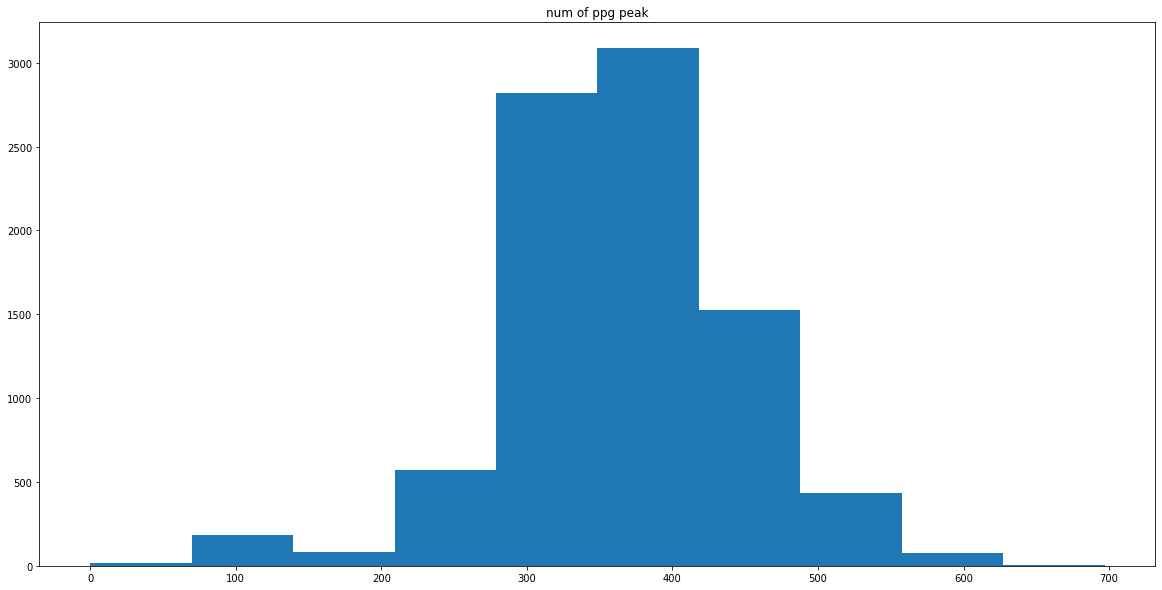

In [11]:
import matplotlib.pyplot as plt


plt.figure(figsize=(20,10))
plt.title('num of ppg peak')
plt.hist(len_ppg_list)

(array([  37.,    7., 1212.,  257., 1928., 2841., 1787.,  604.,  116.,
          14.]),
 array([  0. ,  66.1, 132.2, 198.3, 264.4, 330.5, 396.6, 462.7, 528.8,
        594.9, 661. ]),
 <BarContainer object of 10 artists>)

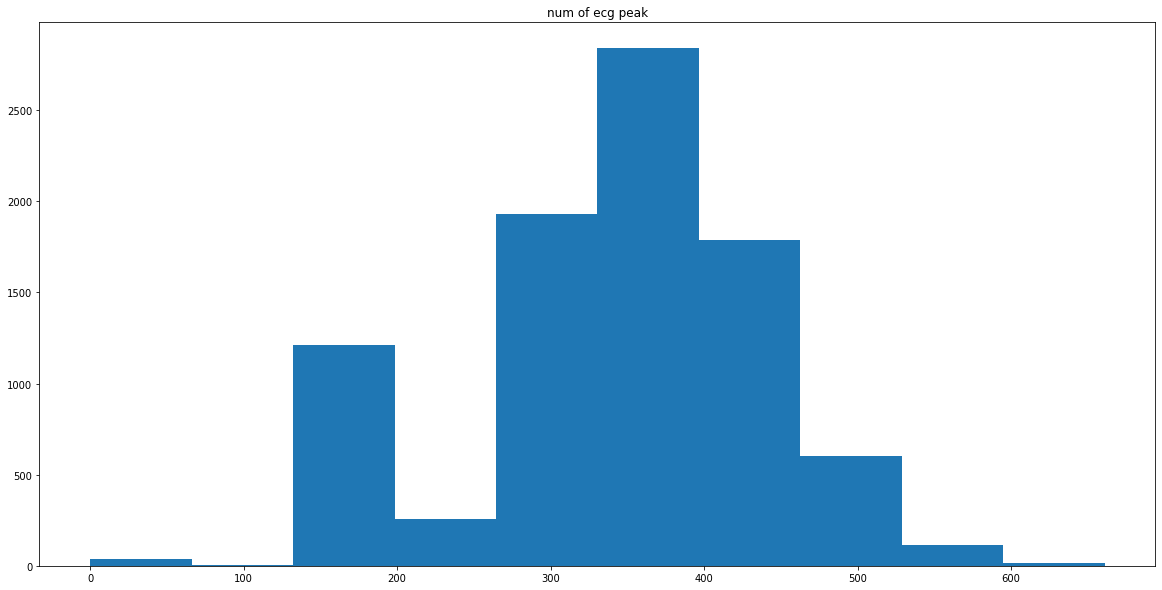

In [10]:
plt.figure(figsize=(20,10))
plt.title('num of ecg peak')
plt.hist(len_ecg_list)


## ECG 250Hz peak

In [16]:
import os, sys
import pickle
import pandas as pd
import numpy as np


#sys.path.append(os.path.dirname(os.path.abspath(os.path.dirname('SPI_model'))))
from pyvital2 import arr, vitaldb

vital_path = '../../cranberry2/Preprocessing/vital_data/ECG_250Hz_pacu_5min'
vital_list = os.listdir(vital_path)
SRATE = 250


# valid file path
df_file = pd.read_csv('../../cranberry/Outcome/Drug_check/ftn+_age_match_20201224.csv')
valid_files = [str(df_file.loc[i,'Value'])+','+str(df_file.loc[i,'Unnamed: 0'])+','+df_file.loc[i,'path'] for i in range(len(df_file))]


non_list = []
cnt = 7500
for f_vital in vital_list[7500:]:
    if not f_vital in valid_files:
        continue
    
    cnt += 1
    ecg_cache = "../../cranberry2/Preprocessing/cache/peaks/ECG_250Hz_pacu_5min/" + f_vital
    
    
    print('({}/{}) '.format(cnt, len(vital_list)), end=' ')
    if os.path.exists(ecg_cache):
        print('already existing ppg, ecg peaks'+f_vital)
        

            
    #저장된 pickle 파일이 없으면 새로 계산해서 저장   
    else:
        if not '.vital' in f_vital:
            non_list.append(f_vital)
            print('not a vital file')
            continue
        
        
        try:
            df_vital = pickle.load(open(os.path.join(vital_path,f_vital),'rb'))
            

            print('\ndetecting peak...', end='')
            ecg_peak = arr.detect_qrs((df_vital[['ECG']].fillna(method='ffill').fillna(method='bfill').values.flatten()), SRATE)
        
        
        except Exception as e:
            print(e)
            non_list.append(f_vital)
            continue

            
        print('completed...')    
        pickle.dump(ecg_peak, open(ecg_cache, 'wb'))

(7501/10076)  already existing ppg, ecg peaks5.0,4906,PACU1_11_200331_110409.vital
(7502/10076)  already existing ppg, ecg peaks7.0,3781,PACU1_7_200217_144604.vital
(7503/10076)  already existing ppg, ecg peaks8.0,8343,PACU1_5_201029_173853.vital
(7504/10076)  already existing ppg, ecg peaks5.0,8275,PACU1_1_201027_170907.vital
(7505/10076)  already existing ppg, ecg peaks7.0,10160,PACU1_11_201013_144642.vital
(7506/10076)  
detecting peak...completed...
(7507/10076)  already existing ppg, ecg peaks4.0,7415,PACU1_7_200915_165318.vital
(7508/10076)  
detecting peak...completed...
(7509/10076)  already existing ppg, ecg peaks5.0,9950,PACU1_12_200729_150109.vital
(7510/10076)  already existing ppg, ecg peaks4.0,6344,PACU1_10_200708_120919.vital
(7511/10076)  already existing ppg, ecg peaks3.0,5093,PACU1_10_200512_174020.vital
(7512/10076)  already existing ppg, ecg peaks3.0,3546,PACU1_4_200206_191352.vital
(7513/10076)  already existing ppg, ecg peaks4.0,684,PACU1_10_190529_090721.vital
(7

(7609/10076)  
detecting peak...completed...
(7610/10076)  already existing ppg, ecg peaks6.0,5418,PACU1_7_200527_154344.vital
(7611/10076)  already existing ppg, ecg peaks7.0,6013,PACU1_6_200618_171233.vital
(7612/10076)  already existing ppg, ecg peaks4.0,2618,PACU1_10_191219_133406.vital
(7613/10076)  already existing ppg, ecg peaks4.0,1975,PACU1_3_190829_182204.vital
(7614/10076)  
detecting peak...completed...
(7615/10076)  already existing ppg, ecg peaks9.0,9134,PACU1_1_191227_182816.vital
(7616/10076)  already existing ppg, ecg peaks6.0,9358,PACU1_9_200210_093841.vital
(7617/10076)  already existing ppg, ecg peaks4.0,10169,PACU1_4_201014_163444.vital
(7618/10076)  already existing ppg, ecg peaks6.0,2485,PACU1_12_191021_120046.vital
(7619/10076)  already existing ppg, ecg peaks6.0,5501,PACU1_2_200529_155709.vital
(7620/10076)  already existing ppg, ecg peaks8.0,8457,PACU1_1_200122_182516.vital
(7621/10076)  already existing ppg, ecg peaks3.0,6118,PACU1_4_200625_090737.vital
(7622

(7716/10076)  
detecting peak...completed...
(7717/10076)  already existing ppg, ecg peaks5.0,7166,PACU1_10_200821_094602.vital
(7718/10076)  already existing ppg, ecg peaks8.0,8171,PACU1_5_201022_094412.vital
(7719/10076)  already existing ppg, ecg peaks5.0,9881,PACU1_5_200707_135803.vital
(7720/10076)  already existing ppg, ecg peaks5.0,3482,PACU1_6_200205_110527.vital
(7721/10076)  already existing ppg, ecg peaks5.0,8361,PACU1_9_201030_120921.vital
(7722/10076)  already existing ppg, ecg peaks5.0,7834,PACU1_4_201006_184916.vital
(7723/10076)  already existing ppg, ecg peaks6.0,8600,PACU1_3_190509_122326.vital
(7724/10076)  already existing ppg, ecg peaks5.0,1272,PACU1_7_190717_113052.vital
(7725/10076)  already existing ppg, ecg peaks8.0,2538,PACU1_2_191024_135037.vital
(7726/10076)  already existing ppg, ecg peaks5.0,8675,PACU1_10_190524_154757.vital
(7727/10076)  already existing ppg, ecg peaks3.0,7792,PACU1_6_201005_092947.vital
(7728/10076)  
detecting peak...completed...
(7729/

detecting peak...completed...
(7829/10076)  already existing ppg, ecg peaks2.0,2060,PACU1_12_190903_104022.vital
(7830/10076)  already existing ppg, ecg peaks4.0,7648,PACU1_8_200924_091734.vital
(7831/10076)  already existing ppg, ecg peaks7.0,13,PACU1_1_190409_202913.vital
(7832/10076)  already existing ppg, ecg peaks9.0,7252,PACU1_6_200831_070034.vital
(7833/10076)  already existing ppg, ecg peaks8.0,1601,PACU1_1_190820_130519.vital
(7834/10076)  already existing ppg, ecg peaks6.0,8503,PACU1_6_200608_171127.vital
(7835/10076)  already existing ppg, ecg peaks8.0,2700,PACU1_5_200102_114119.vital
(7836/10076)  already existing ppg, ecg peaks7.0,6754,PACU1_6_200729_094831.vital
(7837/10076)  already existing ppg, ecg peaks3.0,4056,PACU1_1_200225_222355.vital
(7838/10076)  already existing ppg, ecg peaks4.0,8177,PACU1_7_201022_102105.vital
(7839/10076)  
detecting peak...completed...
(7840/10076)  already existing ppg, ecg peaks2.0,801,PACU1_5_190607_122953.vital
(7841/10076)  already exi

detecting peak...completed...
(7940/10076)  already existing ppg, ecg peaks7.0,2930,PACU1_12_200110_142602.vital
(7941/10076)  already existing ppg, ecg peaks5.0,6442,PACU1_2_200714_191239.vital
(7942/10076)  already existing ppg, ecg peaks4.0,5642,PACU1_9_200604_141315.vital
(7943/10076)  already existing ppg, ecg peaks2.0,6926,PACU1_1_200807_114939.vital
(7944/10076)  already existing ppg, ecg peaks6.0,2561,PACU1_3_191115_035849.vital
(7945/10076)  already existing ppg, ecg peaks8.0,8468,PACU1_12_200221_154824.vital
(7946/10076)  already existing ppg, ecg peaks5.0,6662,PACU1_8_200723_153911.vital
(7947/10076)  already existing ppg, ecg peaks8.0,6102,PACU1_8_200624_133912.vital
(7948/10076)  already existing ppg, ecg peaks5.0,7271,PACU1_6_200902_103630.vital
(7949/10076)  already existing ppg, ecg peaks7.0,3892,PACU1_8_200220_100522.vital
(7950/10076)  
detecting peak...completed...
(7951/10076)  already existing ppg, ecg peaks6.0,5183,PACU1_12_200515_143517.vital
(7952/10076)  alread

detecting peak...completed...
(8060/10076)  already existing ppg, ecg peaks5.0,3234,PACU1_7_200122_134621.vital
(8061/10076)  already existing ppg, ecg peaks5.0,5749,PACU1_12_200609_140912.vital
(8062/10076)  already existing ppg, ecg peaks6.0,9019,PACU1_10_190905_165617.vital
(8063/10076)  already existing ppg, ecg peaks4.0,8776,PACU1_12_190709_162301.vital
(8064/10076)  already existing ppg, ecg peaks4.0,3317,PACU1_2_200129_103553.vital
(8065/10076)  already existing ppg, ecg peaks3.0,9654,PACU1_1_200513_130640.vital
(8066/10076)  already existing ppg, ecg peaks5.0,9114,PACU1_6_191118_124935.vital
(8067/10076)  
detecting peak...completed...
(8068/10076)  already existing ppg, ecg peaks6.0,4892,PACU1_3_200330_201130.vital
(8069/10076)  already existing ppg, ecg peaks7.0,841,PACU1_10_190611_174132.vital
(8070/10076)  already existing ppg, ecg peaks5.0,6839,PACU1_7_200803_145407.vital
(8071/10076)  already existing ppg, ecg peaks3.0,740,PACU1_5_190530_202626.vital
(8072/10076)  already

detecting peak...completed...
(8172/10076)  already existing ppg, ecg peaks7.0,4155,PACU1_11_200302_132747.vital
(8173/10076)  already existing ppg, ecg peaks3.0,961,PACU1_5_190704_163703.vital
(8174/10076)  already existing ppg, ecg peaks4.0,9714,PACU1_9_200527_133938.vital
(8175/10076)  already existing ppg, ecg peaks2.0,6820,PACU1_3_200731_155227.vital
(8176/10076)  already existing ppg, ecg peaks9.0,6845,PACU1_3_200803_191512.vital
(8177/10076)  already existing ppg, ecg peaks5.0,1028,PACU1_8_190708_170127.vital
(8178/10076)  already existing ppg, ecg peaks5.0,9480,PACU1_6_200306_144138.vital
(8179/10076)  already existing ppg, ecg peaks2.0,7366,PACU1_2_200911_170341.vital
(8180/10076)  already existing ppg, ecg peaks3.0,4045,PACU1_6_200225_140000.vital
(8181/10076)  already existing ppg, ecg peaks9.0,58,PACU1_3_190416_145310.vital
(8182/10076)  already existing ppg, ecg peaks6.0,949,PACU1_11_190704_122836.vital
(8183/10076)  already existing ppg, ecg peaks4.0,4368,PACU1_5_200309_1

(8289/10076)  
detecting peak...completed...
(8290/10076)  already existing ppg, ecg peaks6.0,475,PACU1_1_190515_162501.vital
(8291/10076)  
detecting peak...completed...
(8292/10076)  already existing ppg, ecg peaks6.0,9863,PACU1_9_200701_103731.vital
(8293/10076)  already existing ppg, ecg peaks7.0,7623,PACU1_9_200923_123547.vital
(8294/10076)  already existing ppg, ecg peaks4.0,7985,PACU1_4_201013_174147.vital
(8295/10076)  already existing ppg, ecg peaks3.0,437,PACU1_11_190514_154953.vital
(8296/10076)  already existing ppg, ecg peaks3.0,7444,PACU1_3_200916_132318.vital
(8297/10076)  
detecting peak...completed...
(8298/10076)  already existing ppg, ecg peaks5.0,7685,PACU1_6_200925_084117.vital
(8299/10076)  already existing ppg, ecg peaks4.0,4217,PACU1_2_200303_103554.vital
(8300/10076)  already existing ppg, ecg peaks5.0,7432,PACU1_8_200916_112731.vital
(8301/10076)  already existing ppg, ecg peaks5.0,483,PACU1_4_190515_174249.vital
(8302/10076)  already existing ppg, ecg peaks7.

detecting peak...completed...
(8397/10076)  already existing ppg, ecg peaks6.0,9343,PACU1_2_200205_211323.vital
(8398/10076)  already existing ppg, ecg peaks3.0,388,PACU1_1_190513_164319.vital
(8399/10076)  already existing ppg, ecg peaks5.0,2243,PACU1_1_190906_184446.vital
(8400/10076)  already existing ppg, ecg peaks3.0,9599,PACU1_3_200326_215105.vital
(8401/10076)  already existing ppg, ecg peaks4.0,9338,PACU1_1_200205_090600.vital
(8402/10076)  already existing ppg, ecg peaks3.0,5567,PACU1_1_200602_164356.vital
(8403/10076)  already existing ppg, ecg peaks4.0,3192,PACU1_2_200121_173750.vital
(8404/10076)  already existing ppg, ecg peaks4.0,1639,PACU1_4_190820_163339.vital
(8405/10076)  already existing ppg, ecg peaks5.0,8799,PACU1_1_190715_091527.vital
(8406/10076)  
detecting peak...completed...
(8407/10076)  already existing ppg, ecg peaks5.0,6579,PACU1_3_200717_175105.vital
(8408/10076)  already existing ppg, ecg peaks5.0,5403,PACU1_3_200527_121140.vital
(8409/10076)  
detecting

(8535/10076)  
detecting peak...completed...
(8536/10076)  already existing ppg, ecg peaks4.0,8991,PACU1_11_190902_153658.vital
(8537/10076)  
detecting peak...completed...
(8538/10076)  already existing ppg, ecg peaks7.0,8439,PACU1_3_191219_171049.vital
(8539/10076)  already existing ppg, ecg peaks7.0,5107,PACU1_1_200513_130640.vital
(8540/10076)  already existing ppg, ecg peaks5.0,4212,PACU1_5_200303_100133.vital
(8541/10076)  already existing ppg, ecg peaks2.0,738,PACU1_5_190530_193227.vital
(8542/10076)  already existing ppg, ecg peaks2.0,3213,PACU1_8_200122_091942.vital
(8543/10076)  already existing ppg, ecg peaks5.0,1977,PACU1_7_190829_181432.vital
(8544/10076)  
detecting peak...completed...
(8545/10076)  already existing ppg, ecg peaks2.0,73,PACU1_1_190418_113725.vital
(8546/10076)  already existing ppg, ecg peaks4.0,7308,PACU1_6_200910_093206.vital
(8547/10076)  already existing ppg, ecg peaks5.0,9188,PACU1_2_200109_175440.vital
(8548/10076)  already existing ppg, ecg peaks6.

(8650/10076)  
detecting peak...completed...
(8651/10076)  already existing ppg, ecg peaks4.0,1907,PACU1_1_190828_130048.vital
(8652/10076)  already existing ppg, ecg peaks6.0,5202,PACU1_5_200515_174730.vital
(8653/10076)  already existing ppg, ecg peaks3.0,6359,PACU1_9_200708_165611.vital
(8654/10076)  already existing ppg, ecg peaks4.0,2263,PACU1_1_190909_105054.vital
(8655/10076)  already existing ppg, ecg peaks6.0,7880,PACU1_4_201008_004259.vital
(8656/10076)  already existing ppg, ecg peaks7.0,2492,PACU1_3_191021_173645.vital
(8657/10076)  
detecting peak...completed...
(8658/10076)  already existing ppg, ecg peaks10.0,1379,PACU1_12_190719_140025.vital
(8659/10076)  already existing ppg, ecg peaks5.0,9182,PACU1_12_200109_150545.vital
(8660/10076)  already existing ppg, ecg peaks5.0,5780,PACU1_7_200610_145022.vital
(8661/10076)  already existing ppg, ecg peaks5.0,6960,PACU1_2_200811_112256.vital
(8662/10076)  
detecting peak...completed...
(8663/10076)  already existing ppg, ecg pe

detecting peak...completed...
(8763/10076)  already existing ppg, ecg peaks3.0,1101,PACU1_8_190710_141853.vital
(8764/10076)  already existing ppg, ecg peaks7.0,819,PACU1_2_190611_042646.vital
(8765/10076)  already existing ppg, ecg peaks7.0,2842,PACU1_8_200108_124223.vital
(8766/10076)  already existing ppg, ecg peaks3.0,2390,PACU1_2_190917_121200.vital
(8767/10076)  already existing ppg, ecg peaks3.0,6417,PACU1_1_200714_130931.vital
(8768/10076)  already existing ppg, ecg peaks5.0,6218,PACU1_3_200701_133538.vital
(8769/10076)  already existing ppg, ecg peaks8.0,927,PACU1_1_190703_182338.vital
(8770/10076)  already existing ppg, ecg peaks7.0,9016,PACU1_5_190905_153248.vital
(8771/10076)  already existing ppg, ecg peaks6.0,6069,PACU1_11_200623_125341.vital
(8772/10076)  already existing ppg, ecg peaks5.0,10073,PACU1_1_200917_161305.vital
(8773/10076)  already existing ppg, ecg peaks5.0,365,PACU1_5_190510_101131.vital
(8774/10076)  already existing ppg, ecg peaks6.0,1000,PACU1_3_190705_

detecting peak...completed...
(8871/10076)  already existing ppg, ecg peaks7.0,995,PACU1_9_190705_145718.vital
(8872/10076)  already existing ppg, ecg peaks5.0,2902,PACU1_1_200109_214512.vital
(8873/10076)  already existing ppg, ecg peaks6.0,8986,PACU1_3_190830_163408.vital
(8874/10076)  already existing ppg, ecg peaks6.0,1411,PACU1_1_190722_162542.vital
(8875/10076)  already existing ppg, ecg peaks6.0,7957,PACU1_3_201012_205013.vital
(8876/10076)  already existing ppg, ecg peaks3.0,8685,PACU1_5_190529_101102.vital
(8877/10076)  already existing ppg, ecg peaks4.0,3825,PACU1_1_200218_201333.vital
(8878/10076)  already existing ppg, ecg peaks5.0,8782,PACU1_1_190710_091052.vital
(8879/10076)  already existing ppg, ecg peaks7.0,10224,PACU1_3_201031_131135.vital
(8880/10076)  already existing ppg, ecg peaks4.0,3772,PACU1_9_200217_125412.vital
(8881/10076)  already existing ppg, ecg peaks7.0,2932,PACU1_3_200110_152100.vital
(8882/10076)  already existing ppg, ecg peaks7.0,1489,PACU1_2_190816

detecting peak...completed...
(8988/10076)  already existing ppg, ecg peaks7.0,5221,PACU1_7_200518_132612.vital
(8989/10076)  already existing ppg, ecg peaks5.0,7925,PACU1_9_201008_172204.vital
(8990/10076)  already existing ppg, ecg peaks4.0,7687,PACU1_2_200925_091922.vital
(8991/10076)  already existing ppg, ecg peaks6.0,10002,PACU1_1_200818_103443.vital
(8992/10076)  already existing ppg, ecg peaks9.0,2956,PACU1_4_200113_095153.vital
(8993/10076)  already existing ppg, ecg peaks4.0,2623,PACU1_8_191219_140825.vital
(8994/10076)  already existing ppg, ecg peaks3.0,1290,PACU1_3_190718_043027.vital
(8995/10076)  already existing ppg, ecg peaks5.0,5204,PACU1_5_200515_174730.vital
(8996/10076)  already existing ppg, ecg peaks2.0,7214,PACU1_7_200824_134534.vital
(8997/10076)  already existing ppg, ecg peaks8.0,4752,PACU1_7_200324_143202.vital
(8998/10076)  already existing ppg, ecg peaks4.0,1002,PACU1_12_190705_155226.vital
(8999/10076)  already existing ppg, ecg peaks7.0,8764,PACU1_1_1907

detecting peak...completed...
(9097/10076)  already existing ppg, ecg peaks4.0,9907,PACU1_5_200715_093146.vital
(9098/10076)  
detecting peak...completed...
(9099/10076)  
detecting peak...completed...
(9100/10076)  already existing ppg, ecg peaks5.0,15,PACU1_3_190409_223107.vital
(9101/10076)  already existing ppg, ecg peaks3.0,7428,PACU1_8_200916_094824.vital
(9102/10076)  already existing ppg, ecg peaks7.0,1708,PACU1_1_190821_103614.vital
(9103/10076)  already existing ppg, ecg peaks4.0,2213,PACU1_7_190906_113530.vital
(9104/10076)  already existing ppg, ecg peaks6.0,7849,PACU1_11_201007_102740.vital
(9105/10076)  already existing ppg, ecg peaks6.0,8949,PACU1_3_190823_183432.vital
(9106/10076)  
detecting peak...completed...
(9107/10076)  already existing ppg, ecg peaks7.0,3640,PACU1_5_200211_113809.vital
(9108/10076)  already existing ppg, ecg peaks3.0,2682,PACU1_1_191231_085337.vital
(9109/10076)  already existing ppg, ecg peaks10.0,2066,PACU1_11_190903_132108.vital
(9110/10076)  

detecting peak...completed...
(9208/10076)  already existing ppg, ecg peaks3.0,7749,PACU1_6_200928_170228.vital
(9209/10076)  
detecting peak...completed...
(9210/10076)  already existing ppg, ecg peaks8.0,362,PACU1_4_190510_090342.vital
(9211/10076)  already existing ppg, ecg peaks4.0,9772,PACU1_6_200609_115147.vital
(9212/10076)  already existing ppg, ecg peaks6.0,7755,PACU1_3_200928_220435.vital
(9213/10076)  already existing ppg, ecg peaks4.0,6322,PACU1_9_200707_130913.vital
(9214/10076)  already existing ppg, ecg peaks5.0,8795,PACU1_5_190710_164522.vital
(9215/10076)  already existing ppg, ecg peaks2.0,834,PACU1_5_190611_120654.vital
(9216/10076)  already existing ppg, ecg peaks3.0,4543,PACU1_5_200316_180925.vital
(9217/10076)  already existing ppg, ecg peaks5.0,5959,PACU1_3_200617_090233.vital
(9218/10076)  already existing ppg, ecg peaks5.0,9978,PACU1_1_200806_160551.vital
(9219/10076)  
detecting peak...completed...
(9220/10076)  already existing ppg, ecg peaks4.0,9827,PACU1_10

detecting peak...completed...
(9318/10076)  already existing ppg, ecg peaks8.0,8334,PACU1_8_201029_144720.vital
(9319/10076)  already existing ppg, ecg peaks3.0,764,PACU1_1_190531_144608.vital
(9320/10076)  already existing ppg, ecg peaks5.0,10211,PACU1_5_201027_185301.vital
(9321/10076)  already existing ppg, ecg peaks3.0,4508,PACU1_5_200313_170009.vital
(9322/10076)  already existing ppg, ecg peaks5.0,5203,PACU1_9_200515_174510.vital
(9323/10076)  
detecting peak...completed...
(9324/10076)  already existing ppg, ecg peaks4.0,4333,PACU1_3_200306_134823.vital
(9325/10076)  already existing ppg, ecg peaks4.0,6577,PACU1_11_200717_155747.vital
(9326/10076)  already existing ppg, ecg peaks5.0,5721,PACU1_6_200608_185951.vital
(9327/10076)  already existing ppg, ecg peaks4.0,5133,PACU1_1_200514_104348.vital
(9328/10076)  already existing ppg, ecg peaks6.0,1686,PACU1_1_190820_215942.vital
(9329/10076)  already existing ppg, ecg peaks6.0,3966,PACU1_7_200221_161712.vital
(9330/10076)  
detecti

detecting peak...completed...
(9439/10076)  already existing ppg, ecg peaks8.0,6958,PACU1_6_200811_113240.vital
(9440/10076)  already existing ppg, ecg peaks4.0,6669,PACU1_7_200724_084709.vital
(9441/10076)  already existing ppg, ecg peaks9.0,5394,PACU1_1_200527_085537.vital
(9442/10076)  already existing ppg, ecg peaks5.0,6474,PACU1_2_200715_140603.vital
(9443/10076)  already existing ppg, ecg peaks5.0,6920,PACU1_3_200806_214508.vital
(9444/10076)  already existing ppg, ecg peaks4.0,8589,PACU1_4_190503_132811.vital
(9445/10076)  already existing ppg, ecg peaks9.0,1453,PACU1_6_190723_162355.vital
(9446/10076)  already existing ppg, ecg peaks4.0,1331,PACU1_10_190718_143135.vital
(9447/10076)  already existing ppg, ecg peaks7.0,9143,PACU1_10_200102_164240.vital
(9448/10076)  already existing ppg, ecg peaks4.0,5020,PACU1_10_200508_143252.vital
(9449/10076)  already existing ppg, ecg peaks5.0,5791,PACU1_1_200610_191621.vital
(9450/10076)  already existing ppg, ecg peaks5.0,4830,PACU1_10_20

(9559/10076)  
detecting peak...completed...
(9560/10076)  already existing ppg, ecg peaks4.0,2131,PACU1_8_190904_162533.vital
(9561/10076)  already existing ppg, ecg peaks3.0,187,PACU1_4_190430_190816.vital
(9562/10076)  already existing ppg, ecg peaks5.0,885,PACU1_8_190617_122854.vital
(9563/10076)  
detecting peak...completed...
(9564/10076)  already existing ppg, ecg peaks5.0,2405,PACU1_3_190917_202108.vital
(9565/10076)  already existing ppg, ecg peaks4.0,4262,PACU1_6_200304_150340.vital
(9566/10076)  already existing ppg, ecg peaks4.0,6035,PACU1_5_200619_153003.vital
(9567/10076)  already existing ppg, ecg peaks4.0,3182,PACU1_1_200121_153741.vital
(9568/10076)  already existing ppg, ecg peaks6.0,1387,PACU1_7_190719_154517.vital
(9569/10076)  already existing ppg, ecg peaks6.0,7363,PACU1_3_200911_163759.vital
(9570/10076)  already existing ppg, ecg peaks6.0,3971,PACU1_1_200221_160045.vital
(9571/10076)  already existing ppg, ecg peaks4.0,7941,PACU1_4_201009_015731.vital
(9572/1007

detecting peak...completed...
(9667/10076)  already existing ppg, ecg peaks3.0,8070,PACU1_4_201016_162850.vital
(9668/10076)  already existing ppg, ecg peaks4.0,2901,PACU1_6_200109_203814.vital
(9669/10076)  already existing ppg, ecg peaks3.0,8310,PACU1_9_201028_143657.vital
(9670/10076)  already existing ppg, ecg peaks7.0,1677,PACU1_4_190820_200719.vital
(9671/10076)  already existing ppg, ecg peaks4.0,8060,PACU1_3_201016_143549.vital
(9672/10076)  already existing ppg, ecg peaks5.0,6791,PACU1_7_200730_153847.vital
(9673/10076)  already existing ppg, ecg peaks5.0,3512,PACU1_11_200205_164828.vital
(9674/10076)  already existing ppg, ecg peaks3.0,7435,PACU1_4_200916_112324.vital
(9675/10076)  already existing ppg, ecg peaks4.0,8097,PACU1_3_201019_193126.vital
(9676/10076)  already existing ppg, ecg peaks6.0,8499,PACU1_2_200602_234557.vital
(9677/10076)  
detecting peak...completed...
(9678/10076)  already existing ppg, ecg peaks5.0,532,PACU1_3_190516_231457.vital
(9679/10076)  already e

detecting peak...completed...
(9780/10076)  already existing ppg, ecg peaks5.0,2358,PACU1_7_190911_180815.vital
(9781/10076)  already existing ppg, ecg peaks4.0,9944,PACU1_1_200727_121151.vital
(9782/10076)  already existing ppg, ecg peaks5.0,9821,PACU1_10_200617_155547.vital
(9783/10076)  already existing ppg, ecg peaks8.0,5542,PACU1_9_200602_101427.vital
(9784/10076)  already existing ppg, ecg peaks6.0,6053,PACU1_10_200622_160248.vital
(9785/10076)  
detecting peak...completed...
(9786/10076)  already existing ppg, ecg peaks3.0,3569,PACU1_8_200207_130854.vital
(9787/10076)  already existing ppg, ecg peaks5.0,7154,PACU1_5_200820_174403.vital
(9788/10076)  already existing ppg, ecg peaks6.0,9913,PACU1_6_200715_155532.vital
(9789/10076)  already existing ppg, ecg peaks5.0,3230,PACU1_6_200122_122323.vital
(9790/10076)  already existing ppg, ecg peaks5.0,9888,PACU1_5_200708_142001.vital
(9791/10076)  
detecting peak...completed...
(9792/10076)  already existing ppg, ecg peaks8.0,7672,PACU

detecting peak...completed...
(9890/10076)  already existing ppg, ecg peaks5.0,1807,PACU1_4_190822_203857.vital
(9891/10076)  already existing ppg, ecg peaks6.0,5795,PACU1_1_200610_202606.vital
(9892/10076)  already existing ppg, ecg peaks3.0,2278,PACU1_10_190909_150751.vital
(9893/10076)  already existing ppg, ecg peaks9.0,3454,PACU1_2_200204_152757.vital
(9894/10076)  already existing ppg, ecg peaks8.0,5100,PACU1_4_200513_092912.vital
(9895/10076)  already existing ppg, ecg peaks6.0,9088,PACU1_5_191018_114014.vital
(9896/10076)  
detecting peak...completed...
(9897/10076)  already existing ppg, ecg peaks5.0,2815,PACU1_1_200107_155217.vital
(9898/10076)  already existing ppg, ecg peaks3.0,213,PACU1_8_190502_145607.vital
(9899/10076)  
detecting peak...completed...
(9900/10076)  already existing ppg, ecg peaks2.0,5995,PACU1_7_200618_093836.vital
(9901/10076)  already existing ppg, ecg peaks2.0,4051,PACU1_2_200225_180030.vital
(9902/10076)  already existing ppg, ecg peaks5.0,1588,PACU1_

detecting peak...completed...
(10003/10076)  already existing ppg, ecg peaks2.0,3937,PACU1_10_200221_102154.vital
(10004/10076)  already existing ppg, ecg peaks6.0,9095,PACU1_7_191018_165330.vital
(10005/10076)  already existing ppg, ecg peaks8.0,5609,PACU1_11_200603_161312.vital
(10006/10076)  already existing ppg, ecg peaks5.0,2627,PACU1_11_191219_153558.vital
(10007/10076)  already existing ppg, ecg peaks3.0,5239,PACU1_6_200519_140359.vital
(10008/10076)  already existing ppg, ecg peaks5.0,6284,PACU1_6_200706_123419.vital
(10009/10076)  already existing ppg, ecg peaks7.0,7202,PACU1_1_200821_184515.vital
(10010/10076)  already existing ppg, ecg peaks8.0,579,PACU1_2_190523_114722.vital
(10011/10076)  already existing ppg, ecg peaks2.0,7470,PACU1_4_200917_083845.vital
(10012/10076)  already existing ppg, ecg peaks4.0,9257,PACU1_3_200117_165846.vital
(10013/10076)  
detecting peak...completed...
(10014/10076)  already existing ppg, ecg peaks3.0,4282,PACU1_5_200305_095341.vital
(10015/10

In [4]:
vital_path = '../../cranberry2/Preprocessing/vital_data/PPG_100Hz_ECG_100Hz_pacu_5min'
len(os.listdir(vital_path))

8804

# Preprocessing

In [14]:
import os, sys
import pickle
import pandas as pd
import numpy as np

# 피크 사이 wave를 모두 같은 length로 만들기 위한 함수
def linear_connection(list, idx):
    int_idx = int(idx)
    return list[int_idx] + (list[int_idx+1] - list[int_idx]) * (idx - int_idx)



### input 설정
LEN_INPUT = 20 # input 10s
LEN_PER_NRS = 300 # vital length for each NRS
OVERLAP = 5
n_aug = int((LEN_PER_NRS-LEN_INPUT)/OVERLAP) + 1 # data augmentation 개수
SRATE = 100


# vital data 저장 경로
preprocess_path = '../../cranberry2/Preprocessing/'
vital_path = preprocess_path + 'vital_data/PPG_100Hz_ECG_100Hz_pacu_5min'
f_vital_list = os.listdir(vital_path)


# 전처리 정보를 담을 Dataframe
column_list = ['file_path'] + [str(i+1) for i in range(n_aug)] #+ ['NRS']
df_preprocess = pd.DataFrame(columns = column_list)


SRATE, f_num = 100, 7500
for f_vital in f_vital_list[7500:]:
    f_num += 1
    
    print('###Input', f_num,'/ '+str(len(f_vital_list))+': '+f_vital+'###')
    
    # ppg, ecg peaks 불러오기
    # peaks가 없는 경우는 ECG나 PPG data가 없는 case들
    if not os.path.exists(preprocess_path+'cache/peaks/PPG_100Hz_pacu_5min/'+f_vital):
        print('no existing PPG peaks: ', f_vital)
        continue
    if not os.path.exists(preprocess_path+'cache/peaks/ECG_100Hz_pacu_5min/'+f_vital):
        print('no existing ECG peaks: ', f_vital)
        continue
    
    # vital data 불러오기    
    df_vital = pickle.load(open(vital_path+'/'+f_vital, 'rb')).reset_index()
    
    #dataframe에 새로운 행 만들기
    df_preprocess.loc[f_num-1,'file_path'] = f_vital
        
    ppg_peak = pickle.load(open(preprocess_path+'cache/peaks/PPG_100Hz_pacu_5min/'+f_vital, 'rb'))
    ecg_peak = pickle.load(open(preprocess_path+'cache/peaks/ECG_100Hz_pacu_5min/'+f_vital, 'rb'))
    
    ppg_peak = np.array([ppg_peak])
    ecg_peak= np.array([ecg_peak])
    
    
    # 20초 단위로 끊기
    for i in range(n_aug):
        start_idx = i*OVERLAP*SRATE # 500i
        end_idx = (i*OVERLAP + LEN_INPUT)*SRATE # 500i + 1000
        
        seg_ppg, seg_ecg = [np.nan for j in range(LEN_INPUT*SRATE)], [np.nan for j in range(LEN_INPUT*SRATE)]
        df_vital_input = df_vital.loc[start_idx:end_idx-1]
        seg_ppg[-len(df_vital_input):] = df_vital_input['PPG'].tolist()
        seg_ecg[-len(df_vital_input):] = df_vital_input['ECG'].tolist()
    
        ### 1. 결측치 처리 ###              
        # df.isnull().sum() 하면 더 간단하게 가능하나 애초에 NRS에 해당하는 vital data가 120초 보다 짧은 경우
        nan_ppg_list = np.isnan(seg_ppg)
        nan_ecg_list = np.isnan(seg_ecg)
        nan_ppg_perc = np.sum(nan_ppg_list) / LEN_INPUT / SRATE
        nan_ecg_perc = np.sum(nan_ecg_list) / LEN_INPUT / SRATE
        
        # ECG, PPG 둘다 결측치인 부분
        nan_both_perc = 0
        for j in range(len(seg_ppg)):
            if nan_ppg_list[j] and  nan_ecg_list[j]:
                nan_both_perc += 1
        nan_both_perc /= (LEN_INPUT*SRATE)
            
        # segment의 결측치 비율 정보
        nan_info = [nan_ppg_perc, nan_ecg_perc, nan_both_perc]
        
        # 결측치가 많은 경우, noise 확인할 것도 없이 False -  이 경우의 noise_info는 -1로 처리
        if nan_ppg_perc > 0.05 or nan_ecg_perc > 0.05 or nan_both_perc > 0.05:
            df_preprocess.loc[f_num-1,str(i+1)] = (False, nan_info, [-1, -1])
            continue
            
        

        ### 2. Noise 처리 ###
        # 10초 segment 내의 ppg, ecg peak idx
        #seg_ppg_min = ppg_min[(start_idx<=np.array(ppg_min)) & (np.array(ppg_min)<end_idx)]
        idx_ppg_peak = ppg_peak[(start_idx<=ppg_peak) & (ppg_peak<end_idx)] - start_idx
        idx_ecg_peak = ecg_peak[(start_idx<=ecg_peak) & (ecg_peak<end_idx)] - start_idx
        
        # peak가 HR 30~150 -> 20s - min 10 peaks(HR30)
        # peak 개수가 기준 미달이면 noise 계산 자세히 할 필요없이 False - 이 경우의 noise_info는 -2로 처리
        if len(idx_ppg_peak)<5/10*LEN_INPUT or len(idx_ecg_peak)<5/10*LEN_INPUT:
            df_preprocess.loc[f_num-1,str(i+1)] = (False, nan_info, [-2, -2])
            continue

            
        # 10초 segment 내의 ppg, ecg peak value
        #print(len(seg_ppg), idx_ppg_peak)
        val_ppg_peak = [seg_ppg[k] for k in idx_ppg_peak]
        val_ecg_peak = [seg_ecg[k] for k in idx_ecg_peak]
        
        # peak와 peak 사이 interval에 대한 noise 여부 -> 따라서 길이는 peak - 1
        bool_noise_ppg = [False for k in range(len(idx_ppg_peak)-1)]
        bool_noise_ecg = [False for k in range(len(idx_ecg_peak)-1)]
        
        #  2.1 peak 간격 이상한 noise (HR 30~150 -> HBI 0.4s ~ 2s로 SRATE 곱해주면 40~200)
        for k in range(len(bool_noise_ppg)):
            if not 0.4*SRATE < idx_ppg_peak[k+1] - idx_ppg_peak[k] < 2*SRATE:
                bool_noise_ppg[k] = True
        for k in range(len(bool_noise_ecg)):
            if not 0.4*SRATE < idx_ecg_peak[k+1] - idx_ecg_peak[k] < 2*SRATE:
                bool_noise_ecg[k] = True
                
        # 2.2 모양 이상한 noise
        # wave interval into same length(2s(200))
        len_wave = 2*SRATE
        norm_seg_ppg, norm_seg_ecg = [], []

        for k in range(len(bool_noise_ppg)):
            len_interval_ppg = idx_ppg_peak[k+1] - idx_ppg_peak[k]
            
            # peak 사이 wave를 모두 같은 길이로 변환
            norm_seg_ppg.append([linear_connection(seg_ppg[idx_ppg_peak[k]:idx_ppg_peak[k+1]+1], n/len_wave*len_interval_ppg) for n in range(len_wave)])
        
        for k in range(len(bool_noise_ecg)):
            len_interval_ecg = idx_ecg_peak[k+1] - idx_ecg_peak[k]
            
            # peak 사이 wave를 모두 같은 길이로 변환
            norm_seg_ecg.append([linear_connection(seg_ecg[idx_ecg_peak[k]:idx_ecg_peak[k+1]+1], n/len_wave*len_interval_ecg) for n in range(len_wave)])
          
        
        # wave interval 사이 correlation 계산 - PPG
        mean_wave_ppg = np.nanmean(norm_seg_ppg, axis = 0)
        mean_wave_ppg = pd.DataFrame(mean_wave_ppg).fillna(method='ffill', axis=0).fillna(method='bfill', axis=0).values.flatten()
        norm_seg_ppg = pd.DataFrame(norm_seg_ppg).fillna(method='ffill', axis=1).fillna(method='bfill', axis=1).values
        for k in range(len(bool_noise_ppg)):
            if np.corrcoef(norm_seg_ppg[k], mean_wave_ppg)[0,1] < 0.9:
                bool_noise_ppg[k] = True
        noise_ppg_perc = np.sum(bool_noise_ppg) / len(bool_noise_ppg)
        
        # wave interval 사이 correlation 계산 - ECG                
        mean_wave_ecg = np.nanmean(norm_seg_ecg, axis = 0)
        mean_wave_ecg = pd.DataFrame(mean_wave_ecg).fillna(method='ffill', axis=0).fillna(method='bfill', axis=0).values.flatten()
        norm_seg_ecg = pd.DataFrame(norm_seg_ecg).fillna(method='ffill', axis=1).fillna(method='bfill', axis=1).values
        for k in range(len(bool_noise_ecg)):
            if np.corrcoef(norm_seg_ecg[k], mean_wave_ecg)[0,1] < 0.9:
                bool_noise_ecg[k] = True
        noise_ecg_perc = np.sum(bool_noise_ecg) / len(bool_noise_ecg)
        
        # segment의 noise 비율 정보
        noise_info = [noise_ppg_perc, noise_ecg_perc]
        
        # segment를 input으로 써도 되는지
        if nan_ppg_perc < 0.05 and nan_ecg_perc < 0.05 and nan_both_perc < 0.05 and noise_ppg_perc < 0.1 and noise_ecg_perc < 0.1:
            bool_pass = True
        else:
            bool_pass = False
       
        # 이 segment의 정보를 dataframe에 저장
        df_preprocess.loc[f_num-1,str(i+1)] = (bool_pass, nan_info, noise_info)        

        
        
    if f_num%100 == 0:
        print('dumping cache of d_preprocess -', f_num, '/ 8804')
        pickle.dump(df_preprocess, open('../DL_model/cache/preprocess4/df_preprocess_pacu_7500-10000', 'wb'))
        
print('dumping cache of d_preprocess -', f_num, '/ 8804')
pickle.dump(df_preprocess, open('../DL_model/cache/preprocess4/df_preprocess_pacu_7500-10000', 'wb'))


###Input 7501 / 8804: 6.0,5360,PACU1_9_200526_103443.vital###
###Input 7502 / 8804: 8.0,753,PACU1_4_190531_102830.vital###
###Input 7503 / 8804: 5.0,3583,PACU1_4_200207_154859.vital###
###Input 7504 / 8804: 6.0,5114,PACU1_4_200513_170531.vital###
###Input 7505 / 8804: 6.0,920,PACU1_6_190703_164725.vital###
###Input 7506 / 8804: 3.0,7562,PACU1_1_200921_142848.vital###
###Input 7507 / 8804: 3.0,315,PACU1_5_190509_084608.vital###
###Input 7508 / 8804: 7.0,4184,PACU1_1_200302_164856.vital###
###Input 7509 / 8804: 6.0,8625,PACU1_6_190514_174239.vital###
###Input 7510 / 8804: 7.0,2707,PACU1_2_200102_132423.vital###
###Input 7511 / 8804: 8.0,1701,PACU1_8_190821_091728.vital###
###Input 7512 / 8804: 4.0,6611,PACU1_7_200721_162603.vital###
###Input 7513 / 8804: 5.0,6451,PACU1_1_200715_090851.vital###
###Input 7514 / 8804: 8.0,3408,PACU1_3_200131_174546.vital###
###Input 7515 / 8804: 6.0,1890,PACU1_3_190828_021907.vital###
###Input 7516 / 8804: 5.0,1599,PACU1_10_190820_124105.vital###
###Input 7

/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


###Input 7542 / 8804: 6.0,9392,PACU1_5_200218_175517.vital###
###Input 7543 / 8804: 7.0,3517,PACU1_4_200205_191855.vital###
###Input 7544 / 8804: 4.0,6728,PACU1_4_200727_193607.vital###
###Input 7545 / 8804: 6.0,4364,PACU1_10_200309_111259.vital###
###Input 7546 / 8804: 8.0,9710,PACU1_1_200527_085537.vital###
###Input 7547 / 8804: 8.0,3875,PACU1_8_200219_164737.vital###
###Input 7548 / 8804: 5.0,2699,PACU1_5_200102_114119.vital###
###Input 7549 / 8804: 6.0,2689,PACU1_4_200101_002034.vital###
###Input 7550 / 8804: 7.0,8004,PACU1_1_201014_105405.vital###
###Input 7551 / 8804: 5.0,9959,PACU1_7_200803_093911.vital###
###Input 7552 / 8804: 4.0,6962,PACU1_4_200811_115934.vital###
###Input 7553 / 8804: 5.0,10001,PACU1_10_200818_100610.vital###
###Input 7554 / 8804: 5.0,4889,PACU1_4_200330_173457.vital###
###Input 7555 / 8804: 2.0,7421,PACU1_4_200916_085117.vital###
###Input 7556 / 8804: 4.0,1681,PACU1_1_190820_210353.vital###
###Input 7557 / 8804: 6.0,5205,PACU1_6_200515_181108.vital###
###In

###Input 7674 / 8804: 6.0,7720,PACU1_3_200925_192209.vital###
###Input 7675 / 8804: 7.0,2312,PACU1_11_190910_153939.vital###
###Input 7676 / 8804: 5.0,9200,PACU1_3_200110_152100.vital###
###Input 7677 / 8804: 5.0,8471,PACU1_7_200302_093638.vital###
###Input 7678 / 8804: 10.0,4807,PACU1_3_200325_194331.vital###
###Input 7679 / 8804: 4.0,2242,PACU1_3_190906_181103.vital###
###Input 7680 / 8804: 8.0,2313,PACU1_4_190910_155905.vital###
###Input 7681 / 8804: 5.0,5672,PACU1_5_200605_113145.vital###
###Input 7682 / 8804: 4.0,7420,PACU1_3_200916_012011.vital###
###Input 7683 / 8804: 4.0,9679,PACU1_6_200519_140359.vital###
###Input 7684 / 8804: 2.0,1716,PACU1_5_190821_115304.vital###
###Input 7685 / 8804: 5.0,9970,PACU1_1_200805_162702.vital###
###Input 7686 / 8804: 6.0,8727,PACU1_5_190612_111821.vital###
###Input 7687 / 8804: 5.0,9313,PACU1_5_200131_105732.vital###
###Input 7688 / 8804: 5.0,7392,PACU1_1_200915_074222.vital###
###Input 7689 / 8804: 6.0,9637,PACU1_1_200507_211344.vital###
###Inp

###Input 7805 / 8804: 3.0,6431,PACU1_11_200714_160812.vital###
###Input 7806 / 8804: 5.0,9571,PACU1_1_200320_182139.vital###
###Input 7807 / 8804: 5.0,7719,PACU1_1_200925_191331.vital###
###Input 7808 / 8804: 8.0,3949,PACU1_6_200221_114317.vital###
###Input 7809 / 8804: 5.0,1025,PACU1_1_190708_144209.vital###
###Input 7810 / 8804: 8.0,9163,PACU1_4_200106_140058.vital###
###Input 7811 / 8804: 10.0,2011,PACU1_6_190830_155845.vital###
###Input 7812 / 8804: 5.0,9069,PACU1_11_190917_093909.vital###
###Input 7813 / 8804: 4.0,1541,PACU1_1_190816_171218.vital###
###Input 7814 / 8804: 6.0,164,PACU1_4_190430_101749.vital###
###Input 7815 / 8804: 3.0,5335,PACU1_4_200523_023036.vital###
###Input 7816 / 8804: 5.0,4831,PACU1_1_200326_171200.vital###
###Input 7817 / 8804: 3.0,7121,PACU1_9_200819_171540.vital###
###Input 7818 / 8804: 4.0,5432,PACU1_1_200528_095310.vital###
###Input 7819 / 8804: 3.0,7854,PACU1_9_201007_114705.vital###
###Input 7820 / 8804: 6.0,6526,PACU1_11_200716_160349.vital###
###In

###Input 7937 / 8804: 5.0,9289,PACU1_3_200125_121017.vital###
###Input 7938 / 8804: 4.0,8475,PACU1_4_200303_161148.vital###
###Input 7939 / 8804: 4.0,9604,PACU1_1_200327_122312.vital###
###Input 7940 / 8804: 3.0,8832,PACU1_6_190719_123845.vital###
###Input 7941 / 8804: 5.0,8180,PACU1_9_201022_105401.vital###
###Input 7942 / 8804: 8.0,6047,PACU1_5_200622_114318.vital###
###Input 7943 / 8804: 2.0,3070,PACU1_5_200116_151809.vital###
###Input 7944 / 8804: 4.0,9535,PACU1_1_200318_105620.vital###
###Input 7945 / 8804: 8.0,1271,PACU1_9_190717_114007.vital###
###Input 7946 / 8804: 6.0,3411,PACU1_7_200203_094632.vital###
###Input 7947 / 8804: 6.0,6604,PACU1_7_200721_140503.vital###
###Input 7948 / 8804: 4.0,5248,PACU1_7_200519_153300.vital###
###Input 7949 / 8804: 5.0,6788,PACU1_11_200730_144335.vital###
###Input 7950 / 8804: 8.0,6040,PACU1_11_200619_165500.vital###
###Input 7951 / 8804: 5.0,8267,PACU1_9_201027_130800.vital###
###Input 7952 / 8804: 3.0,6177,PACU1_10_200630_102023.vital###
###In

###Input 8069 / 8804: 4.0,549,PACU1_3_190517_120132.vital###
###Input 8070 / 8804: 5.0,6998,PACU1_2_200812_103624.vital###
###Input 8071 / 8804: 8.0,494,PACU1_1_190516_090804.vital###
###Input 8072 / 8804: 5.0,4271,PACU1_7_200304_181914.vital###
###Input 8073 / 8804: 2.0,6692,PACU1_11_200724_152334.vital###
###Input 8074 / 8804: 5.0,5946,PACU1_10_200616_173958.vital###
###Input 8075 / 8804: 5.0,859,PACU1_2_190612_101037.vital###
###Input 8076 / 8804: 2.0,7558,PACU1_1_200921_132148.vital###
###Input 8077 / 8804: 6.0,1949,PACU1_3_190829_123317.vital###
###Input 8078 / 8804: 4.0,4486,PACU1_3_200313_111818.vital###
###Input 8079 / 8804: 8.0,313,PACU1_2_190509_085941.vital###
###Input 8080 / 8804: 3.0,1286,PACU1_7_190717_224824.vital###
###Input 8081 / 8804: 4.0,2586,PACU1_9_191128_131353.vital###
###Input 8082 / 8804: 4.0,1366,PACU1_9_190719_105703.vital###
###Input 8083 / 8804: 5.0,9287,PACU1_1_200123_190338.vital###
###Input 8084 / 8804: 6.0,8168,PACU1_5_201022_090341.vital###
###Input 8

###Input 8200 / 8804: 5.0,10000,PACU1_1_200817_185709.vital###
dumping cache of d_preprocess - 8200 / 8804
###Input 8201 / 8804: 5.0,8075,PACU1_5_201016_183640.vital###
###Input 8202 / 8804: 6.0,4746,PACU1_7_200324_103924.vital###
###Input 8203 / 8804: 8.0,1481,PACU1_1_190816_110423.vital###
###Input 8204 / 8804: 2.0,4445,PACU1_9_200311_144517.vital###
###Input 8205 / 8804: 5.0,6033,PACU1_6_200619_135031.vital###
###Input 8206 / 8804: 3.0,7732,PACU1_1_200928_124639.vital###
###Input 8207 / 8804: 5.0,9884,PACU1_4_200707_195732.vital###
###Input 8208 / 8804: 6.0,296,PACU1_11_190507_112917.vital###
###Input 8209 / 8804: 3.0,5945,PACU1_3_200616_165754.vital###
###Input 8210 / 8804: 5.0,2212,PACU1_2_190906_104722.vital###
###Input 8211 / 8804: 3.0,2676,PACU1_1_191227_085925.vital###
###Input 8212 / 8804: 7.0,5063,PACU1_3_200512_085305.vital###
###Input 8213 / 8804: 5.0,3391,PACU1_7_200131_095818.vital###
###Input 8214 / 8804: 7.0,5399,PACU1_10_200527_105440.vital###
###Input 8215 / 8804: 4.

###Input 8331 / 8804: 3.0,6274,PACU1_10_200706_103337.vital###
###Input 8332 / 8804: 6.0,8980,PACU1_1_190830_122626.vital###
###Input 8333 / 8804: 5.0,9889,PACU1_5_200708_154053.vital###
###Input 8334 / 8804: 8.0,4410,PACU1_8_200310_163920.vital###
###Input 8335 / 8804: 3.0,8629,PACU1_10_190515_122027.vital###
###Input 8336 / 8804: 5.0,4797,PACU1_1_200325_155455.vital###
###Input 8337 / 8804: 5.0,7495,PACU1_1_200917_151922.vital###
###Input 8338 / 8804: 4.0,9297,PACU1_11_200129_153633.vital###
###Input 8339 / 8804: 8.0,99,PACU1_1_190424_144317.vital###
###Input 8340 / 8804: 6.0,9098,PACU1_3_191021_093930.vital###
###Input 8341 / 8804: 4.0,951,PACU1_1_190704_134024.vital###
###Input 8342 / 8804: 6.0,8599,PACU1_7_190509_112304.vital###
###Input 8343 / 8804: 6.0,5310,PACU1_4_200521_204742.vital###
###Input 8344 / 8804: 2.0,4497,PACU1_3_200313_140242.vital###
###Input 8345 / 8804: 5.0,10037,PACU1_1_200828_144451.vital###
###Input 8346 / 8804: 2.0,5857,PACU1_11_200612_160718.vital###
###Inp

###Input 8463 / 8804: 7.0,1677,PACU1_4_190820_200719.vital###
###Input 8464 / 8804: 4.0,8060,PACU1_3_201016_143549.vital###
###Input 8465 / 8804: 5.0,6791,PACU1_7_200730_153847.vital###
###Input 8466 / 8804: 5.0,3512,PACU1_11_200205_164828.vital###
###Input 8467 / 8804: 3.0,7435,PACU1_4_200916_112324.vital###
###Input 8468 / 8804: 4.0,8097,PACU1_3_201019_193126.vital###
###Input 8469 / 8804: 6.0,8499,PACU1_2_200602_234557.vital###
###Input 8470 / 8804: 5.0,532,PACU1_3_190516_231457.vital###
###Input 8471 / 8804: 2.0,3632,PACU1_3_200211_091446.vital###
###Input 8472 / 8804: 5.0,6713,PACU1_10_200727_101214.vital###
###Input 8473 / 8804: 5.0,3488,PACU1_7_200205_114000.vital###
###Input 8474 / 8804: 6.0,8516,PACU1_2_200917_222311.vital###
###Input 8475 / 8804: 7.0,1383,PACU1_9_190719_142338.vital###
###Input 8476 / 8804: 4.0,7636,PACU1_12_200923_163004.vital###
###Input 8477 / 8804: 2.0,6681,PACU1_1_200724_123242.vital###
###Input 8478 / 8804: 7.0,1676,PACU1_1_190820_194841.vital###
###Inp

###Input 8595 / 8804: 3.0,2439,PACU1_4_191017_140350.vital###
###Input 8596 / 8804: 8.0,8920,PACU1_3_190821_160843.vital###
###Input 8597 / 8804: 7.0,4351,PACU1_8_200306_164836.vital###
###Input 8598 / 8804: 5.0,307,PACU1_4_190507_171358.vital###
###Input 8599 / 8804: 6.0,7791,PACU1_2_201002_210327.vital###
###Input 8600 / 8804: 6.0,8336,PACU1_7_201029_155754.vital###
dumping cache of d_preprocess - 8600 / 8804
###Input 8601 / 8804: 4.0,3751,PACU1_1_200214_212645.vital###
###Input 8602 / 8804: 8.0,227,PACU1_2_190502_223433.vital###
###Input 8603 / 8804: 4.0,9706,PACU1_1_200526_192508.vital###
###Input 8604 / 8804: 3.0,8025,PACU1_2_201014_151846.vital###
###Input 8605 / 8804: 7.0,5997,PACU1_10_200618_115807.vital###
###Input 8606 / 8804: 7.0,5051,PACU1_1_200511_170614.vital###
###Input 8607 / 8804: 4.0,6230,PACU1_7_200701_174342.vital###
###Input 8608 / 8804: 6.0,4297,PACU1_1_200305_154746.vital###
###Input 8609 / 8804: 7.0,1817,PACU1_5_190823_104253.vital###
###Input 8610 / 8804: 7.0,9

###Input 8726 / 8804: 7.0,3558,PACU1_4_200207_102655.vital###
###Input 8727 / 8804: 7.0,2589,PACU1_9_191129_094143.vital###
###Input 8728 / 8804: 6.0,9960,PACU1_1_200803_150458.vital###
###Input 8729 / 8804: 4.0,6877,PACU1_10_200805_120121.vital###
###Input 8730 / 8804: 8.0,2115,PACU1_5_190904_135714.vital###
###Input 8731 / 8804: 7.0,1929,PACU1_5_190828_204204.vital###
###Input 8732 / 8804: 3.0,544,PACU1_12_190517_120647.vital###
###Input 8733 / 8804: 7.0,1928,PACU1_4_190828_204335.vital###
###Input 8734 / 8804: 5.0,4722,PACU1_3_200322_124737.vital###
###Input 8735 / 8804: 5.0,4137,PACU1_9_200302_100602.vital###
###Input 8736 / 8804: 4.0,9336,PACU1_8_200204_145309.vital###
###Input 8737 / 8804: 6.0,9351,PACU1_3_200207_130241.vital###
###Input 8738 / 8804: 7.0,3807,PACU1_1_200218_153348.vital###
###Input 8739 / 8804: 2.0,3937,PACU1_10_200221_102154.vital###
###Input 8740 / 8804: 6.0,9095,PACU1_7_191018_165330.vital###
###Input 8741 / 8804: 8.0,5609,PACU1_11_200603_161312.vital###
###In

In [17]:
import os, sys
import pickle
import pandas as pd
import numpy as np

# 피크 사이 wave를 모두 같은 length로 만들기 위한 함수
def linear_connection(list, idx):
    int_idx = int(idx)
    return list[int_idx] + (list[int_idx+1] - list[int_idx]) * (idx - int_idx)



### input 설정
LEN_INPUT = 20 # input 10s
LEN_PER_NRS = 300 # vital length for each NRS
OVERLAP = 5
n_aug = int((LEN_PER_NRS-LEN_INPUT)/OVERLAP) + 1 # data augmentation 개수
SRATE = 100


# vital data 저장 경로
preprocess_path = '../../cranberry2/Preprocessing/'
vital_path = preprocess_path + 'vital_data/PPG_100Hz_ECG_100Hz_pacu_5min'
f_vital_list = os.listdir(vital_path)


# 전처리 정보를 담을 Dataframe
column_list = ['file_path'] + [str(i+1) for i in range(n_aug)] #+ ['NRS']
df_preprocess = pd.DataFrame(columns = column_list)
df_preprocess_prev = pickle.load(open('../DL_model/cache/preprocess5/df_preprocess_pacu_agender','rb'))

    
SRATE, f_num = 100, 3000
for f_vital in f_vital_list[3000:4000]:
    f_num += 1
    
    print('###Input', f_num,'/ '+str(len(f_vital_list))+': '+f_vital+'###')
    
    # ppg, ecg peaks 불러오기
    # peaks가 없는 경우는 ECG나 PPG data가 없는 case들
    if not os.path.exists(preprocess_path+'cache/peaks/PPG_100Hz_pacu_5min/'+f_vital):
        print('no existing PPG peaks: ', f_vital)
        continue
    if not os.path.exists(preprocess_path+'cache/peaks/ECG_100Hz_pacu_5min/'+f_vital):
        print('no existing ECG peaks: ', f_vital)
        continue
    
    
    if f_vital in df_preprocess_prev['file_path'].tolist():
        df_preprocess.loc[f_num-1,'file_path'] = f_vital
        row = df_preprocess_prev[df_preprocess_prev['file_path']==f_vital]
        for i in range(n_aug):
            df_preprocess.loc[f_num-1, str(i+1)] = row[str(i+1)].values
        
        print('already done')
        continue
        
    
    # vital data 불러오기    
    df_vital = pickle.load(open(vital_path+'/'+f_vital, 'rb')).reset_index()
    
    #dataframe에 새로운 행 만들기
    df_preprocess.loc[f_num-1,'file_path'] = f_vital
        
    ppg_peak = pickle.load(open(preprocess_path+'cache/peaks/PPG_100Hz_pacu_5min/'+f_vital, 'rb'))
    ecg_peak = pickle.load(open(preprocess_path+'cache/peaks/ECG_100Hz_pacu_5min/'+f_vital, 'rb'))
    
    ppg_peak = np.array([ppg_peak])
    ecg_peak= np.array([ecg_peak])
    
    
    # 20초 단위로 끊기
    for i in range(n_aug):
        start_idx = i*OVERLAP*SRATE # 500i
        end_idx = (i*OVERLAP + LEN_INPUT)*SRATE # 500i + 1000
        
        seg_ppg, seg_ecg = [np.nan for j in range(LEN_INPUT*SRATE)], [np.nan for j in range(LEN_INPUT*SRATE)]
        df_vital_input = df_vital.loc[start_idx:end_idx-1]
        seg_ppg[-len(df_vital_input):] = df_vital_input['PPG'].tolist()
        seg_ecg[-len(df_vital_input):] = df_vital_input['ECG'].tolist()
    
        ### 1. 결측치 처리 ###              
        # df.isnull().sum() 하면 더 간단하게 가능하나 애초에 NRS에 해당하는 vital data가 120초 보다 짧은 경우
        nan_ppg_list = np.isnan(seg_ppg)
        nan_ecg_list = np.isnan(seg_ecg)
        nan_ppg_perc = np.sum(nan_ppg_list) / LEN_INPUT / SRATE
        nan_ecg_perc = np.sum(nan_ecg_list) / LEN_INPUT / SRATE
        
        # ECG, PPG 둘다 결측치인 부분
        nan_both_perc = 0
        for j in range(len(seg_ppg)):
            if nan_ppg_list[j] and  nan_ecg_list[j]:
                nan_both_perc += 1
        nan_both_perc /= (LEN_INPUT*SRATE)
            
        # segment의 결측치 비율 정보
        nan_info = [nan_ppg_perc, nan_ecg_perc, nan_both_perc]
        
        # 결측치가 많은 경우, noise 확인할 것도 없이 False -  이 경우의 noise_info는 -1로 처리
        if nan_ppg_perc > 0.05 or nan_ecg_perc > 0.05 or nan_both_perc > 0.05:
            df_preprocess.loc[f_num-1,str(i+1)] = (False, nan_info, [-1, -1])
            continue
            
        

        ### 2. Noise 처리 ###
        # 10초 segment 내의 ppg, ecg peak idx
        #seg_ppg_min = ppg_min[(start_idx<=np.array(ppg_min)) & (np.array(ppg_min)<end_idx)]
        idx_ppg_peak = ppg_peak[(start_idx<=ppg_peak) & (ppg_peak<end_idx)] - start_idx
        idx_ecg_peak = ecg_peak[(start_idx<=ecg_peak) & (ecg_peak<end_idx)] - start_idx
        
        # peak가 HR 30~150 -> 20s - min 10 peaks(HR30)
        # peak 개수가 기준 미달이면 noise 계산 자세히 할 필요없이 False - 이 경우의 noise_info는 -2로 처리
        if len(idx_ppg_peak)<5/10*LEN_INPUT or len(idx_ecg_peak)<5/10*LEN_INPUT:
            df_preprocess.loc[f_num-1,str(i+1)] = (False, nan_info, [-2, -2])
            continue

            
        # 10초 segment 내의 ppg, ecg peak value
        #print(len(seg_ppg), idx_ppg_peak)
        val_ppg_peak = [seg_ppg[k] for k in idx_ppg_peak]
        val_ecg_peak = [seg_ecg[k] for k in idx_ecg_peak]
        
        # peak와 peak 사이 interval에 대한 noise 여부 -> 따라서 길이는 peak - 1
        bool_noise_ppg = [False for k in range(len(idx_ppg_peak)-1)]
        bool_noise_ecg = [False for k in range(len(idx_ecg_peak)-1)]
        
        #  2.1 peak 간격 이상한 noise (HR 30~150 -> HBI 0.4s ~ 2s로 SRATE 곱해주면 40~200)
        for k in range(len(bool_noise_ppg)):
            if not 0.4*SRATE < idx_ppg_peak[k+1] - idx_ppg_peak[k] < 2*SRATE:
                bool_noise_ppg[k] = True
        for k in range(len(bool_noise_ecg)):
            if not 0.4*SRATE < idx_ecg_peak[k+1] - idx_ecg_peak[k] < 2*SRATE:
                bool_noise_ecg[k] = True
                
        # 2.2 모양 이상한 noise
        # wave interval into same length(2s(200))
        len_wave = 2*SRATE
        norm_seg_ppg, norm_seg_ecg = [], []

        for k in range(len(bool_noise_ppg)):
            len_interval_ppg = idx_ppg_peak[k+1] - idx_ppg_peak[k]
            
            # peak 사이 wave를 모두 같은 길이로 변환
            norm_seg_ppg.append([linear_connection(seg_ppg[idx_ppg_peak[k]:idx_ppg_peak[k+1]+1], n/len_wave*len_interval_ppg) for n in range(len_wave)])
        
        for k in range(len(bool_noise_ecg)):
            len_interval_ecg = idx_ecg_peak[k+1] - idx_ecg_peak[k]
            
            # peak 사이 wave를 모두 같은 길이로 변환
            norm_seg_ecg.append([linear_connection(seg_ecg[idx_ecg_peak[k]:idx_ecg_peak[k+1]+1], n/len_wave*len_interval_ecg) for n in range(len_wave)])
          
        
        # wave interval 사이 correlation 계산 - PPG
        mean_wave_ppg = np.nanmean(norm_seg_ppg, axis = 0)
        mean_wave_ppg = pd.DataFrame(mean_wave_ppg).fillna(method='ffill', axis=0).fillna(method='bfill', axis=0).values.flatten()
        norm_seg_ppg = pd.DataFrame(norm_seg_ppg).fillna(method='ffill', axis=1).fillna(method='bfill', axis=1).values
        for k in range(len(bool_noise_ppg)):
            if np.corrcoef(norm_seg_ppg[k], mean_wave_ppg)[0,1] < 0.9:
                bool_noise_ppg[k] = True
        noise_ppg_perc = np.sum(bool_noise_ppg) / len(bool_noise_ppg)
        
        # wave interval 사이 correlation 계산 - ECG                
        mean_wave_ecg = np.nanmean(norm_seg_ecg, axis = 0)
        mean_wave_ecg = pd.DataFrame(mean_wave_ecg).fillna(method='ffill', axis=0).fillna(method='bfill', axis=0).values.flatten()
        norm_seg_ecg = pd.DataFrame(norm_seg_ecg).fillna(method='ffill', axis=1).fillna(method='bfill', axis=1).values
        for k in range(len(bool_noise_ecg)):
            if np.corrcoef(norm_seg_ecg[k], mean_wave_ecg)[0,1] < 0.9:
                bool_noise_ecg[k] = True
        noise_ecg_perc = np.sum(bool_noise_ecg) / len(bool_noise_ecg)
        
        # segment의 noise 비율 정보
        noise_info = [noise_ppg_perc, noise_ecg_perc]
        
        # segment를 input으로 써도 되는지
        if nan_ppg_perc < 0.05 and nan_ecg_perc < 0.05 and nan_both_perc < 0.05 and noise_ppg_perc < 0.1 and noise_ecg_perc < 0.1:
            bool_pass = True
        else:
            bool_pass = False
       
        # 이 segment의 정보를 dataframe에 저장
        df_preprocess.loc[f_num-1,str(i+1)] = (bool_pass, nan_info, noise_info)        

        
        
    if f_num%100 == 0:
        print('dumping cache of d_preprocess -', f_num, '/ 10075')
        pickle.dump(df_preprocess, open('../DL_model/cache/preprocess5/df_preprocess_pacu_3000-4000', 'wb'))
        
print('dumping cache of d_preprocess -', f_num, '/ 10075')
pickle.dump(df_preprocess, open('../DL_model/cache/preprocess5/df_preprocess_pacu_3000-4000', 'wb'))


###Input 3001 / 10075: 2.0,6515,PACU1_1_200716_123522.vital###
already done
###Input 3002 / 10075: 7.0,2491,PACU1_3_191021_160814.vital###
###Input 3003 / 10075: 4.0,8362,PACU1_4_201030_122842.vital###
already done
###Input 3004 / 10075: 6.0,9140,PACU1_2_200102_132423.vital###
already done
###Input 3005 / 10075: 5.0,3281,PACU1_9_200123_145052.vital###
###Input 3006 / 10075: 3.0,4842,PACU1_4_200327_084723.vital###
already done
###Input 3007 / 10075: 2.0,1706,PACU1_5_190821_101316.vital###
###Input 3008 / 10075: 3.0,2315,PACU1_6_190910_161925.vital###
###Input 3009 / 10075: 2.0,7729,PACU1_6_200928_091758.vital###
already done
###Input 3010 / 10075: 8.0,1867,PACU1_2_190827_131639.vital###
###Input 3011 / 10075: 6.0,2214,PACU1_5_190906_115739.vital###
###Input 3012 / 10075: 4.0,3595,PACU1_5_200207_194913.vital###
already done
###Input 3013 / 10075: 2.0,423,PACU1_11_190514_130430.vital###
already done
###Input 3014 / 10075: 4.0,8907,PACU1_8_190821_091728.vital###
###Input 3015 / 10075: 7.0,

/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


###Input 3111 / 10075: 5.0,2327,PACU1_5_190910_183522.vital###
###Input 3112 / 10075: 6.0,9494,PACU1_3_200310_141007.vital###
already done
###Input 3113 / 10075: 5.0,3537,PACU1_8_200206_164233.vital###
###Input 3114 / 10075: 5.0,8396,PACU1_6_190530_172925.vital###
already done
###Input 3115 / 10075: 5.0,1831,PACU1_1_190823_162430.vital###
###Input 3116 / 10075: 6.0,8873,PACU1_4_190816_170353.vital###
###Input 3117 / 10075: 9.0,3943,PACU1_2_200221_110548.vital###
already done
###Input 3118 / 10075: 5.0,1437,PACU1_4_190723_114105.vital###
already done
###Input 3119 / 10075: 3.0,3462,PACU1_1_200204_201938.vital###
###Input 3120 / 10075: 8.0,4965,PACU1_1_200507_110101.vital###
already done
###Input 3121 / 10075: 5.0,9656,PACU1_4_200513_170531.vital###
already done
###Input 3122 / 10075: 4.0,9153,PACU1_3_200103_132530.vital###
already done
###Input 3123 / 10075: 4.0,5180,PACU1_9_200515_132129.vital###
already done
###Input 3124 / 10075: 5.0,4316,PACU1_9_200306_104617.vital###
already done
#

already done
###Input 3228 / 10075: 5.0,8577,PACU1_12_190502_110309.vital###
already done
###Input 3229 / 10075: 3.0,7752,PACU1_6_200928_170228.vital###
already done
###Input 3230 / 10075: 7.0,5008,PACU1_3_200508_113142.vital###
###Input 3231 / 10075: 3.0,8130,PACU1_1_201020_220244.vital###
already done
###Input 3232 / 10075: 3.0,6781,PACU1_6_200730_114929.vital###
already done
###Input 3233 / 10075: 5.0,2507,PACU1_1_191022_114216.vital###
###Input 3234 / 10075: 7.0,1835,PACU1_6_190823_170306.vital###
###Input 3235 / 10075: 5.0,4346,PACU1_9_200306_160022.vital###
already done
###Input 3236 / 10075: 3.0,3501,PACU1_1_200205_131911.vital###
already done
###Input 3237 / 10075: 4.0,5305,PACU1_5_200521_182409.vital###
###Input 3238 / 10075: 5.0,3686,PACU1_1_200213_140923.vital###
###Input 3239 / 10075: 4.0,5587,PACU1_9_200603_101036.vital###
###Input 3240 / 10075: 6.0,6519,PACU1_12_200716_143631.vital###
already done
###Input 3241 / 10075: 4.0,192,PACU1_4_190502_091731.vital###
already done


###Input 3344 / 10075: 4.0,2693,PACU1_3_200101_231455.vital###
already done
###Input 3345 / 10075: 5.0,8957,PACU1_1_190827_200503.vital###
###Input 3346 / 10075: 5.0,5576,PACU1_2_200602_213247.vital###
already done
###Input 3347 / 10075: 2.0,1499,PACU1_8_190816_132740.vital###
###Input 3348 / 10075: 6.0,9620,PACU1_3_200331_153124.vital###
already done
###Input 3349 / 10075: 2.0,4947,PACU1_1_200506_135811.vital###
already done
###Input 3350 / 10075: 7.0,8894,PACU1_3_190820_121227.vital###
###Input 3351 / 10075: 6.0,9912,PACU1_7_200715_152320.vital###
already done
###Input 3352 / 10075: 5.0,5235,PACU1_1_200519_110428.vital###
already done
###Input 3353 / 10075: 3.0,4009,PACU1_9_200224_151751.vital###
already done
###Input 3354 / 10075: 5.0,8371,PACU1_3_201030_151035.vital###
already done
###Input 3355 / 10075: 4.0,4764,PACU1_1_200324_170236.vital###
already done
###Input 3356 / 10075: 8.0,3053,PACU1_1_200115_235547.vital###
###Input 3357 / 10075: 5.0,4020,PACU1_7_200224_172617.vital###
a

###Input 3463 / 10075: 5.0,10033,PACU1_7_200826_141220.vital###
already done
###Input 3464 / 10075: 9.0,2654,PACU1_4_191219_191527.vital###
already done
###Input 3465 / 10075: 4.0,9119,PACU1_9_191129_114055.vital###
###Input 3466 / 10075: 4.0,1332,PACU1_9_190718_154644.vital###
already done
###Input 3467 / 10075: 5.0,6450,PACU1_1_200715_090851.vital###
already done
###Input 3468 / 10075: 4.0,5423,PACU1_10_200527_171149.vital###
already done
###Input 3469 / 10075: 6.0,5012,PACU1_10_200508_123320.vital###
already done
###Input 3470 / 10075: 5.0,3528,PACU1_3_200206_120545.vital###
already done
###Input 3471 / 10075: 2.0,4912,PACU1_4_200331_132444.vital###
already done
###Input 3472 / 10075: 5.0,3262,PACU1_9_200123_093644.vital###
already done
###Input 3473 / 10075: 8.0,240,PACU1_2_190503_102656.vital###
already done
###Input 3474 / 10075: 8.0,8502,PACU1_6_200608_171127.vital###
already done
###Input 3475 / 10075: 5.0,8421,PACU1_1_190816_120435.vital###
###Input 3476 / 10075: 4.0,4263,PACU

###Input 3581 / 10075: 3.0,4579,PACU1_2_200318_094720.vital###
already done
###Input 3582 / 10075: 4.0,57,PACU1_1_190416_134106.vital###
already done
###Input 3583 / 10075: 4.0,5198,PACU1_8_200515_165316.vital###
already done
###Input 3584 / 10075: 7.0,2297,PACU1_11_190910_133804.vital###
###Input 3585 / 10075: 3.0,9953,PACU1_6_200730_102547.vital###
already done
###Input 3586 / 10075: 5.0,7987,PACU1_2_201013_193432.vital###
already done
###Input 3587 / 10075: 4.0,1536,PACU1_1_190816_171218.vital###
###Input 3588 / 10075: 6.0,9058,PACU1_7_190911_153821.vital###
###Input 3589 / 10075: 6.0,7331,PACU1_7_200910_180619.vital###
already done
###Input 3590 / 10075: 3.0,8777,PACU1_9_190709_161516.vital###
already done
###Input 3591 / 10075: 3.0,999,PACU1_1_190705_152232.vital###
already done
###Input 3592 / 10075: 5.0,5232,PACU1_9_200519_095216.vital###
already done
###Input 3593 / 10075: 3.0,5898,PACU1_7_200615_164432.vital###
already done
###Input 3594 / 10075: 7.0,987,PACU1_9_190705_122129.

###Input 3697 / 10075: 4.0,6192,PACU1_2_200630_154304.vital###
already done
###Input 3698 / 10075: 6.0,9600,PACU1_1_200327_022954.vital###
already done
###Input 3699 / 10075: 8.0,7671,PACU1_8_200924_141720.vital###
already done
###Input 3700 / 10075: 6.0,8614,PACU1_3_190514_111547.vital###
already done
###Input 3701 / 10075: 5.0,9500,PACU1_7_200311_105731.vital###
###Input 3702 / 10075: 6.0,1245,PACU1_1_190716_202834.vital###
already done
###Input 3703 / 10075: 5.0,1241,PACU1_4_190716_171237.vital###
already done
###Input 3704 / 10075: 7.0,4210,PACU1_5_200303_100133.vital###
###Input 3705 / 10075: 5.0,9080,PACU1_8_190917_182043.vital###
###Input 3706 / 10075: 5.0,8988,PACU1_3_190902_121654.vital###
###Input 3707 / 10075: 2.0,4736,PACU1_3_200323_144136.vital###
already done
###Input 3708 / 10075: 5.0,4183,PACU1_11_200302_162017.vital###
already done
###Input 3709 / 10075: 8.0,3846,PACU1_4_200219_112822.vital###
already done
###Input 3710 / 10075: 3.0,8154,PACU1_7_201021_163020.vital###


###Input 3812 / 10075: 4.0,184,PACU1_4_190430_190816.vital###
already done
###Input 3813 / 10075: 5.0,9286,PACU1_5_200123_142655.vital###
already done
###Input 3814 / 10075: 3.0,4032,PACU1_2_200225_114356.vital###
already done
###Input 3815 / 10075: 6.0,540,PACU1_12_190517_111404.vital###
already done
###Input 3816 / 10075: 7.0,3199,PACU1_6_200121_190526.vital###
already done
###Input 3817 / 10075: 5.0,6985,PACU1_2_200811_214814.vital###
already done
###Input 3818 / 10075: 4.0,205,PACU1_2_190502_130325.vital###
already done
###Input 3819 / 10075: 5.0,1123,PACU1_1_190710_200933.vital###
already done
###Input 3820 / 10075: 7.0,7156,PACU1_3_200820_182844.vital###
already done
###Input 3821 / 10075: 4.0,2998,PACU1_5_200114_165644.vital###
already done
###Input 3822 / 10075: 8.0,7936,PACU1_4_201008_214027.vital###
###Input 3823 / 10075: 8.0,3298,PACU1_4_200128_152516.vital###
already done
###Input 3824 / 10075: 4.0,7182,PACU1_3_200821_143944.vital###
already done
###Input 3825 / 10075: 4.0,

###Input 3934 / 10075: 2.0,6109,PACU1_8_200624_150030.vital###
already done
###Input 3935 / 10075: 5.0,1988,PACU1_7_190830_093948.vital###
###Input 3936 / 10075: 7.0,3905,PACU1_1_200220_134547.vital###
already done
###Input 3937 / 10075: 4.0,3750,PACU1_4_200214_180535.vital###
already done
###Input 3938 / 10075: 5.0,5938,PACU1_12_200616_152932.vital###
already done
###Input 3939 / 10075: 4.0,9249,PACU1_9_200117_101212.vital###
already done
###Input 3940 / 10075: 5.0,4281,PACU1_2_200305_100837.vital###
###Input 3941 / 10075: 5.0,9997,PACU1_2_200817_175241.vital###
already done
###Input 3942 / 10075: 8.0,1895,PACU1_6_190828_082910.vital###
###Input 3943 / 10075: 7.0,4686,PACU1_9_200320_100213.vital###
already done
###Input 3944 / 10075: 5.0,10168,PACU1_4_201014_150238.vital###
already done
###Input 3945 / 10075: 4.0,3001,PACU1_5_200114_165644.vital###
already done
###Input 3946 / 10075: 6.0,8528,PACU1_3_201026_210715.vital###
already done
###Input 3947 / 10075: 6.0,4003,PACU1_7_200224_12

In [10]:
import os, sys
import pickle
import pandas as pd
import numpy as np
import statsmodels.api as sm
from pyvital2 import arr


def smooth(y):
    #return savitzky_golay(y, window_size=2001, order=3)
    return lowess(y)


# 0.2가 제일 잘 없앴음
def lowess(y, f=0.2):
    x = np.arange(0, len(y))
    return sm.nonparametric.lowess(y, x, frac=f, it=0)[:, 1].T


# 피크 사이 wave를 모두 같은 length로 만들기 위한 함수
def linear_connection(list, idx):
    int_idx = int(idx)
    return list[int_idx] + (list[int_idx+1] - list[int_idx]) * (idx - int_idx)


### input 설정
LEN_INPUT = 20 # input 10s
LEN_PER_NRS = 300 # vital length for each NRS
OVERLAP = 5
n_aug = int((LEN_PER_NRS-LEN_INPUT)/OVERLAP) + 1 # data augmentation 개수
SRATE = 100


# vital data 저장 경로
preprocess_path = '../../cranberry2/Preprocessing/'
vital_path = preprocess_path + 'vital_data/PPG_100Hz_ECG_100Hz_pacu_5min'
ecg_path = preprocess_path + 'vital_data/ECG_250Hz_pacu_5min'
f_vital_list = os.listdir(vital_path)


# 전처리 정보를 담을 Dataframe
column_list = ['file_path'] + [str(i+1) for i in range(n_aug)] #+ ['NRS']
df_preprocess = pd.DataFrame(columns = column_list)


error_list = []
SRATE, f_num = 100, 10000
initial = f_num
interval = 20
for f_vital in f_vital_list[initial:initial+interval]:
    f_num += 1
    
    print('###Input', f_num,'/ '+str(len(f_vital_list))+': '+f_vital+'###')
    
    # vital data 불러오기    
    df_vital = pickle.load(open(vital_path+'/'+f_vital, 'rb')).reset_index()
    df_ecg = pickle.load(open(ecg_path+'/'+f_vital, 'rb')).reset_index()
    
    #dataframe에 새로운 행 만들기
    df_preprocess.loc[f_num-1,'file_path'] = f_vital
    
    
    ppg_cache = "../../cranberry2/Preprocessing/cache/peaks/PPG_100Hz_pacu_5min_seg/" + f_vital
    ecg_cache = "../../cranberry2/Preprocessing/cache/peaks/ECG_100Hz_pacu_5min_seg/" + f_vital    
    ecg_cache2 = "../../cranberry2/Preprocessing/cache/peaks/ECG_250Hz_pacu_5min_seg/" + f_vital
 
    # 20초 단위로 끊기
    for i in range(n_aug):
        print('  segment', i+1, end='')
        start_idx = i*OVERLAP*SRATE # 500i
        end_idx = (i*OVERLAP + LEN_INPUT)*SRATE # 500i + 1000
        
        
        df_vital_input = df_vital.loc[start_idx:end_idx-1]
        seg_ppg = df_vital_input['PPG'].tolist()
        seg_ecg = df_vital_input['ECG'].tolist()
        
        
        ### 1. 결측치 처리 ###              
        # df.isnull().sum() 하면 더 간단하게 가능하나 애초에 NRS에 해당하는 vital data가 120초 보다 짧은 경우
        nan_ppg_list = np.isnan(seg_ppg)
        nan_ecg_list = np.isnan(seg_ecg)
        nan_ppg_perc = np.sum(nan_ppg_list) / LEN_INPUT / SRATE
        nan_ecg_perc = np.sum(nan_ecg_list) / LEN_INPUT / SRATE
        
        # ECG, PPG 둘다 결측치인 부분
        nan_both_perc = 0
        for j in range(len(seg_ppg)):
            if nan_ppg_list[j] and  nan_ecg_list[j]:
                nan_both_perc += 1
        nan_both_perc /= (LEN_INPUT*SRATE)
            
        # segment의 결측치 비율 정보
        nan_info = [nan_ppg_perc, nan_ecg_perc, nan_both_perc]
        
        # 결측치가 많은 경우, noise 확인할 것도 없이 False -  이 경우의 noise_info는 -1로 처리
        if nan_ppg_perc > 0.05 or nan_ecg_perc > 0.05 or nan_both_perc > 0.05:
            df_preprocess.loc[f_num-1,str(i+1)] = (False, nan_info, [-1, -1])
            print('too much missing data')
            continue
    
    
    
        ### 2. Noise 처리 ###
        # peak detection
        if os.path.exists(ppg_cache+'_{}'.format(i+1)):
            _, ppg_peak = pickle.load(open(ppg_cache+'_{}'.format(i+1), 'rb'))
            ecg_peak = pickle.load(open(ecg_cache+'_{}'.format(i+1), 'rb'))
            print('...loaded peak...', end='')
            

        else:
            try:
                min_peak, ppg_peak = arr.detect_peaks(pd.DataFrame(seg_ppg).fillna(method='ffill', axis=0).fillna(method='bfill', axis=0).values.flatten(), SRATE)
                ecg_peak = arr.detect_qrs(pd.DataFrame(seg_ecg).fillna(method='ffill', axis=0).fillna(method='bfill', axis=0).values.flatten(), SRATE)
                
            
            except Exception as e:
                print('error of', e)
                error_list.append(f_vital)
                df_preprocess.loc[f_num-1,str(i+1)] = (False, nan_info, [-3, -3])
                continue
                
            
            if len(ppg_peak)==0:
                print('no peak')
                
                
            pickle.dump((min_peak, ppg_peak), open(ppg_cache+'_{}'.format(i+1), 'wb'))
            pickle.dump(ecg_peak, open(ecg_cache+'_{}'.format(i+1), 'wb'))
            print('...saved peak...', end='')
            
        
        # 10초 segment 내의 ppg, ecg peak idx
        #seg_ppg_min = ppg_min[(start_idx<=np.array(ppg_min)) & (np.array(ppg_min)<end_idx)]
        idx_ppg_peak = ppg_peak
        idx_ecg_peak = ecg_peak
        
        
        # peak가 HR 30~150 -> 20s - min 10 peaks(HR30)
        # peak 개수가 기준 미달이면 noise 계산 자세히 할 필요없이 False - 이 경우의 noise_info는 -2로 처리
        if len(idx_ppg_peak)<5/10*LEN_INPUT or len(idx_ecg_peak)<5/10*LEN_INPUT:
            df_preprocess.loc[f_num-1,str(i+1)] = (False, nan_info, [-2, -2])
            print('too less peaks')
            continue

            
        # 20초 segment 내의 ppg, ecg peak value
        #print(len(seg_ppg), idx_ppg_peak)
        val_ppg_peak = [seg_ppg[k] for k in idx_ppg_peak]
        val_ecg_peak = [seg_ecg[k] for k in idx_ecg_peak]
        
        # peak와 peak 사이 interval에 대한 noise 여부 -> 따라서 길이는 peak - 1
        bool_noise_ppg = [False for k in range(len(idx_ppg_peak)-1)]
        bool_noise_ecg = [False for k in range(len(idx_ecg_peak)-1)]
        
        
        #  2.1 peak 간격 이상한 noise (HR 30~150 -> HBI 0.4s ~ 2s로 SRATE 곱해주면 40~200)
        for k in range(len(bool_noise_ppg)):
            if not 0.4*SRATE < idx_ppg_peak[k+1] - idx_ppg_peak[k] < 2*SRATE:
                bool_noise_ppg[k] = True
        for k in range(len(bool_noise_ecg)):
            if not 0.4*SRATE < idx_ecg_peak[k+1] - idx_ecg_peak[k] < 2*SRATE:
                bool_noise_ecg[k] = True
                
                
        # 2.2 모양 이상한 noise
        # wave interval into same length(2s(200))
        len_wave = 2*SRATE
        norm_seg_ppg, norm_seg_ecg = [], []

        for k in range(len(bool_noise_ppg)):
            len_interval_ppg = idx_ppg_peak[k+1] - idx_ppg_peak[k]
            
            # peak 사이 wave를 모두 같은 길이로 변환
            norm_seg_ppg.append([linear_connection(seg_ppg[idx_ppg_peak[k]:idx_ppg_peak[k+1]+1], n/len_wave*len_interval_ppg) for n in range(len_wave)])
        
        for k in range(len(bool_noise_ecg)):
            len_interval_ecg = idx_ecg_peak[k+1] - idx_ecg_peak[k]
            
            # peak 사이 wave를 모두 같은 길이로 변환
            norm_seg_ecg.append([linear_connection(seg_ecg[idx_ecg_peak[k]:idx_ecg_peak[k+1]+1], n/len_wave*len_interval_ecg) for n in range(len_wave)])
          
        
        # wave interval 사이 correlation 계산 - PPG
        mean_wave_ppg = np.nanmean(norm_seg_ppg, axis = 0)
        mean_wave_ppg = pd.DataFrame(mean_wave_ppg).fillna(method='ffill', axis=0).fillna(method='bfill', axis=0).values.flatten()
        norm_seg_ppg = pd.DataFrame(norm_seg_ppg).fillna(method='ffill', axis=1).fillna(method='bfill', axis=1).values
        for k in range(len(bool_noise_ppg)):
            if np.corrcoef(norm_seg_ppg[k], mean_wave_ppg)[0,1] < 0.9:
                bool_noise_ppg[k] = True
        noise_ppg_perc = np.sum(bool_noise_ppg) / len(bool_noise_ppg)
        
        # wave interval 사이 correlation 계산 - ECG                
        mean_wave_ecg = np.nanmean(norm_seg_ecg, axis = 0)
        mean_wave_ecg = pd.DataFrame(mean_wave_ecg).fillna(method='ffill', axis=0).fillna(method='bfill', axis=0).values.flatten()
        norm_seg_ecg = pd.DataFrame(norm_seg_ecg).fillna(method='ffill', axis=1).fillna(method='bfill', axis=1).values
        for k in range(len(bool_noise_ecg)):
            if np.corrcoef(norm_seg_ecg[k], mean_wave_ecg)[0,1] < 0.9:
                bool_noise_ecg[k] = True
        noise_ecg_perc = np.sum(bool_noise_ecg) / len(bool_noise_ecg)
        
        # segment의 noise 비율 정보
        noise_info = [noise_ppg_perc, noise_ecg_perc]
        
        # segment를 input으로 써도 되는지
        if nan_ppg_perc < 0.05 and nan_ecg_perc < 0.05 and nan_both_perc < 0.05 and noise_ppg_perc < 0.1 and noise_ecg_perc < 0.1:
            bool_pass = True
        else:
            bool_pass = False
       
        # 이 segment의 정보를 dataframe에 저장
        df_preprocess.loc[f_num-1,str(i+1)] = (bool_pass, nan_info, noise_info)        
        print('preprocessing done...', end='')
        
        
        
        # 전처리 성공한 case에 대해 lowess filter 적용
        if bool_pass:
            print('passed...lowess filtering...', end='')
            save_path = '../../cranberry2/Preprocessing/cache/lowess_filtered/preprocess6/pacu_'+f_vital
            if os.path.exists(save_path+'_{}'.format(i+1)):
                print('already exists')
                continue
                
                
            start_idx = i*OVERLAP*250
            end_idx = (i*OVERLAP + LEN_INPUT)*250
            seg_ecg2 = df_ecg.loc[start_idx:end_idx-1]
            ecg_inp = seg_ecg2[['ECG']].fillna(method='ffill', axis=0).fillna(method='bfill', axis=0).values.flatten()
            
            try:
                ecg_peak2 = arr.detect_qrs(ecg_inp, 250)
                
            except Exception as e:
                print('error on 250Hz peak:', e)
                
            else:
                pickle.dump(ecg_peak2, open(ecg_cache2+'_{}'.format(i+1),'wb'))
            
            
            ppg_inp = pd.DataFrame(seg_ppg).fillna(method='ffill', axis=0).fillna(method='bfill', axis=0).values.flatten()
            #ppg_inp = signal.resample(ppg_inp, 250*LEN_INPUT)
            
            
            ppg_input = ppg_inp - smooth(ppg_inp)
            ecg_input = ecg_inp - smooth(ecg_inp)
                                        
            
            pickle.dump([ppg_input, ecg_input],  open(save_path+'_{}'.format(i+1), 'wb'))
            print('done')
            
    
        else:
            print('failed')
        

    if f_num%100 == 0:
        print('dumping cache of d_preprocess -', f_num, '/ 10075')
        pickle.dump(df_preprocess, open('../DL_model/cache/preprocess6/df_preprocess_pacu_{}-{}'.format(initial, initial+interval), 'wb'))

        
print('dumping cache of d_preprocess -', f_num, '/ 10075')
pickle.dump(df_preprocess, open('../DL_model/cache/preprocess6/df_preprocess_pacu_{}-{}'.format(initial, initial+interval), 'wb'))


###Input 10001 / 10075: 5.0,8041,PACU1_3_201014_234437.vital###
  segment 1too much missing data
  segment 2too much missing data
  segment 3too much missing data
  segment 4too much missing data
  segment 5too much missing data
  segment 6too much missing data
  segment 7too much missing data
  segment 8too much missing data
  segment 9too much missing data
  segment 10too much missing data
  segment 11too much missing data
  segment 12too much missing data
  segment 13too much missing data
  segment 14too much missing data
  segment 15too much missing data
  segment 16too much missing data
  segment 17too much missing data
  segment 18too much missing data
  segment 19too much missing data
  segment 20too much missing data
  segment 21too much missing data
  segment 22too much missing data
  segment 23too much missing data
  segment 24too much missing data
  segment 25too much missing data
  segment 26too much missing data
  segment 27too much missing data
  segment 28too much missin

  segment 34...loaded peak...preprocessing done...failed
  segment 35...loaded peak...preprocessing done...failed
  segment 36...loaded peak...preprocessing done...passed...lowess filtering...already exists
  segment 37...loaded peak...preprocessing done...passed...lowess filtering...already exists
  segment 38...loaded peak...preprocessing done...passed...lowess filtering...already exists
  segment 39...loaded peak...preprocessing done...passed...lowess filtering...already exists
  segment 40...loaded peak...preprocessing done...passed...lowess filtering...already exists
  segment 41...loaded peak...preprocessing done...passed...lowess filtering...already exists
  segment 42...loaded peak...preprocessing done...failed
  segment 43...loaded peak...preprocessing done...passed...lowess filtering...already exists
  segment 44...loaded peak...preprocessing done...passed...lowess filtering...already exists
  segment 45...loaded peak...preprocessing done...passed...lowess filtering...already

  segment 41...loaded peak...preprocessing done...failed
  segment 42...loaded peak...too less peaks
  segment 43...loaded peak...too less peaks
  segment 44...loaded peak...too less peaks
  segment 45...loaded peak...too less peaks
  segment 46...loaded peak...too less peaks
  segment 47...loaded peak...preprocessing done...failed
  segment 48...loaded peak...preprocessing done...failed
  segment 49...loaded peak...too less peaks
  segment 50...loaded peak...preprocessing done...failed
  segment 51...loaded peak...preprocessing done...failed
  segment 52...loaded peak...preprocessing done...failed
  segment 53...loaded peak...preprocessing done...failed
  segment 54...loaded peak...preprocessing done...failed
  segment 55...loaded peak...preprocessing done...failed
  segment 56...loaded peak...preprocessing done...failed
  segment 57...loaded peak...preprocessing done...failed
###Input 10006 / 10075: 3.0,5239,PACU1_6_200519_140359.vital###
  segment 1...loaded peak...preprocessing don

  segment 37...loaded peak...preprocessing done...failed
  segment 38...loaded peak...preprocessing done...failed
  segment 39...loaded peak...preprocessing done...failed
  segment 40...loaded peak...preprocessing done...failed
  segment 41...loaded peak...too less peaks
  segment 42...loaded peak...preprocessing done...failed
  segment 43...loaded peak...preprocessing done...failed
  segment 44...loaded peak...preprocessing done...failed
  segment 45...loaded peak...preprocessing done...passed...lowess filtering...already exists
  segment 46...loaded peak...preprocessing done...passed...lowess filtering...already exists
  segment 47...loaded peak...preprocessing done...passed...lowess filtering...already exists
  segment 48...loaded peak...preprocessing done...passed...lowess filtering...already exists
  segment 49...loaded peak...preprocessing done...passed...lowess filtering...already exists
  segment 50...loaded peak...preprocessing done...failed
  segment 51...loaded peak...prepro

  segment 47...loaded peak...preprocessing done...passed...lowess filtering...already exists
  segment 48...loaded peak...preprocessing done...passed...lowess filtering...already exists
  segment 49...loaded peak...preprocessing done...passed...lowess filtering...already exists
  segment 50...loaded peak...preprocessing done...passed...lowess filtering...already exists
  segment 51...loaded peak...preprocessing done...passed...lowess filtering...already exists
  segment 52...loaded peak...preprocessing done...passed...lowess filtering...already exists
  segment 53...loaded peak...preprocessing done...passed...lowess filtering...already exists
  segment 54...loaded peak...preprocessing done...passed...lowess filtering...already exists
  segment 55...loaded peak...preprocessing done...passed...lowess filtering...already exists
  segment 56...loaded peak...preprocessing done...passed...lowess filtering...already exists
  segment 57...loaded peak...preprocessing done...passed...lowess filt

  segment 5...loaded peak...preprocessing done...failed
  segment 6...loaded peak...preprocessing done...failed
  segment 7...loaded peak...preprocessing done...failed
  segment 8...loaded peak...preprocessing done...failed
  segment 9...loaded peak...preprocessing done...failed
  segment 10...loaded peak...preprocessing done...failed
  segment 11...loaded peak...preprocessing done...failed
  segment 12...loaded peak...preprocessing done...failed
  segment 13...loaded peak...preprocessing done...failed
  segment 14...loaded peak...preprocessing done...failed
  segment 15...loaded peak...preprocessing done...failed
  segment 16...loaded peak...preprocessing done...failed
  segment 17...loaded peak...preprocessing done...failed
  segment 18...loaded peak...preprocessing done...failed
  segment 19...loaded peak...preprocessing done...passed...lowess filtering...already exists
  segment 20...loaded peak...preprocessing done...passed...lowess filtering...already exists
  segment 21...loaded

  segment 45...loaded peak...preprocessing done...passed...lowess filtering...already exists
  segment 46...loaded peak...preprocessing done...passed...lowess filtering...already exists
  segment 47...loaded peak...preprocessing done...passed...lowess filtering...already exists
  segment 48...loaded peak...preprocessing done...passed...lowess filtering...already exists
  segment 49...loaded peak...preprocessing done...passed...lowess filtering...already exists
  segment 50...loaded peak...preprocessing done...failed
  segment 51...loaded peak...preprocessing done...failed
  segment 52...loaded peak...preprocessing done...failed
  segment 53...loaded peak...preprocessing done...failed
  segment 54...loaded peak...preprocessing done...passed...lowess filtering...already exists
  segment 55...loaded peak...preprocessing done...passed...lowess filtering...already exists
  segment 56...loaded peak...preprocessing done...passed...lowess filtering...already exists
  segment 57...loaded peak..

  segment 1...saved peak...preprocessing done...failed
  segment 2...saved peak...preprocessing done...failed
  segment 3...saved peak...preprocessing done...passed...lowess filtering...done
  segment 4...saved peak...preprocessing done...passed...lowess filtering...done
  segment 5...saved peak...preprocessing done...passed...lowess filtering...done
  segment 6...saved peak...preprocessing done...passed...lowess filtering...done
  segment 7...saved peak...preprocessing done...passed...lowess filtering...done
  segment 8...saved peak...preprocessing done...passed...lowess filtering...done
  segment 9...saved peak...preprocessing done...passed...lowess filtering...done
  segment 10...saved peak...preprocessing done...failed
  segment 11...saved peak...preprocessing done...failed
  segment 12...saved peak...preprocessing done...failed
  segment 13...saved peak...preprocessing done...failed
  segment 14...saved peak...preprocessing done...failed
  segment 15...saved peak...preprocessing d

  segment 4...saved peak...preprocessing done...passed...lowess filtering...done
  segment 5...saved peak...preprocessing done...passed...lowess filtering...done
  segment 6...saved peak...preprocessing done...passed...lowess filtering...done
  segment 7...saved peak...preprocessing done...passed...lowess filtering...done
  segment 8...saved peak...preprocessing done...passed...lowess filtering...done
  segment 9...saved peak...preprocessing done...passed...lowess filtering...done
  segment 10...saved peak...preprocessing done...passed...lowess filtering...done
  segment 11...saved peak...preprocessing done...passed...lowess filtering...done
  segment 12...saved peak...preprocessing done...passed...lowess filtering...done
  segment 13...saved peak...preprocessing done...passed...lowess filtering...done
  segment 14...saved peak...preprocessing done...passed...lowess filtering...done
  segment 15...saved peak...preprocessing done...passed...lowess filtering...done
  segment 16...saved p

/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


preprocessing done...failed
  segment 5...saved peak...preprocessing done...failed
  segment 6...saved peak...preprocessing done...failed
  segment 7...saved peak...too less peaks
  segment 8...saved peak...preprocessing done...failed
  segment 9...saved peak...preprocessing done...failed
  segment 10...saved peak...preprocessing done...failed
  segment 11...saved peak...preprocessing done...failed
  segment 12...saved peak...preprocessing done...failed
  segment 13...saved peak...preprocessing done...failed
  segment 14...saved peak...too less peaks
  segment 15...saved peak...preprocessing done...failed
  segment 16...saved peak...too less peaks
  segment 17...saved peak...too less peaks
  segment 18...saved peak...preprocessing done...failed
  segment 19...saved peak...preprocessing done...failed
  segment 20...saved peak...preprocessing done...failed
  segment 21...saved peak...preprocessing done...failed
  segment 22...saved peak...too less peaks
  segment 23...saved peak...too le

In [5]:
print('dumping cache of d_preprocess -', f_num, '/ 10075')
pickle.dump(df_preprocess, open('../DL_model/cache/preprocess6/df_preprocess_pacu_{}-{}'.format(initial, initial+100), 'wb'))


dumping cache of d_preprocess - 4100 / 10075
